In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  

"""scikit-learn modules"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib


from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))


sns.set_style('whitegrid')

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [ ]:
# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

In [ ]:
# padding value to print left padded string
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [ ]:
df = pd.read_excel(r"C:\Users\HP\Desktop\Audify\Churn_Dataset.csv",header=[0])
df

user_pseudo_id  totalEventCount  engTime_sec  \
0      d6bb454e4eb86f6dafaa486ffeac5479        95.714286    199.27500   
1      46496b6b416316acabcbf9e16cab37a3        14.000000     17.29000   
2      284d7c02d9ebdfa9436e780d6d691807        36.250000     57.88425   
3      1afa4b1c8fd1513e9b63a91042837a67        83.000000     91.86600   
4      a1e2cf77bdc0172ea33011ac43f39f2f        77.500000    319.76350   
...                                 ...              ...          ...   
10903  4cd2ce6605b17c5b128f512f71cdff3e        26.000000    117.02225   
10904  2b2e0ca2e4a80313f4d6d7ced256285c        45.500000    186.39975   
10905  885abe71adcc996a9fa2d5c6fca6085f        86.000000     56.28400   
10906  c25fe507acba1cd59cf605ac717db069        44.000000     64.58900   
10907  8c290f3a2bf03a846d201627203868e9        75.000000    288.32700   

       app_exception  app_clear_data  ad_close_event  album_art_change_event  \
0                0.0             0.0        0.285714                     0.0   
1                0.0             0.0        0.000000                     0.0   
2                0.0             0.0        0.000000                     0.0   
3                0.0             0.0        0.000000                     0.0   
4                0.0             0.0        0.000000                     0.0   
...              ...             ...             ...                     ...   
10903            0.0             0.0        0.000000                     0.0   
10904            0.0             0.0        0.500000                     0.0   
10905            0.0             0.0        0.000000                     0.0   
10906            0.0             0.0        0.000000                     0.0   
10907            0.0             0.0        1.000000                     0.0   

       bottom_mini_playing_bar_event  bottom_option_click_event  \
0                                0.0                   0.285714   
1                                0.0                   0.000000   
2                                1.5                   0.000000   
3                                0.0                   0.000000   
4                                1.0                   2.500000   
...                              ...                        ...   
10903                            0.0                   1.500000   
10904                            0.0                   0.500000   
10905                            1.0                   0.200000   
10906                            2.0                   0.000000   
10907                            1.0                   0.000000   

       current_search_tab_event  ...  theme_event  top_tab_event  \
0                           0.0  ...          0.0            0.0   
1                           0.0  ...          0.0            0.0   
2                           0.0  ...          0.0            0.0   
3                           0.0  ...          0.0            0.0   
4                           0.0  ...          0.0            0.0   
...                         ...  ...          ...            ...   
10903                       0.0  ...          0.0            0.0   
10904                       0.0  ...          0.0            0.0   
10905                       0.0  ...          0.0            0.0   
10906                       0.0  ...          0.0            0.0   
10907                       1.0  ...          0.0            0.0   

       user_engagement  video_notification_event  voice_assistant_event  \
0            12.714286                       0.0                    0.0   
1             2.000000                       0.0                    0.0   
2             3.750000                       0.0                    0.0   
3            17.000000                       0.0                    0.0   
4            15.000000                       0.0                    0.0   
...                ...                       ...                    ...   
10903         5.500000                  

In [ ]:
df.columns

Index(['user_pseudo_id', 'totalEventCount', 'engTime_sec', 'app_exception',
       'app_clear_data', 'ad_close_event', 'album_art_change_event',
       'bottom_mini_playing_bar_event', 'bottom_option_click_event',
       'current_search_tab_event', 'edit_tags_page_events', 'equalizer_event',
       'feature_popup_events', 'firebase_campaign', 'first_open',
       'first_open_custom_date_event', 'floating_player_event',
       'font_change_event', 'genres_page_event', 'ham_burger_click_event',
       'inside_page_events', 'interstitial_ad_events', 'landing_page_events',
       'language_dialog_events', 'list_item_clicked_event',
       'lyrics_open_event', 'lyrics_page_events', 'mini_youtube_event',
       'notification_events', 'number_of_items_event', 'os_update',
       'permission_event', 'personalization_assignment',
       'playing_window_event', 'playlist_event',
       'playstore_rating_redirect_event', 'profile_page_events',
       'remove_ads_purchase_event', 'ringtone_cutter_

In [ ]:
df.shape

(10908, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10908 entries, 0 to 10907
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_pseudo_id                   10908 non-null  object 
 1   totalEventCount                  10908 non-null  float64
 2   engTime_sec                      10908 non-null  float64
 3   app_exception                    10908 non-null  float64
 4   app_clear_data                   10908 non-null  float64
 5   ad_close_event                   10908 non-null  float64
 6   album_art_change_event           10908 non-null  float64
 7   bottom_mini_playing_bar_event    10908 non-null  float64
 8   bottom_option_click_event        10908 non-null  float64
 9   current_search_tab_event         10908 non-null  float64
 10  edit_tags_page_events            10908 non-null  float64
 11  equalizer_event                  10908 non-null  float64
 12  feature_popup_even

In [ ]:
print('Known observations: {}\nUnique observations: {}'.format(len(df.index),len(df.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 10908
Unique observations: 10908
**No duplicates Found!**


In [ ]:
df.isnull().sum()

user_pseudo_id                     0
totalEventCount                    0
engTime_sec                        0
app_exception                      0
app_clear_data                     0
ad_close_event                     0
album_art_change_event             0
bottom_mini_playing_bar_event      0
bottom_option_click_event          0
current_search_tab_event           0
edit_tags_page_events              0
equalizer_event                    0
feature_popup_events               0
firebase_campaign                  0
first_open                         0
first_open_custom_date_event       0
floating_player_event              0
font_change_event                  0
genres_page_event                  0
ham_burger_click_event             0
inside_page_events                 0
interstitial_ad_events             0
landing_page_events                0
language_dialog_events             0
list_item_clicked_event            0
lyrics_open_event                  0
lyrics_page_events                 0
m

In [ ]:
del df["user_pseudo_id"]

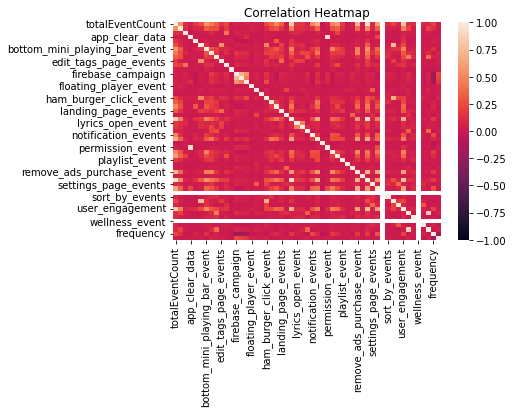

In [ ]:
loan_corr = df.corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df[c1], df[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print('Probably do not have monotonic relationship (fail to reject H0)')
    else:
        print('Probably have monotonic relationship (reject H0)')

In [ ]:
cal_spearmanr('totalEventCount','churn')

totalEventCount, churn correlation : 0.011136560449333387, p : 0.24482122145704402
Probably do not have monotonic relationship (fail to reject H0)


In [ ]:
printmd("**Unique Values By Features**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

totalEventCount       2879
engTime_sec           10555
app_exception         19
app_clear_data        23
ad_close_event        107
album_art_change_event 78
bottom_mini_playing_bar_event 269
bottom_option_click_event 230
current_search_tab_event 223
edit_tags_page_events 54
equalizer_event       114
feature_popup_events  23
firebase_campaign     16
first_open            21
first_open_custom_date_event 26
floating_player_event 63
font_change_event     14
genres_page_event     3
ham_burger_click_event 70
inside_page_events    151
interstitial_ad_events 557
landing_page_events   218
language_dialog_events 4
list_item_clicked_event 707
lyrics_open_event     124
lyrics_page_events    56
mini_youtube_event    45
notification_events   1120
number_of_items_event 442
os_update             9
permission_event      35
personalization_assignment 298
playing_window_event  860
playlist_event        88
playstore_rating_redirect_event 2
profile_page_events   23
remove_ads_purchase_event 354
ringtone_cu

In [ ]:
df.isna().sum()

totalEventCount                    0
engTime_sec                        0
app_exception                      0
app_clear_data                     0
ad_close_event                     0
album_art_change_event             0
bottom_mini_playing_bar_event      0
bottom_option_click_event          0
current_search_tab_event           0
edit_tags_page_events              0
equalizer_event                    0
feature_popup_events               0
firebase_campaign                  0
first_open                         0
first_open_custom_date_event       0
floating_player_event              0
font_change_event                  0
genres_page_event                  0
ham_burger_click_event             0
inside_page_events                 0
interstitial_ad_events             0
landing_page_events                0
language_dialog_events             0
list_item_clicked_event            0
lyrics_open_event                  0
lyrics_page_events                 0
mini_youtube_event                 0
n

<AxesSubplot:>

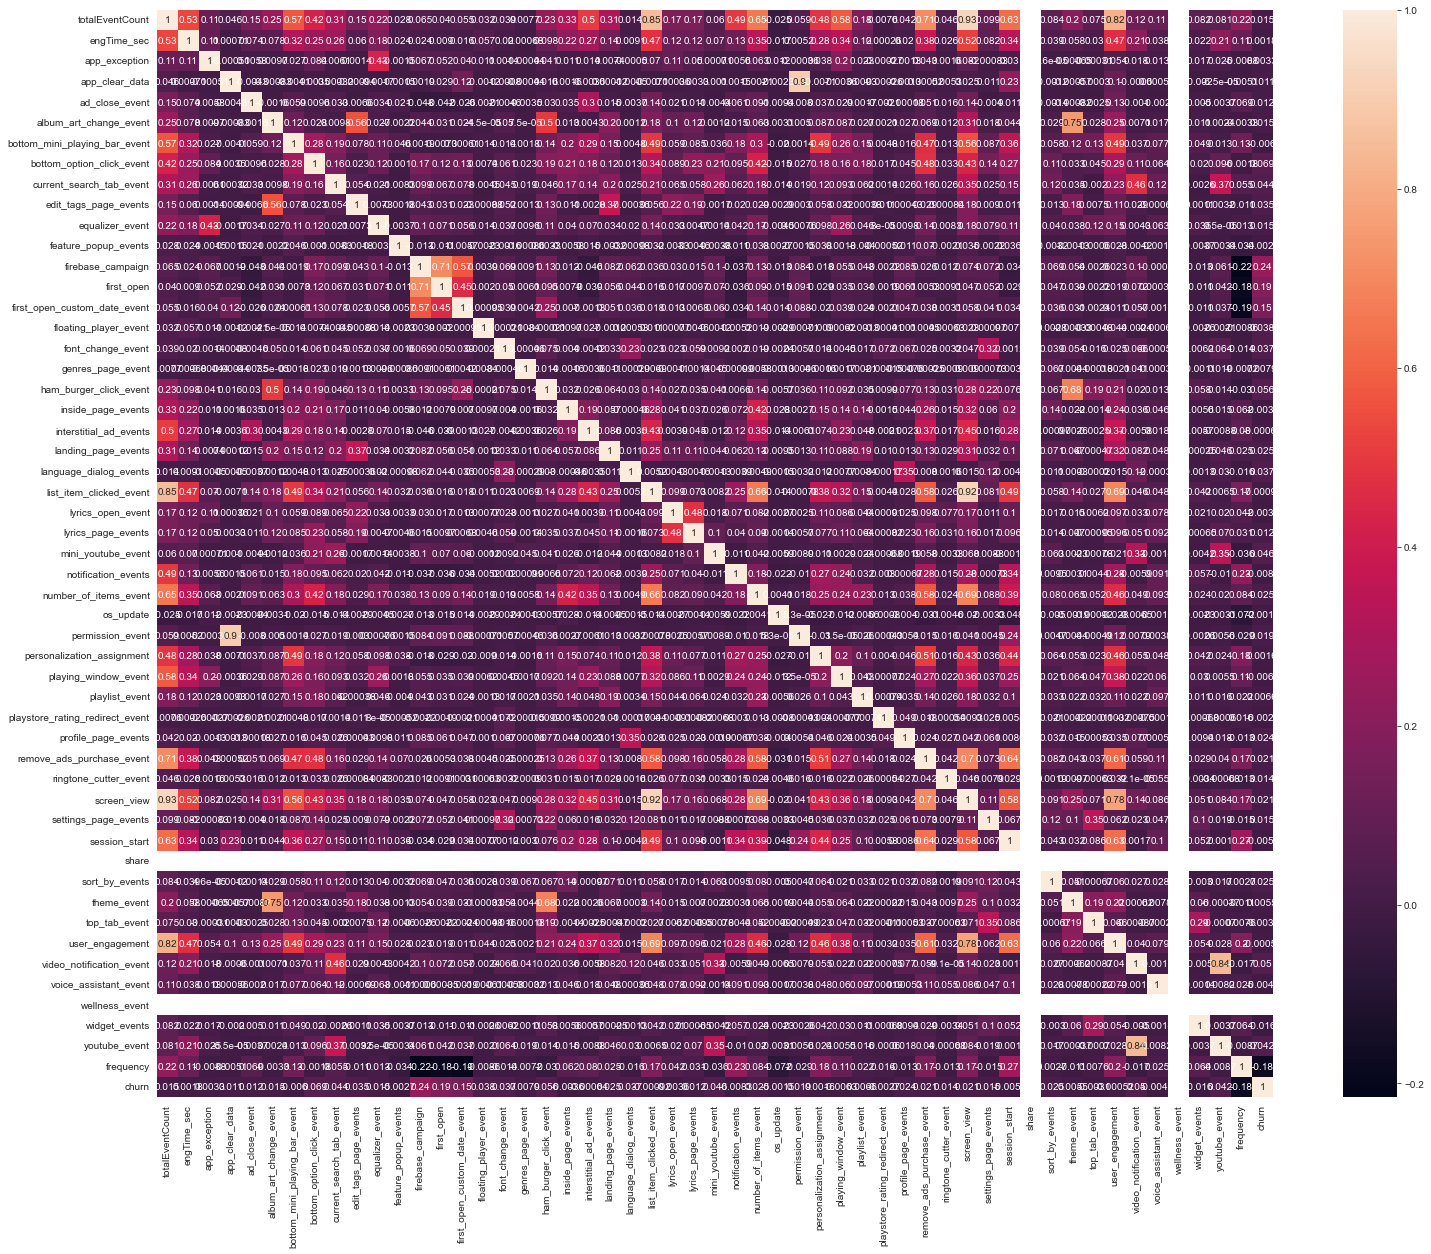

In [ ]:
plt.figure(figsize=(25, 20))

df_corr = df.corr()
sns.heatmap(df_corr,xticklabels = df_corr.columns.values,yticklabels = df_corr.columns.values,annot = True)

In [ ]:
plt.figure(figsize=(20, 20))

sns.pairplot(df, diag_kind='kde');

In [ ]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

totalEventCount                    float64
engTime_sec                        float64
app_exception                      float64
app_clear_data                     float64
ad_close_event                     float64
album_art_change_event             float64
bottom_mini_playing_bar_event      float64
bottom_option_click_event          float64
current_search_tab_event           float64
edit_tags_page_events              float64
equalizer_event                    float64
feature_popup_events               float64
firebase_campaign                  float64
first_open                         float64
first_open_custom_date_event       float64
floating_player_event              float64
font_change_event                  float64
genres_page_event                  float64
ham_burger_click_event             float64
inside_page_events                 float64
interstitial_ad_events             float64
landing_page_events                float64
language_dialog_events             float64
list_item_c

In [ ]:
correlation = numerical.dropna().corr()
correlation

totalEventCount  engTime_sec  app_exception  \
totalEventCount                         1.000000     0.533637       0.113469   
engTime_sec                             0.533637     1.000000       0.105333   
app_exception                           0.113469     0.105333       1.000000   
app_clear_data                          0.045701     0.000715      -0.000511   
ad_close_event                          0.151882     0.074119       0.005752   
album_art_change_event                  0.250488     0.078456       0.009657   
bottom_mini_playing_bar_event           0.568384     0.316548       0.027117   
bottom_option_click_event               0.422924     0.252674       0.083939   
current_search_tab_event                0.312904     0.257366       0.006058   
edit_tags_page_events                   0.152261     0.059584       0.001394   
equalizer_event                         0.221932     0.178221       0.429229   
feature_popup_events                    0.027908     0.024286      -0.001493   
firebase_campaign                       0.065304     0.024216       0.067389   
first_open                              0.039903     0.008984       0.052409   
first_open_custom_date_event            0.055273     0.015558       0.040323   
floating_player_event                   0.032003     0.056940       0.010994   
font_change_event                       0.039192     0.019654       0.001387   
genres_page_event                       0.007749     0.000679      -0.000443   
ham_burger_click_event                  0.234945     0.098251       0.040893   
inside_page_events                      0.325799     0.219060       0.010942   
interstitial_ad_events                  0.504505     0.269220       0.014113   
landing_page_events                     0.307158     0.135521       0.007351   
language_dialog_events                  0.014243     0.009087      -0.000504   
list_item_clicked_event                 0.849827     0.474312       0.070070   
lyrics_open_event                       0.168457     0.121140       0.106977   
lyrics_page_events                      0.166248     0.121434       0.049509   
mini_youtube_event                      0.059895     0.070455       0.000711   
notification_events                     0.494892     0.126150       0.005568   
number_of_items_event                   0.653646     0.346802       0.062517   
os_update                              -0.025382    -0.016701       0.011969   
permission_event                        0.058842     0.005238      -0.000362   
personalization_assignment              0.484261     0.279935       0.037527   
playing_window_event                    0.580777     0.338937       0.196774   
playlist_event                          0.175883     0.115928       0.022615   
playstore_rating_redirect_event         0.007616     0.000256      -0.000266   
profile_page_events                     0.041626     0.020123      -0.001326   
remove_ads_purchase_event               0.709266     0.380588       0.042516   
ringtone_cutter_event                   0.045924     0.026129       0.001637   
screen_view                             0.930069     0.519127       0.082255   
settings_page_events                    0.098638     0.081953      -0.000831   
session_start                           0.626979     0.337156       0.030402   
share                                        NaN          NaN            NaN   
sort_by_events                          0.083614     0.039316       0.000046   
theme_event                             0.202446     0.058351      -0.000645   
top_tab_event                           0.075156     0.029640      -0.000308   
user_engagement                         0.817575     0.466359       0.054391   
video_notification_event                0.117599     0.211212       0.018142   
voice_assistant_event                   0.108785     0.037942       0.013408   
wellness_event                               NaN          NaN            NaN   
widget_events                    

In [ ]:
correlation1 = numerical.dropna().corr(method='spearman')
correlation1

totalEventCount  engTime_sec  app_exception  \
totalEventCount                         1.000000     0.781808       0.048000   
engTime_sec                             0.781808     1.000000       0.042092   
app_exception                           0.048000     0.042092       1.000000   
app_clear_data                          0.020031     0.005959       0.017977   
ad_close_event                          0.234502     0.189115       0.007811   
album_art_change_event                  0.177836     0.147577       0.046381   
bottom_mini_playing_bar_event           0.451732     0.369332       0.031740   
bottom_option_click_event               0.445381     0.351618       0.046528   
current_search_tab_event                0.325438     0.277081       0.020839   
edit_tags_page_events                   0.119469     0.098675       0.030104   
equalizer_event                         0.142630     0.138533       0.012923   
feature_popup_events                   -0.001811     0.007557      -0.004681   
firebase_campaign                       0.076405     0.017253       0.010863   
first_open                              0.072296     0.006015       0.015437   
first_open_custom_date_event            0.033700    -0.023461       0.005499   
floating_player_event                   0.026802     0.067040       0.004359   
font_change_event                       0.053078     0.045957       0.036643   
genres_page_event                       0.017828     0.012310      -0.000871   
ham_burger_click_event                  0.177096     0.138135       0.027983   
inside_page_events                      0.306939     0.255667       0.012453   
interstitial_ad_events                  0.229632     0.167939      -0.009944   
landing_page_events                     0.422530     0.357122       0.028829   
language_dialog_events                  0.023308     0.018554      -0.001125   
list_item_clicked_event                 0.778254     0.662792       0.040646   
lyrics_open_event                       0.231976     0.230125       0.039808   
lyrics_page_events                      0.155356     0.156653       0.056688   
mini_youtube_event                      0.094985     0.106515       0.007992   
notification_events                     0.598491     0.368610       0.020459   
number_of_items_event                   0.580064     0.435451       0.040946   
os_update                              -0.070763    -0.073257       0.013995   
permission_event                        0.087265     0.025024       0.002962   
personalization_assignment              0.460372     0.336681       0.032962   
playing_window_event                    0.650907     0.584034       0.035707   
playlist_event                          0.227399     0.186997       0.017182   
playstore_rating_redirect_event         0.013790     0.009848      -0.000503   
profile_page_events                     0.062982     0.052505      -0.003226   
remove_ads_purchase_event               0.768094     0.574582       0.030096   
ringtone_cutter_event                   0.083320     0.075179       0.021659   
screen_view                             0.936887     0.770231       0.045193   
settings_page_events                    0.092944     0.081191       0.014070   
session_start                           0.703590     0.575702       0.032675   
share                                        NaN          NaN            NaN   
sort_by_events                          0.107354     0.085468       0.008993   
theme_event                             0.114390     0.093801      -0.004948   
top_tab_event                           0.017630     0.018065      -0.000711   
user_engagement                         0.859566     0.784841       0.041096   
video_notification_event                0.164370     0.178511       0.007295   
voice_assistant_event                   0.053055     0.045921       0.039875   
wellness_event                               NaN          NaN            NaN   
widget_events                    

In [ ]:
correlation1['churn'].describe()

count    51.000000
mean      0.041296
std       0.155909
min      -0.178518
25%      -0.008300
50%       0.016724
75%       0.030512
max       1.000000
Name: churn, dtype: float64

In [ ]:
correlation1['churn'].describe

<bound method NDFrame.describe of totalEventCount                    0.011137
engTime_sec                       -0.022272
app_exception                     -0.001123
app_clear_data                     0.022907
ad_close_event                    -0.048804
album_art_change_event             0.028582
bottom_mini_playing_bar_event     -0.049774
bottom_option_click_event          0.042105
current_search_tab_event           0.019094
edit_tags_page_events              0.018674
equalizer_event                    0.024117
feature_popup_events              -0.012821
firebase_campaign                  0.249185
first_open                         0.248327
first_open_custom_date_event       0.204748
floating_player_event              0.007000
font_change_event                  0.011159
genres_page_event                  0.016724
ham_burger_click_event             0.094145
inside_page_events                -0.025918
interstitial_ad_events            -0.048794
landing_page_events                0.02902

In [ ]:
data_pie = df['churn'].value_counts()

([<matplotlib.patches.Wedge at 0x284981264c0>,
 [Text(-1.0717928363582983, 0.2475078098384663, 'Retained (0)'),
  Text(1.0717928537383108, -0.24750773457709999, 'Exited (1)')])

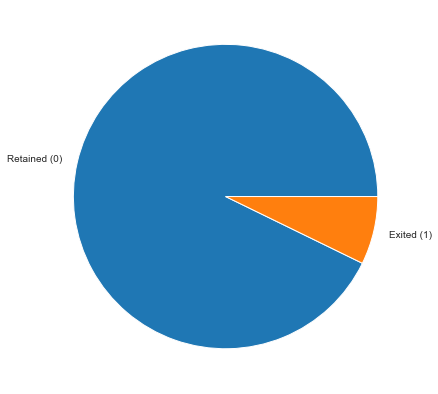

In [ ]:
plt.figure(figsize = (10,7))

plt.pie(data_pie, labels = ['Retained (0)', 'Exited (1)'])

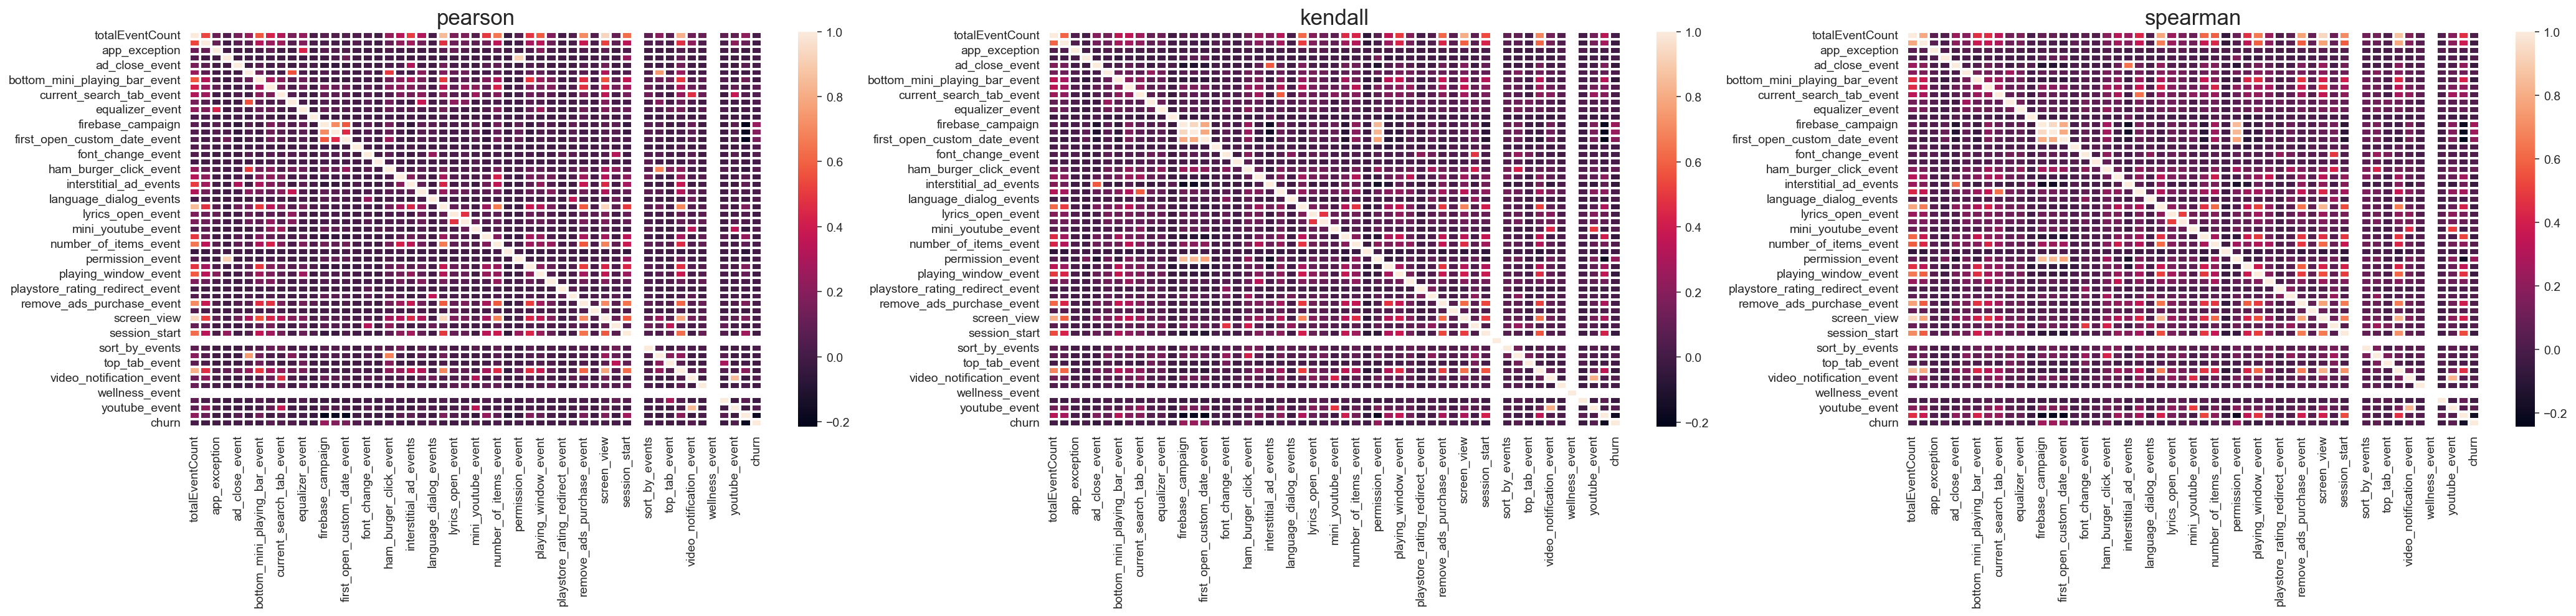

In [ ]:
# plotting heatmap usingl all methods for all numerical variables (peason, kendall, spearman)
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (20,4), dpi=140)
  
  #barplot
  plt.subplot(1,3,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,z_p_val,table))
    
  # category-wise distribution
  plt.subplot(1,3,2)
  sns.kdeplot(x1, shade= True, color='blue', label = 'churned')
  sns.kdeplot(x2, shade= False, color='green', label = 'not churned', linewidth = 1)
  plt.title('categorical distribution')
    
  # boxplot
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

In [ ]:
df['engTime_sec'].describe()

count    10908.000000
mean       460.821464
std       1269.702959
min          0.001000
25%         45.072000
50%        136.279583
75%        386.108402
max      60224.342250
Name: engTime_sec, dtype: float64

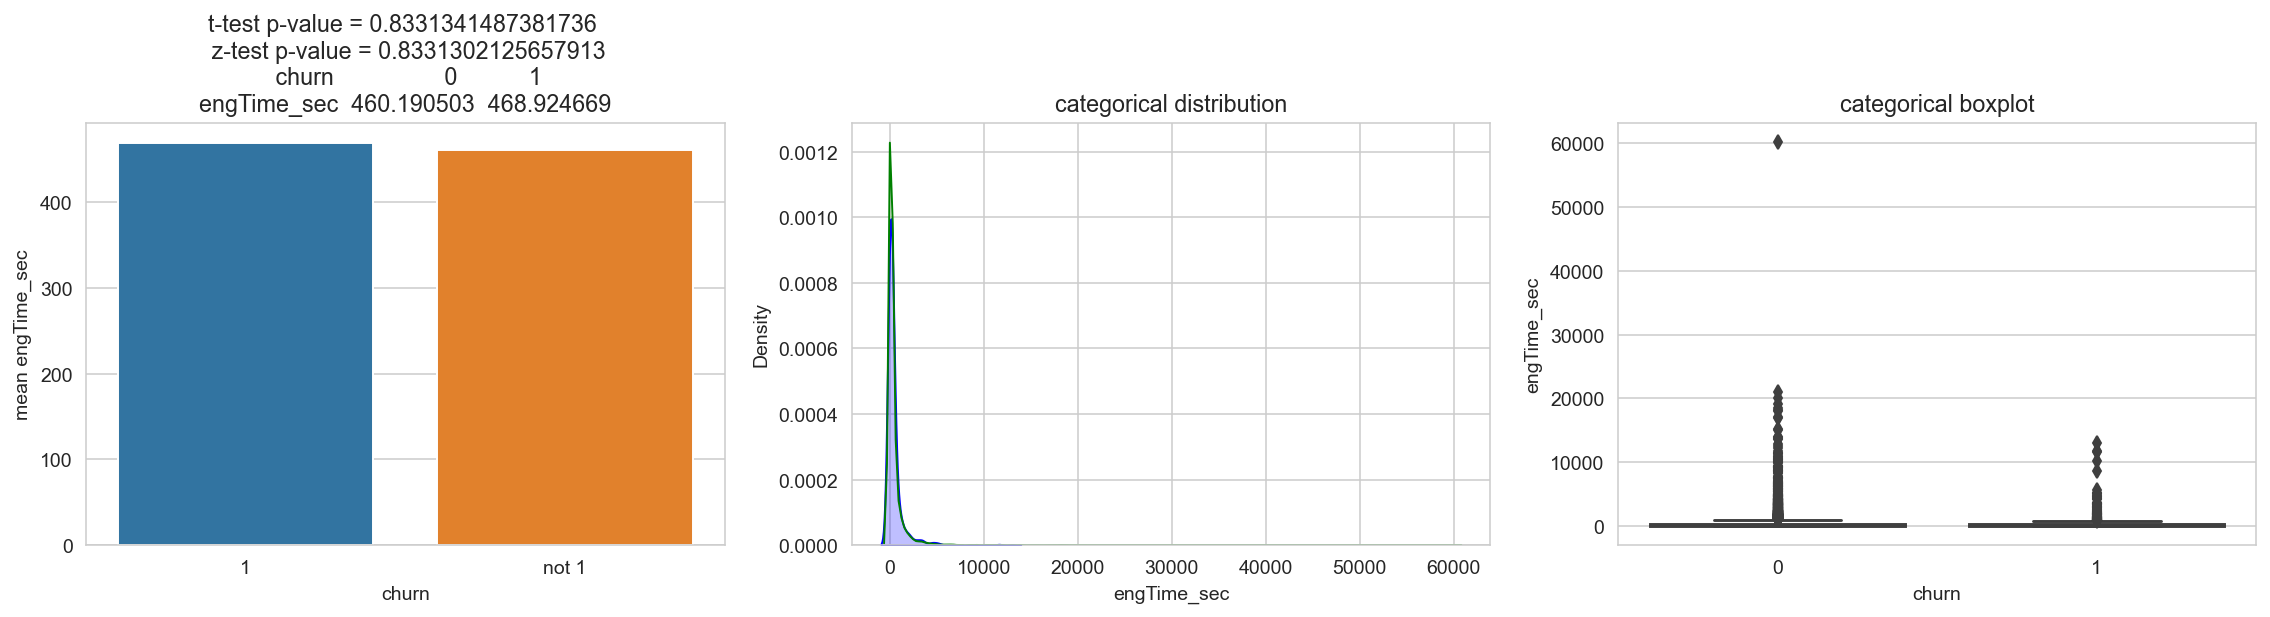

In [ ]:
Bivariate_cont_cat(df, 'engTime_sec', 'churn', 1)

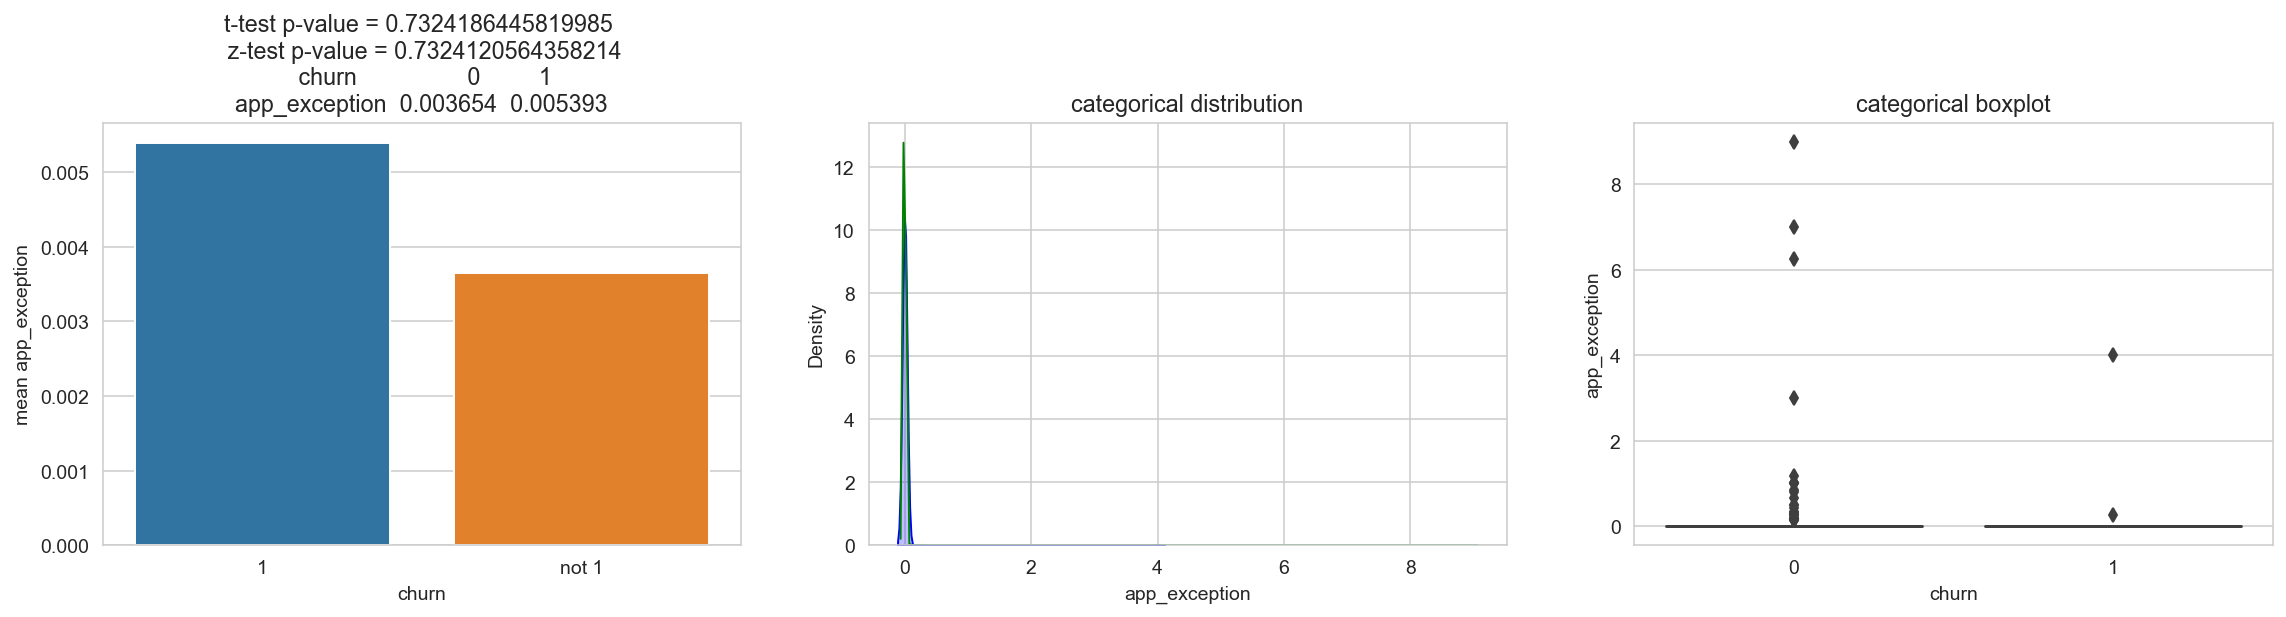

In [ ]:
Bivariate_cont_cat(df, 'app_exception', 'churn', 1)

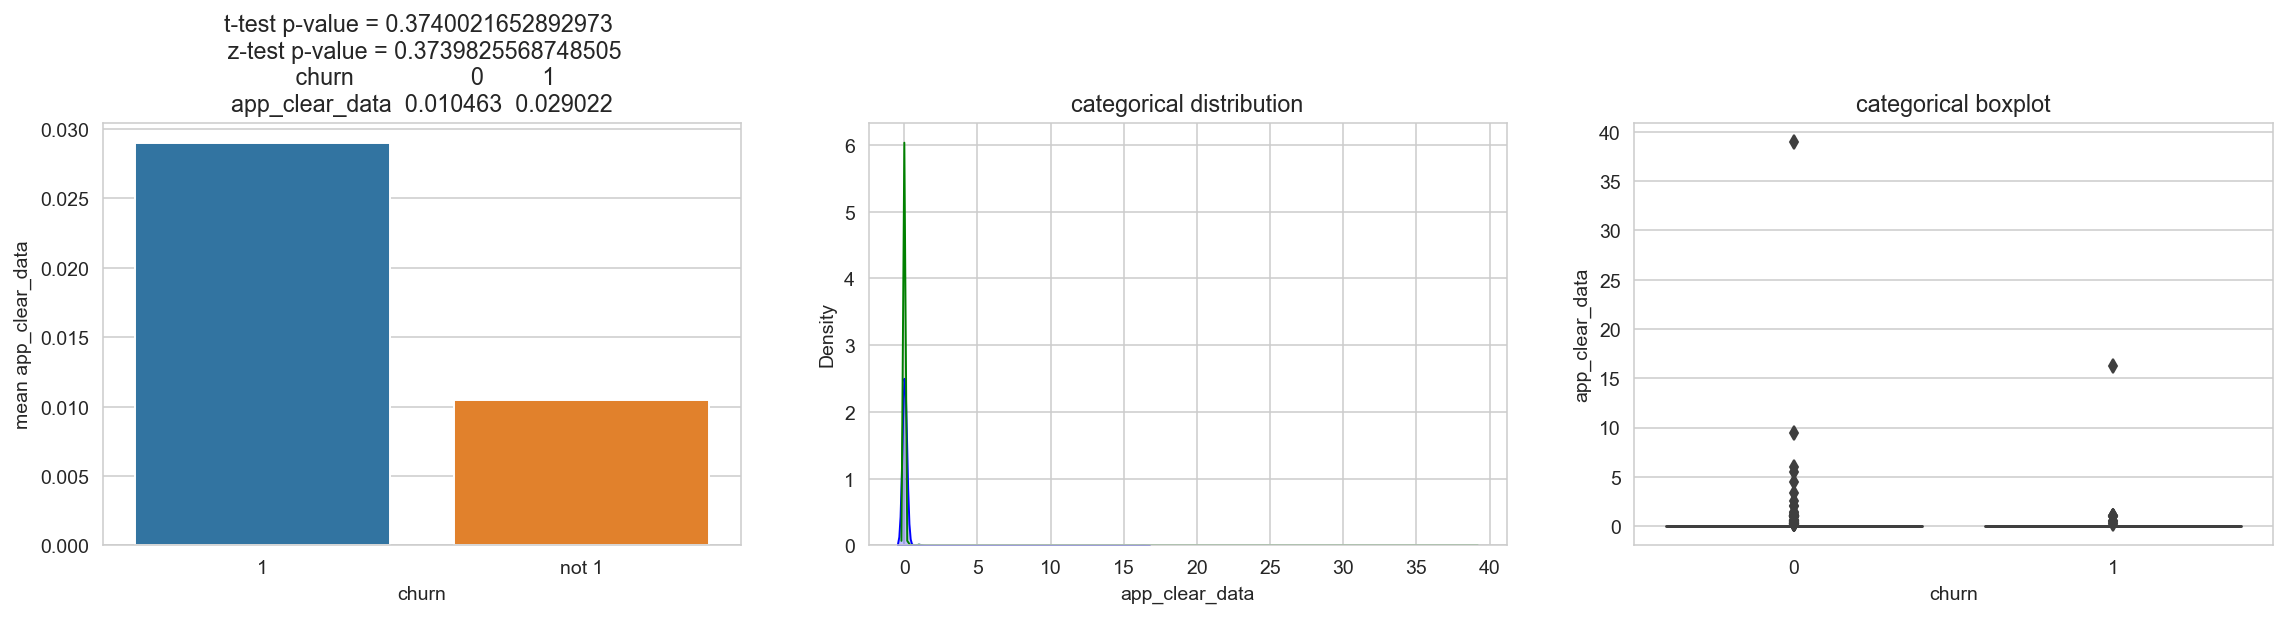

In [ ]:
Bivariate_cont_cat(df, 'app_clear_data', 'churn', 1)

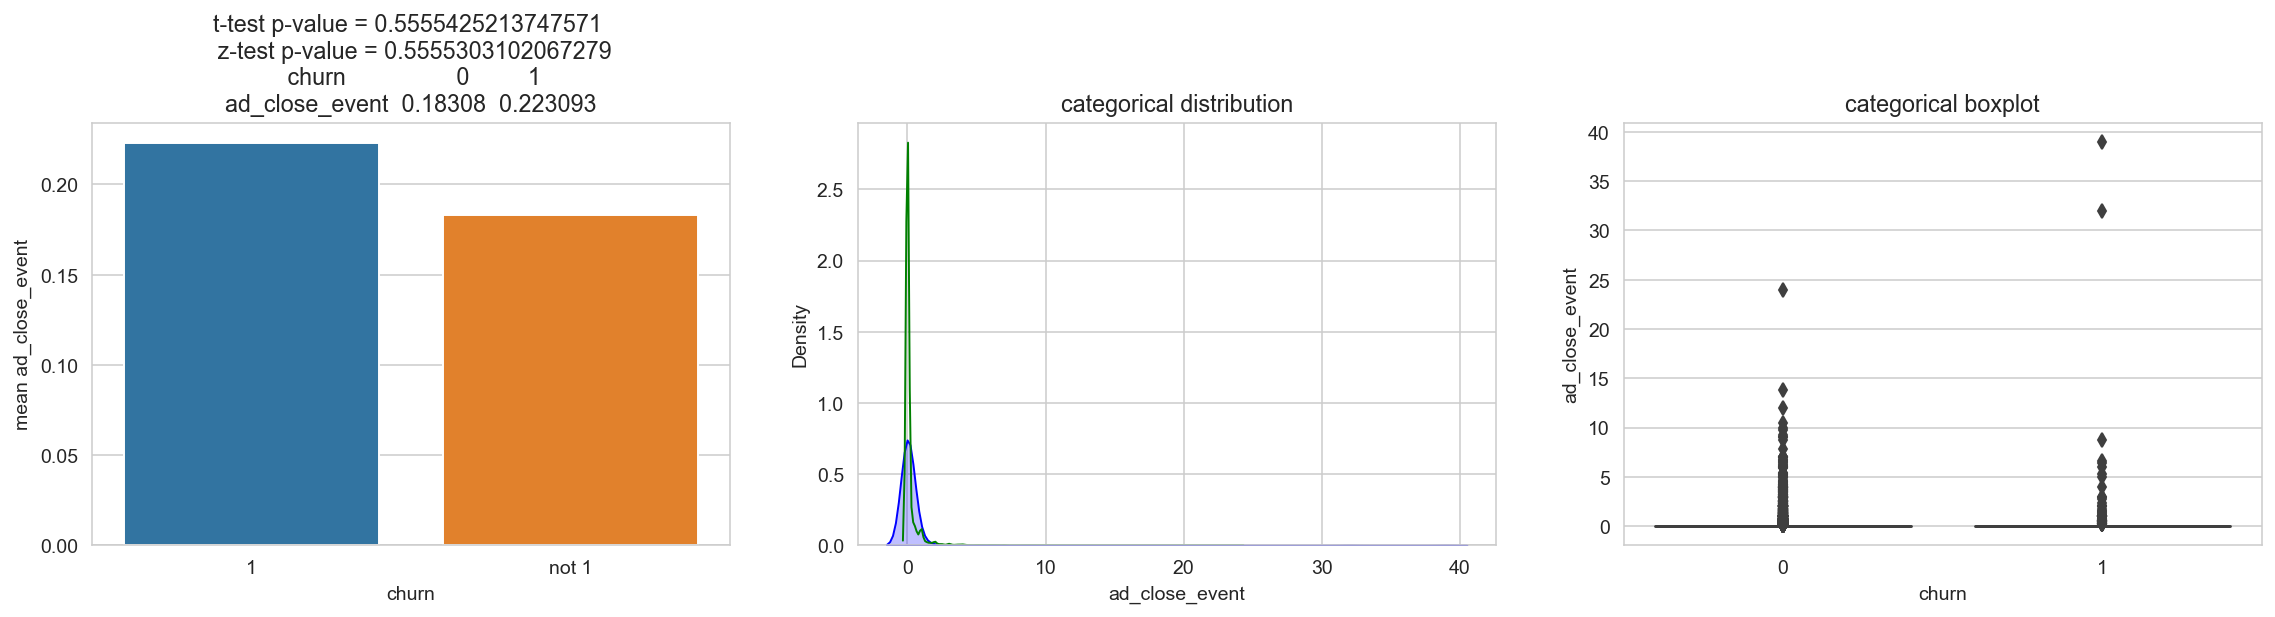

In [ ]:
Bivariate_cont_cat(df, 'ad_close_event', 'churn', 1)

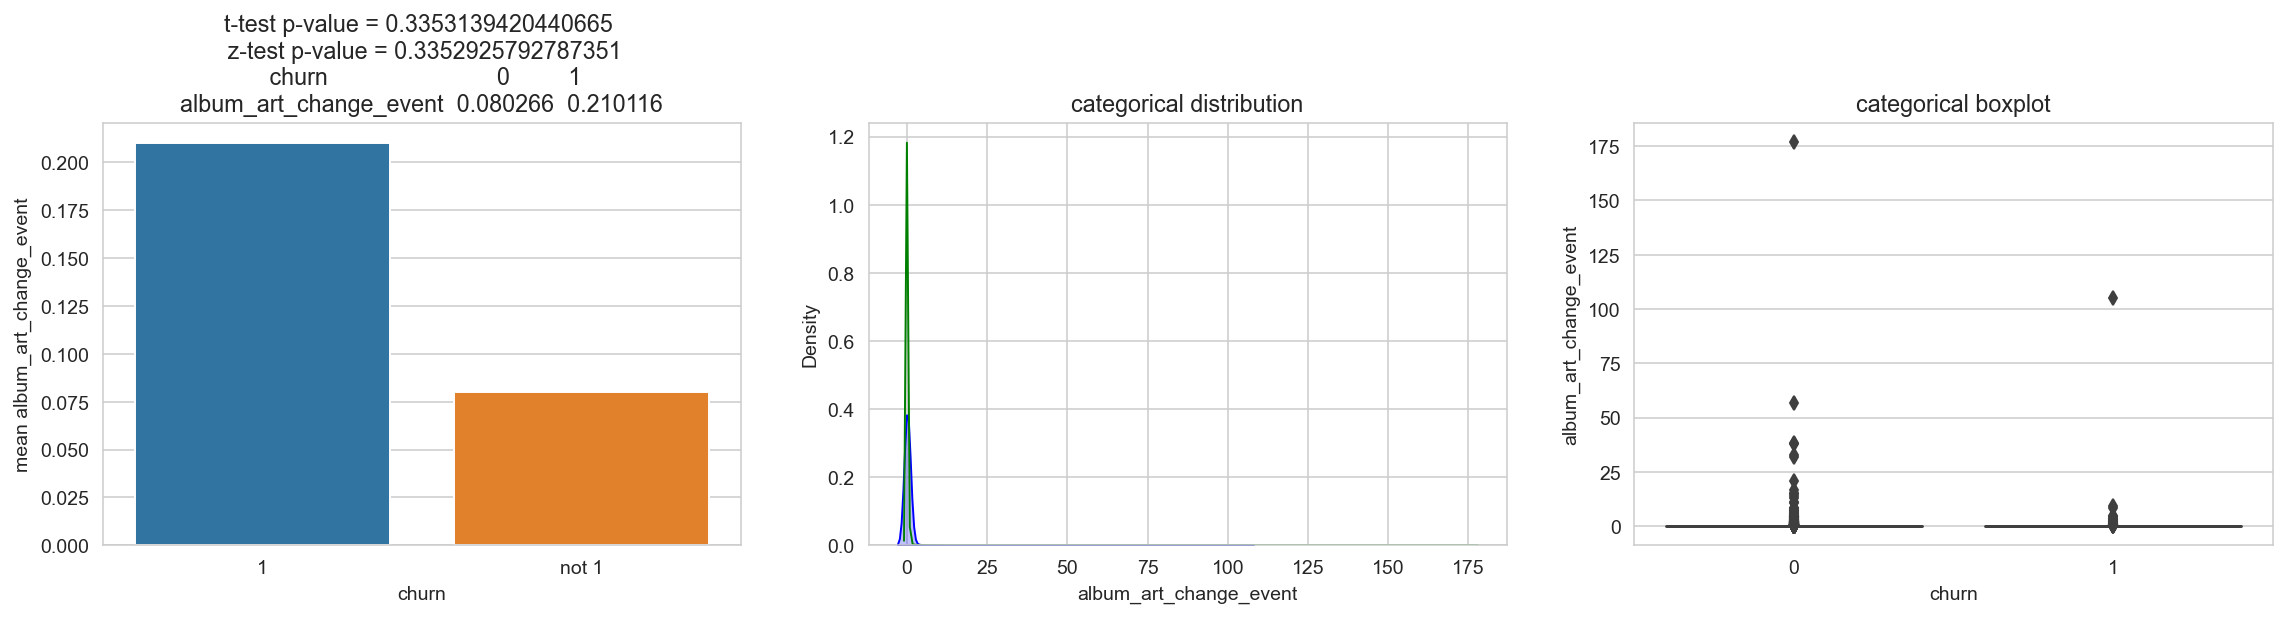

In [ ]:
Bivariate_cont_cat(df, 'album_art_change_event', 'churn', 1)

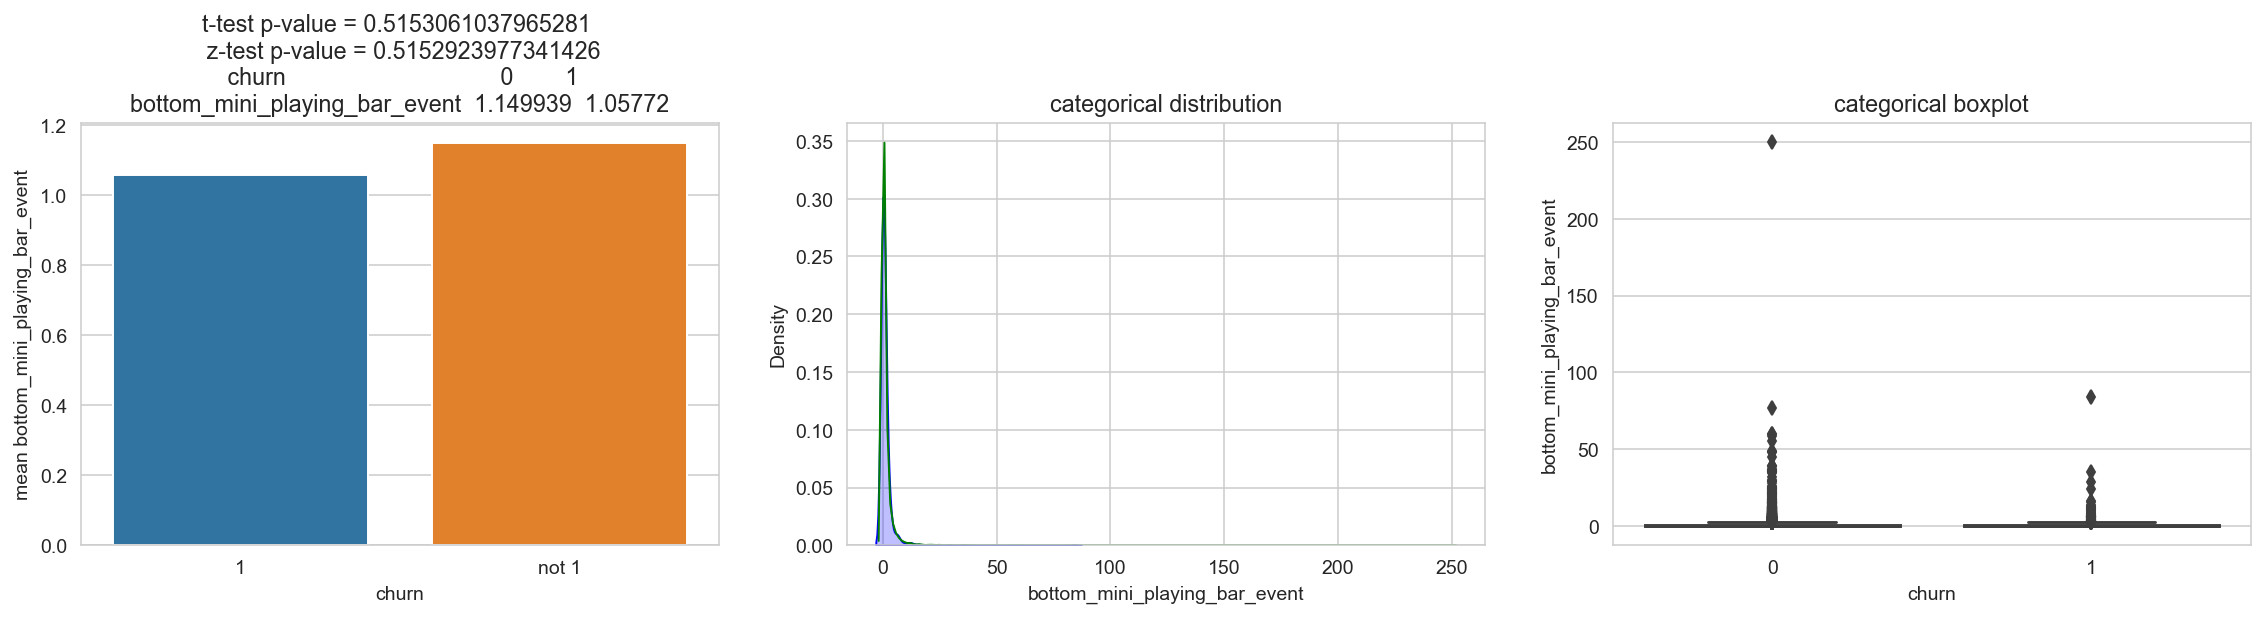

In [ ]:
Bivariate_cont_cat(df, 'bottom_mini_playing_bar_event', 'churn', 1)

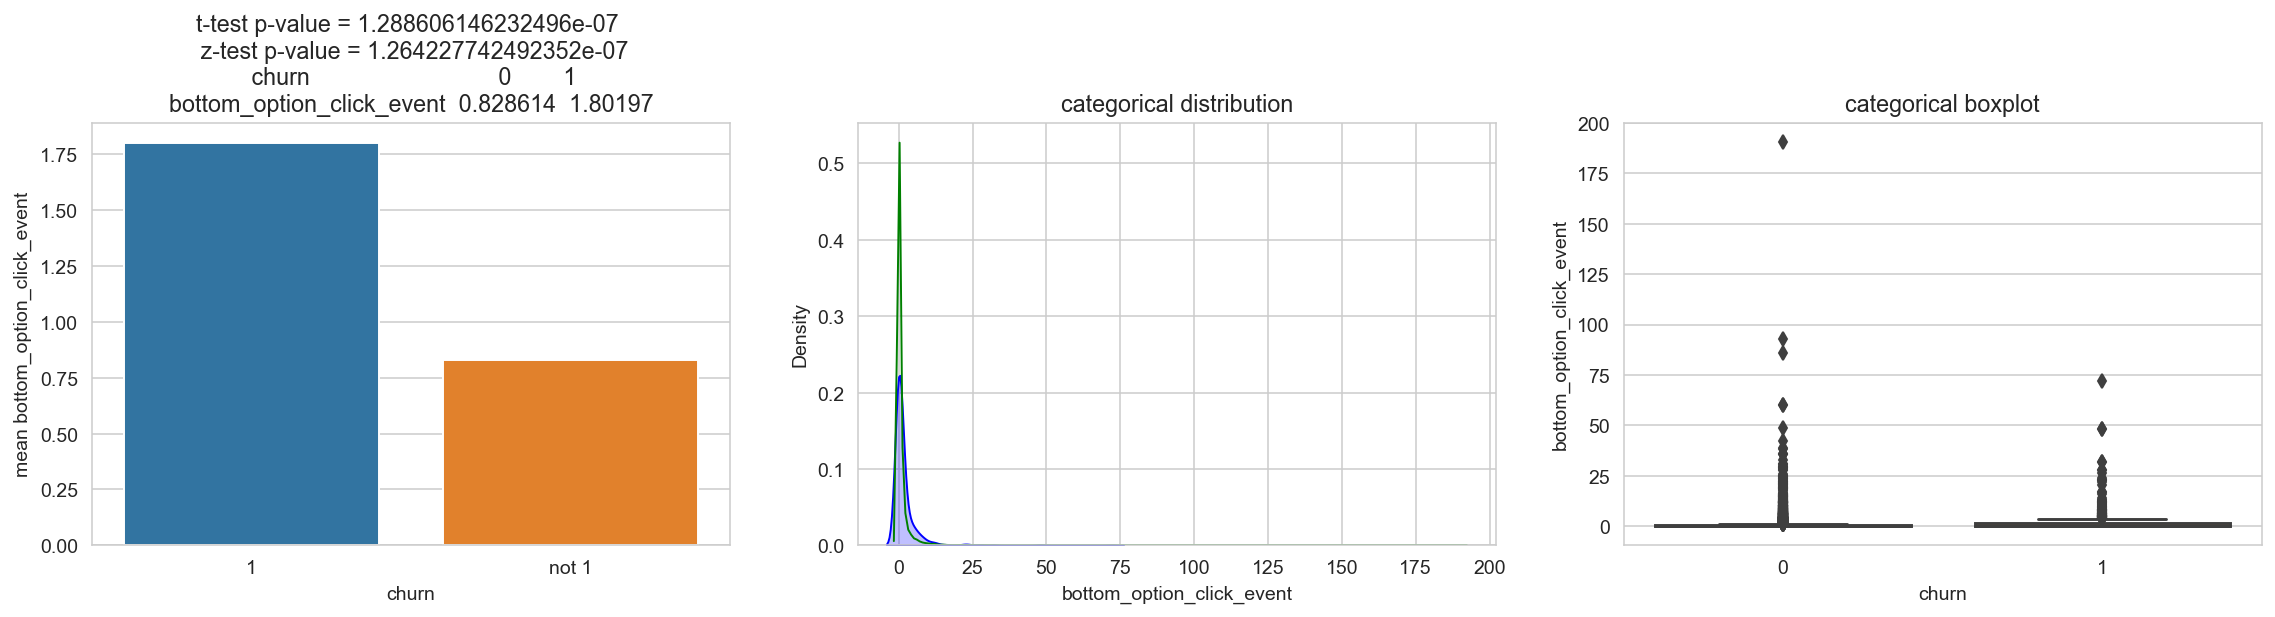

In [ ]:
Bivariate_cont_cat(df, 'bottom_option_click_event', 'churn', 1)

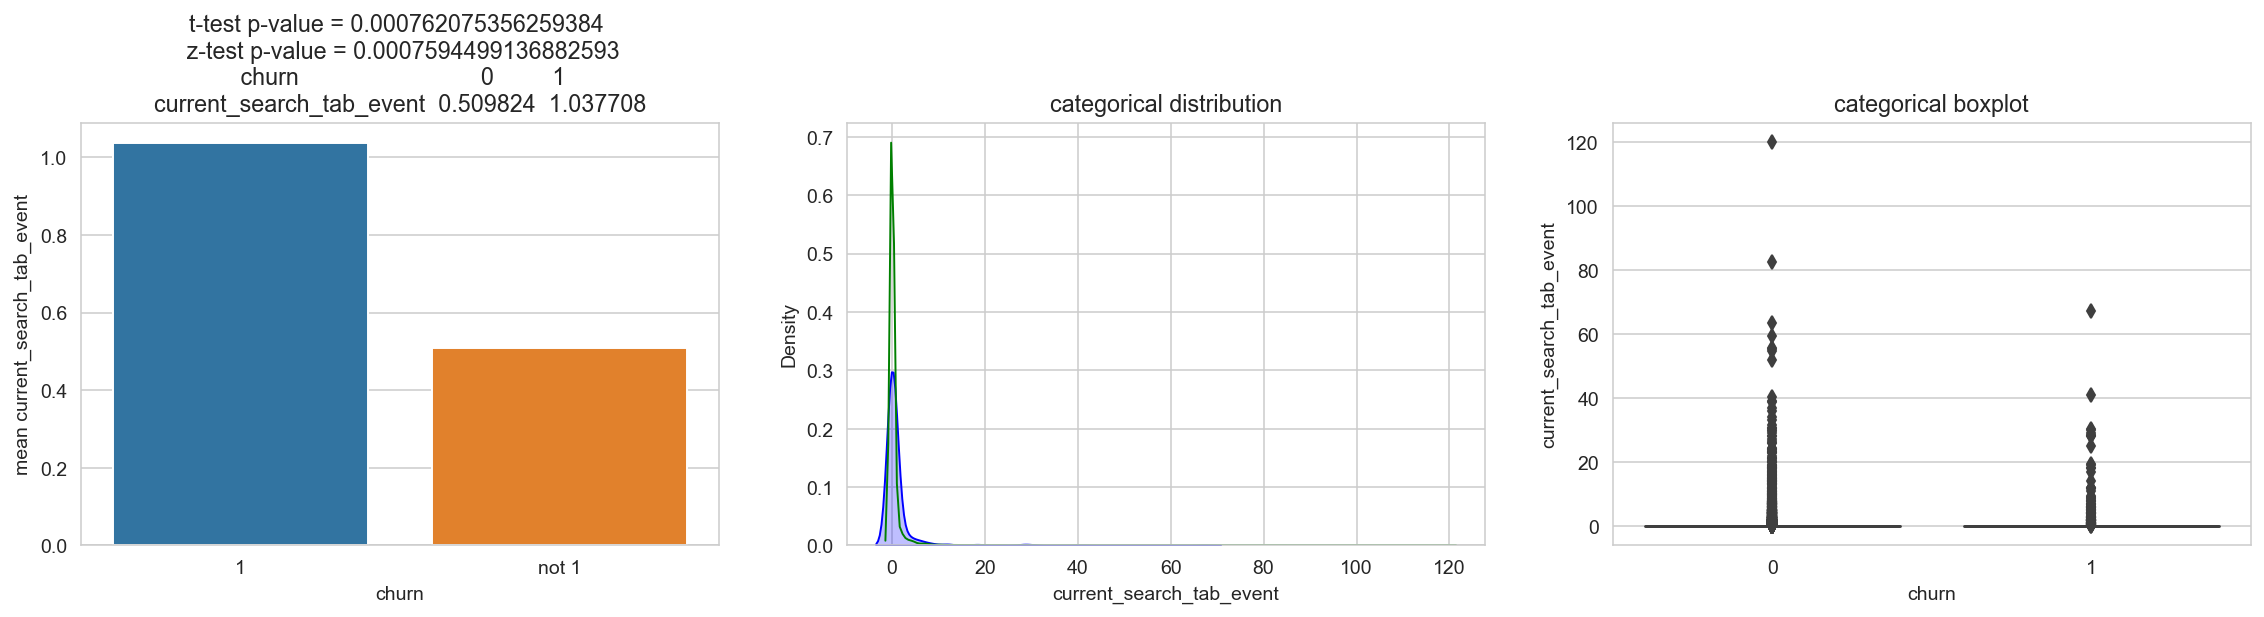

In [ ]:
Bivariate_cont_cat(df, 'current_search_tab_event', 'churn', 1)

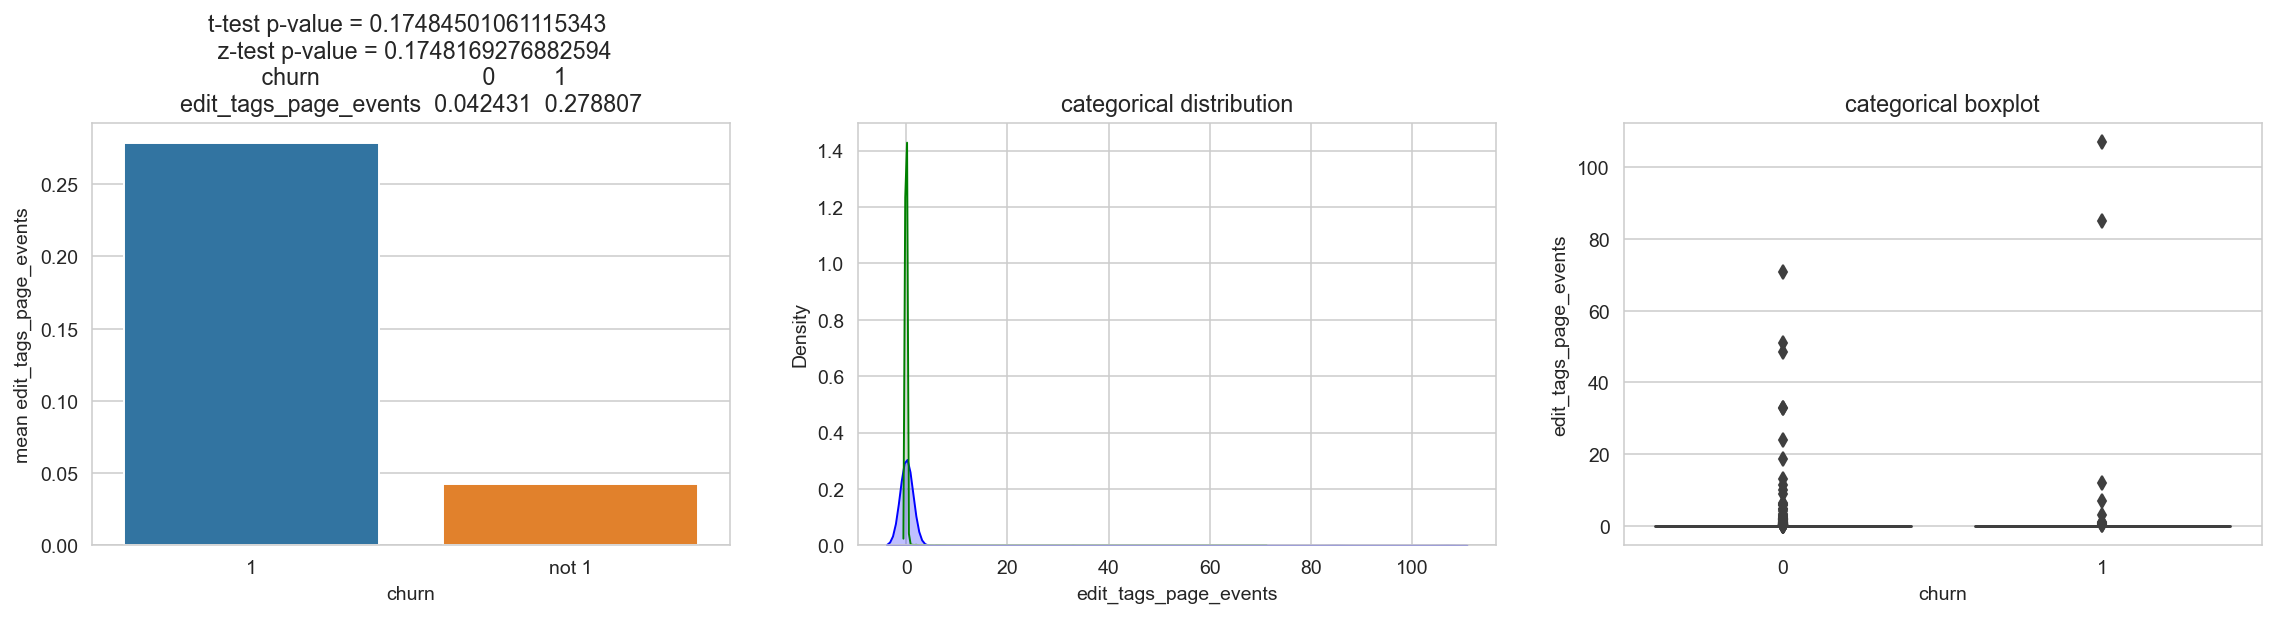

In [ ]:
Bivariate_cont_cat(df, 'edit_tags_page_events', 'churn', 1)

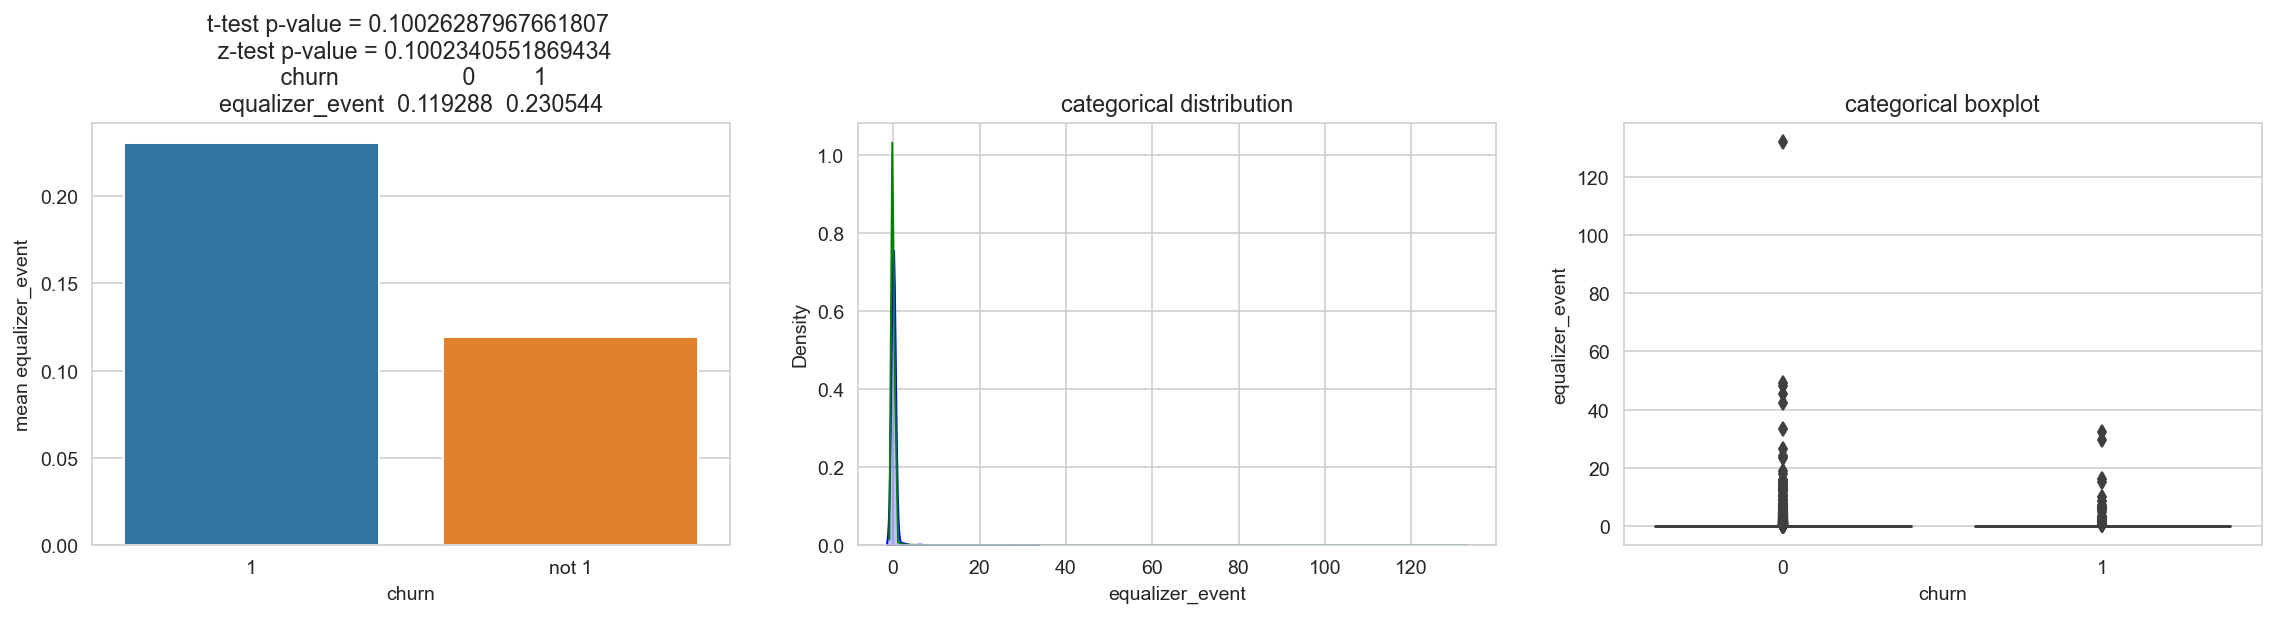

In [ ]:
Bivariate_cont_cat(df, 'equalizer_event', 'churn', 1)

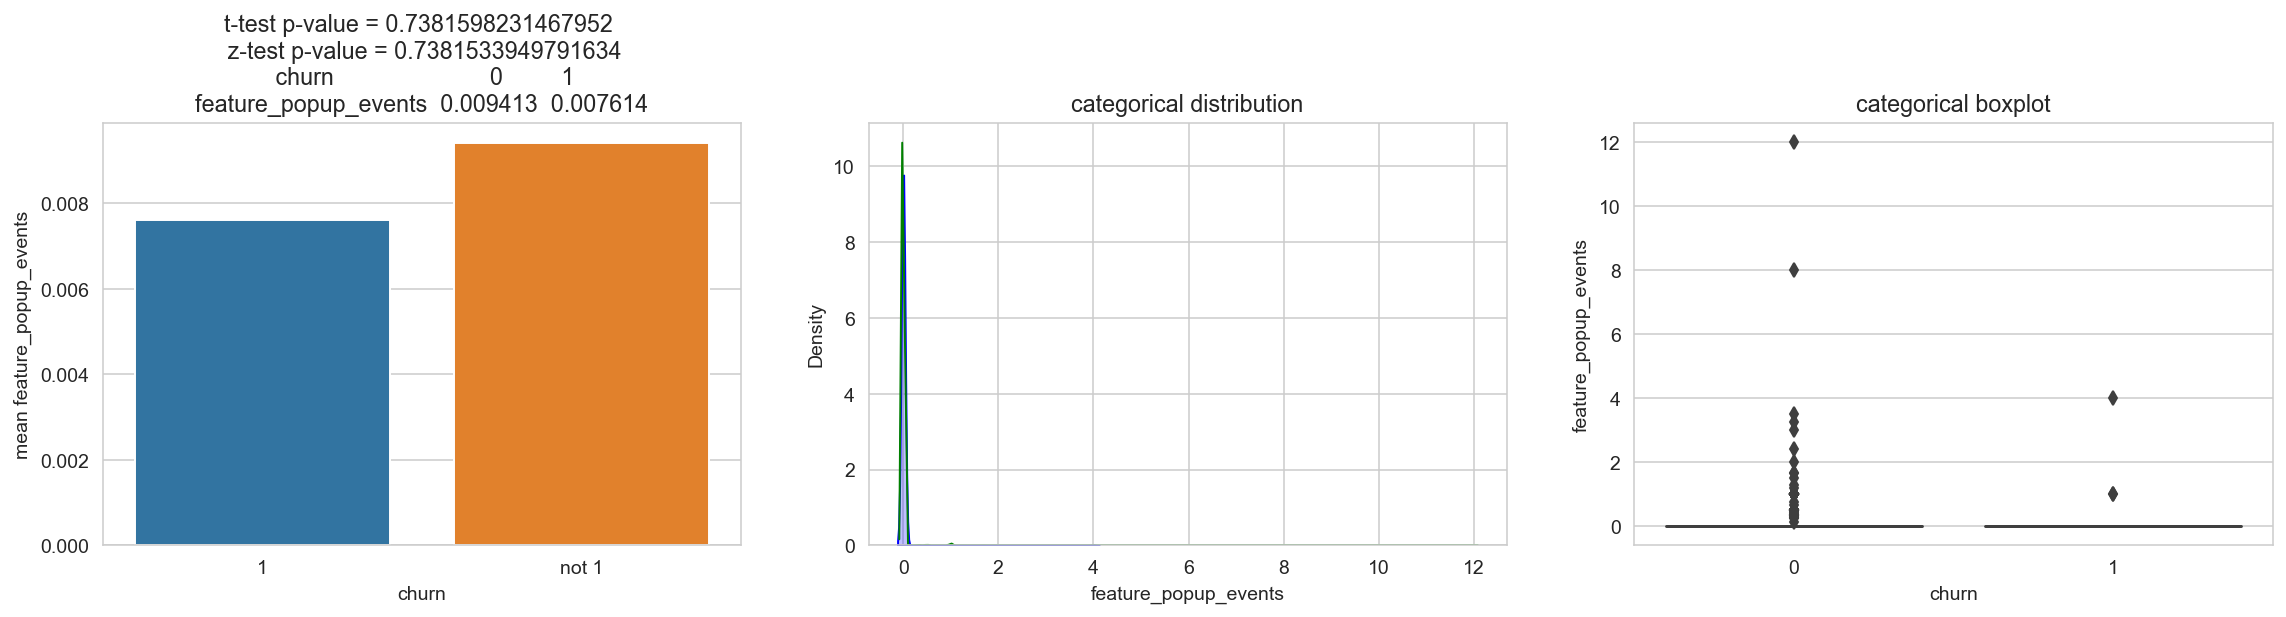

In [ ]:
Bivariate_cont_cat(df, 'feature_popup_events', 'churn', 1)

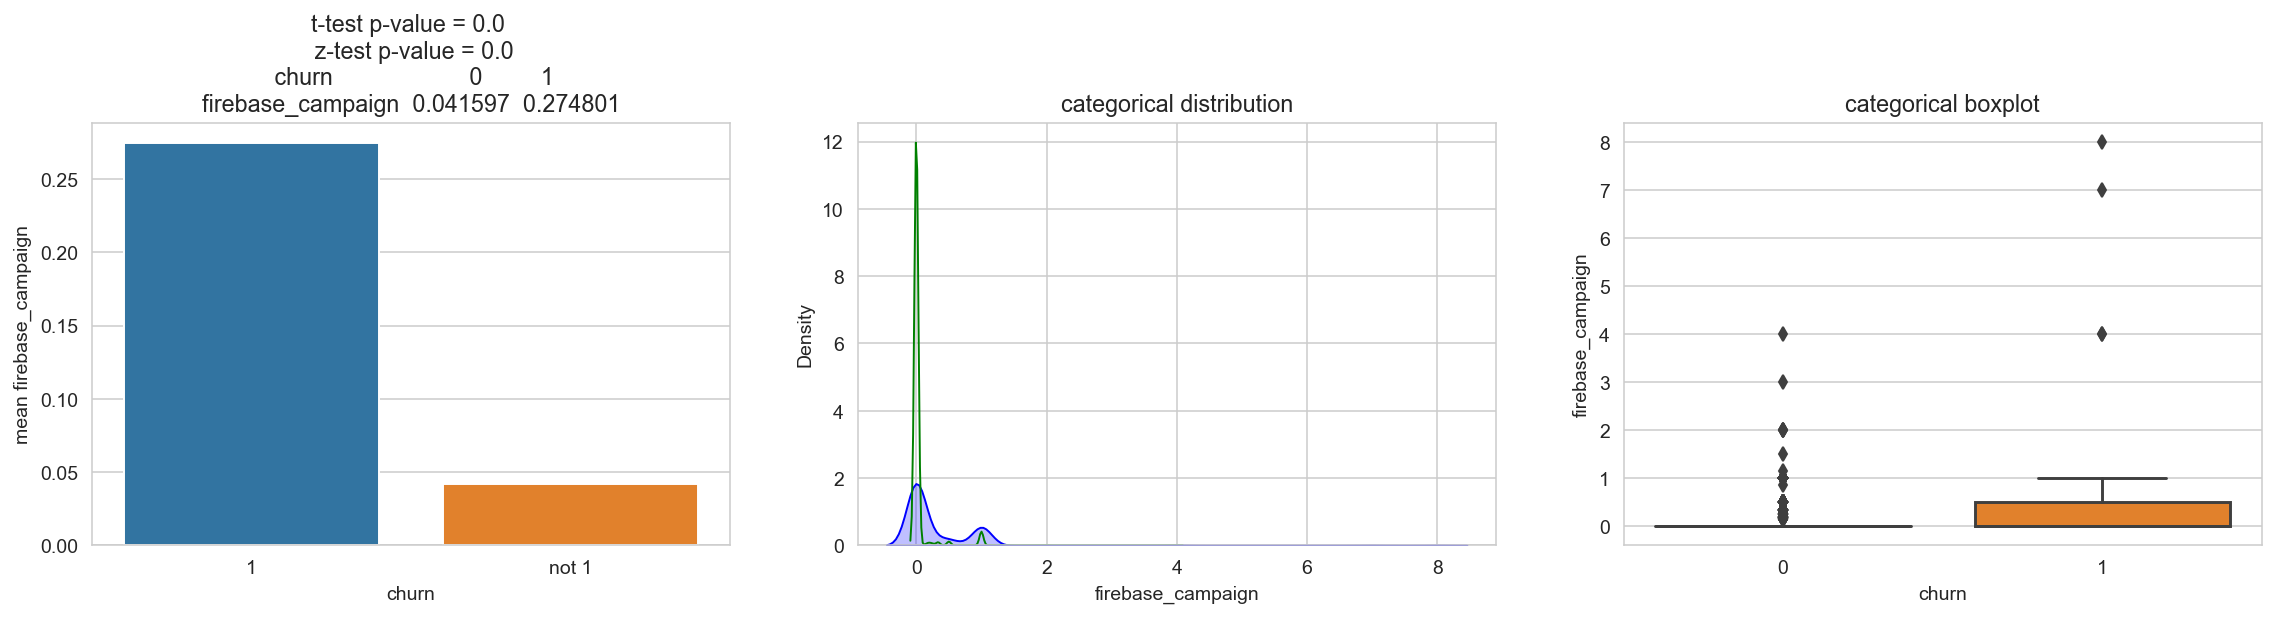

In [ ]:
Bivariate_cont_cat(df, 'firebase_campaign', 'churn', 1)

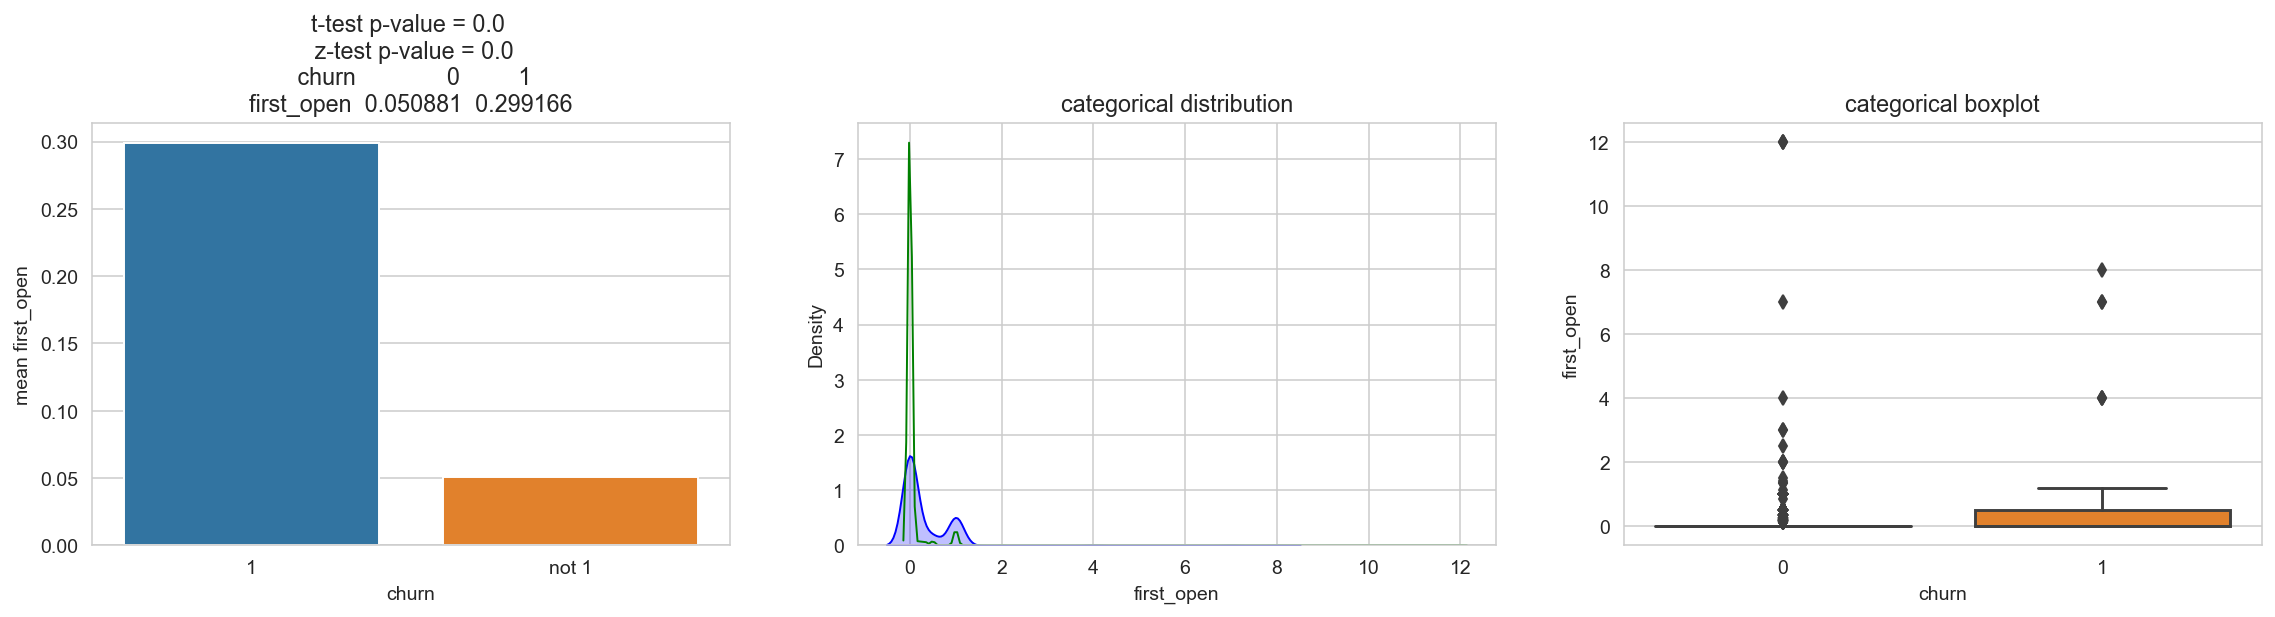

In [ ]:
Bivariate_cont_cat(df, 'first_open', 'churn', 1)

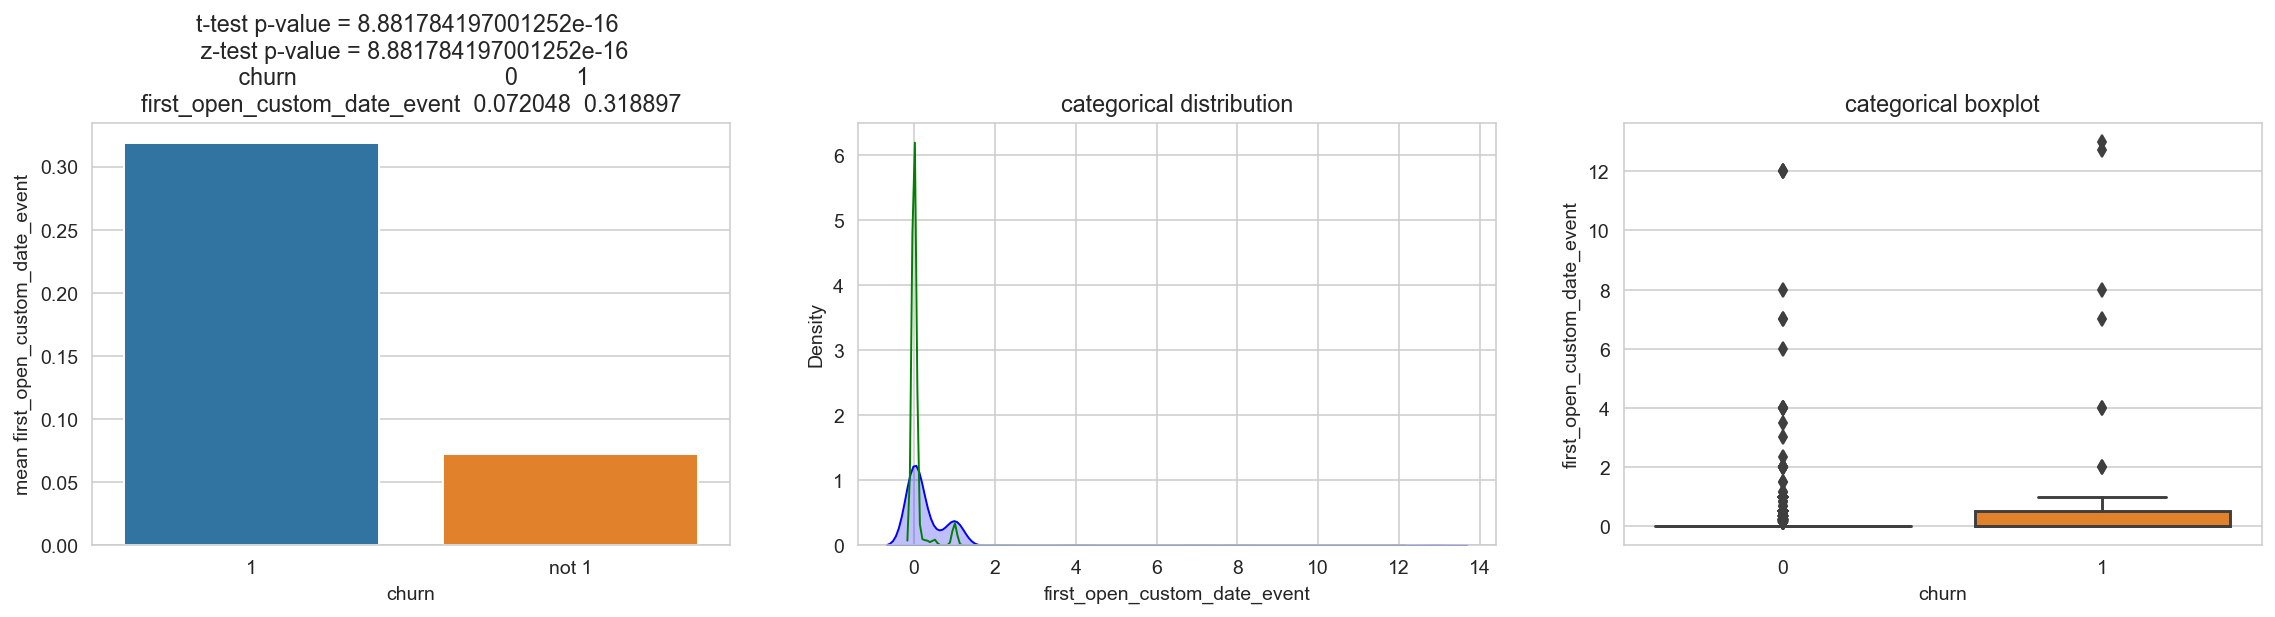

In [ ]:
Bivariate_cont_cat(df, 'first_open_custom_date_event', 'churn', 1)

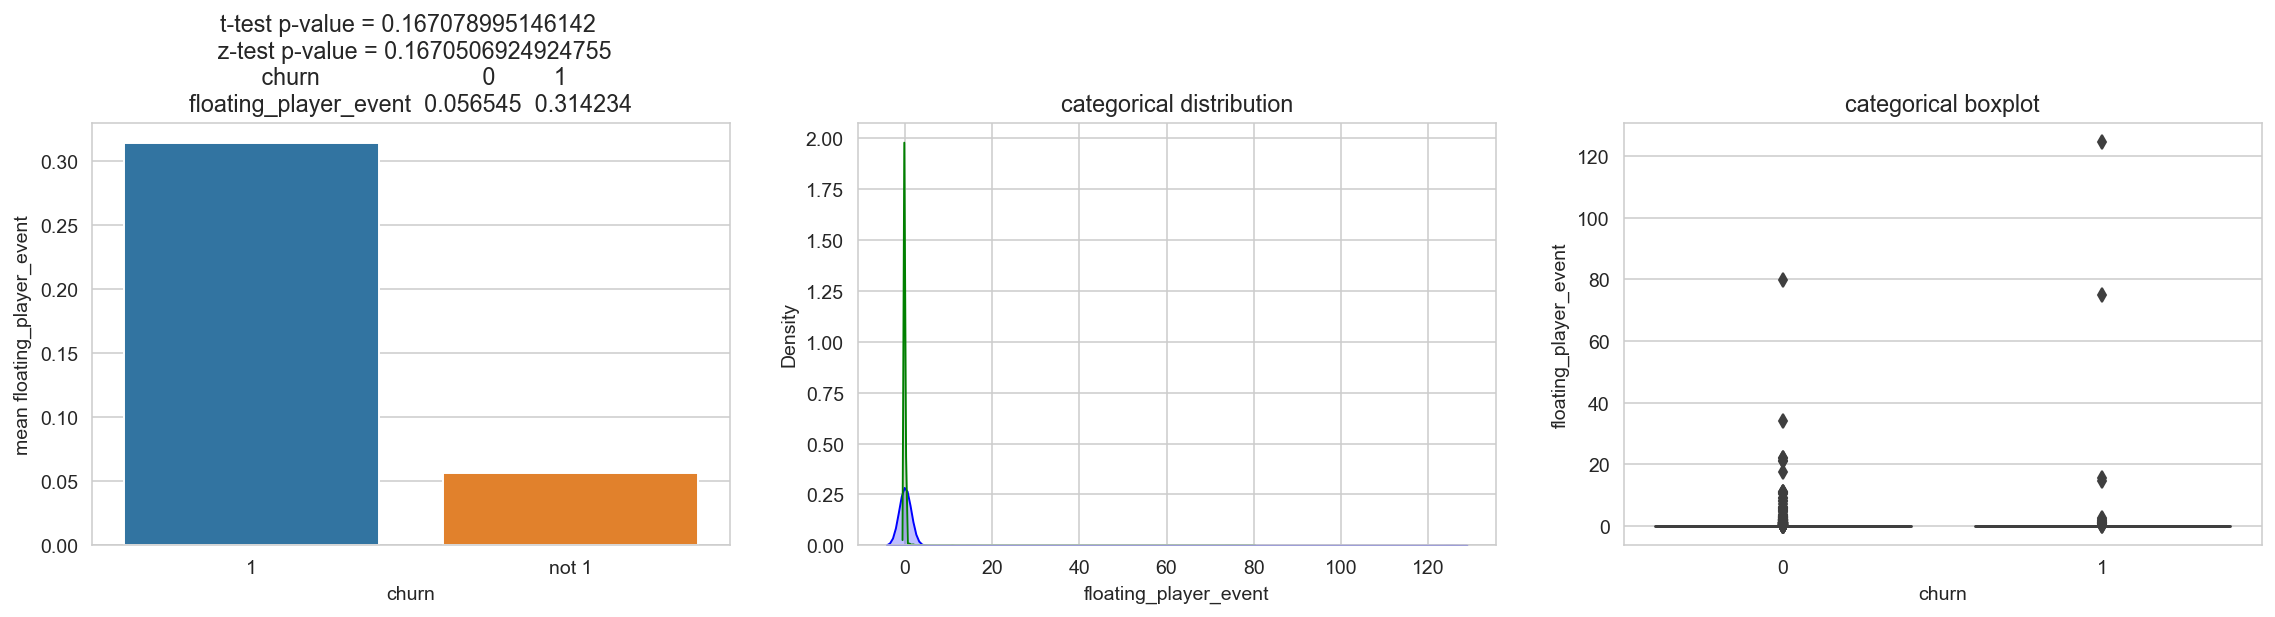

In [ ]:
Bivariate_cont_cat(df, 'floating_player_event', 'churn', 1)

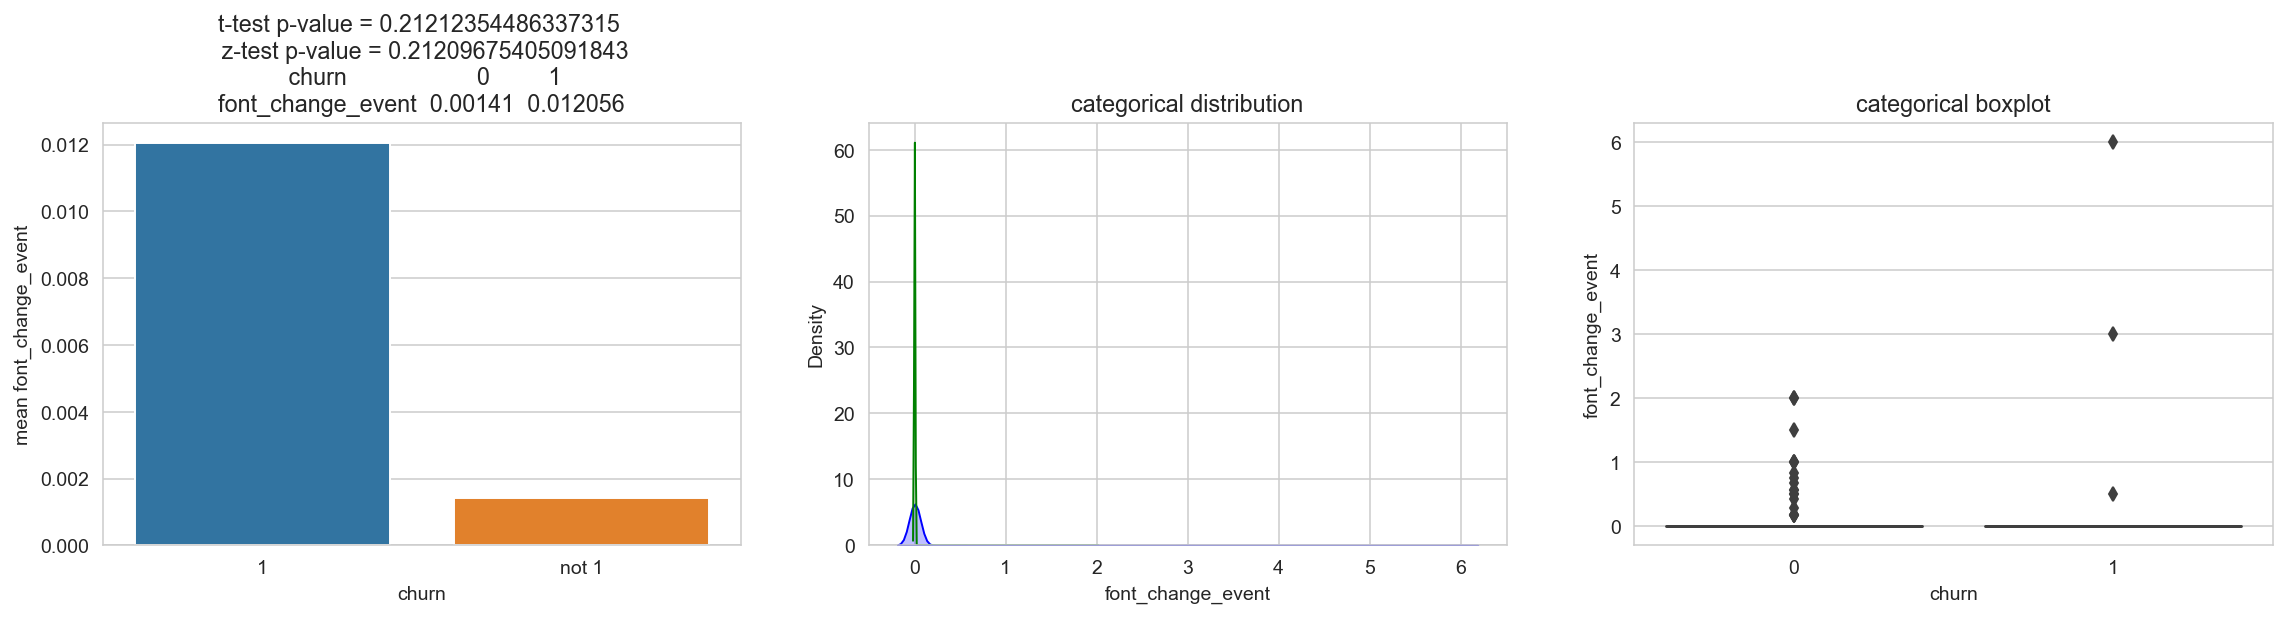

In [ ]:
Bivariate_cont_cat(df, 'font_change_event', 'churn', 1)

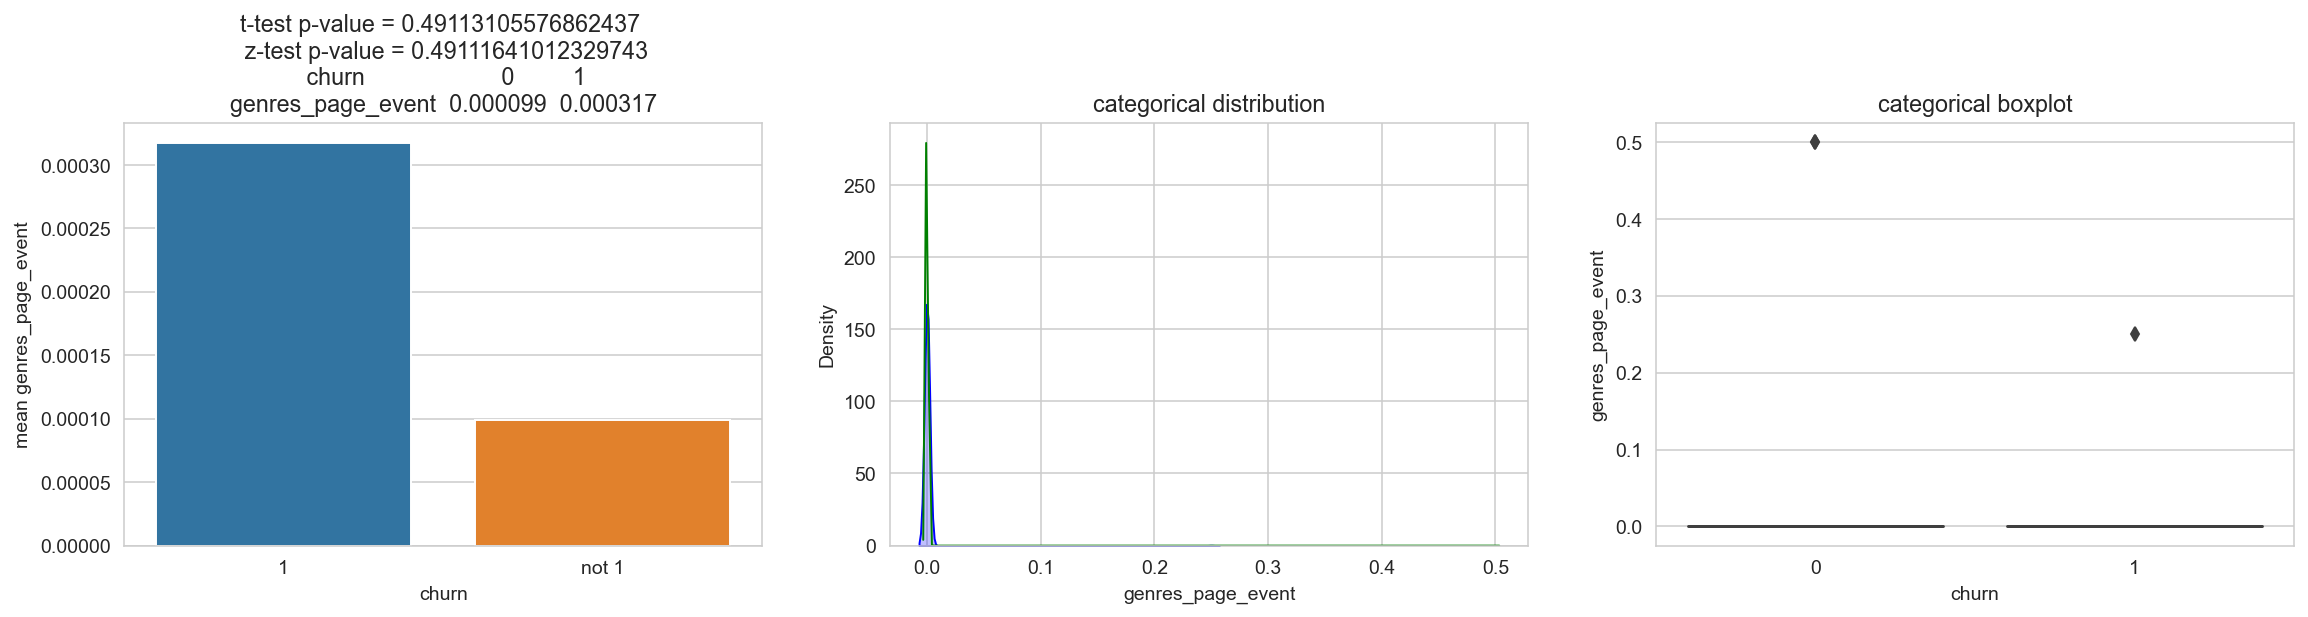

In [ ]:
Bivariate_cont_cat(df, 'genres_page_event', 'churn', 1)

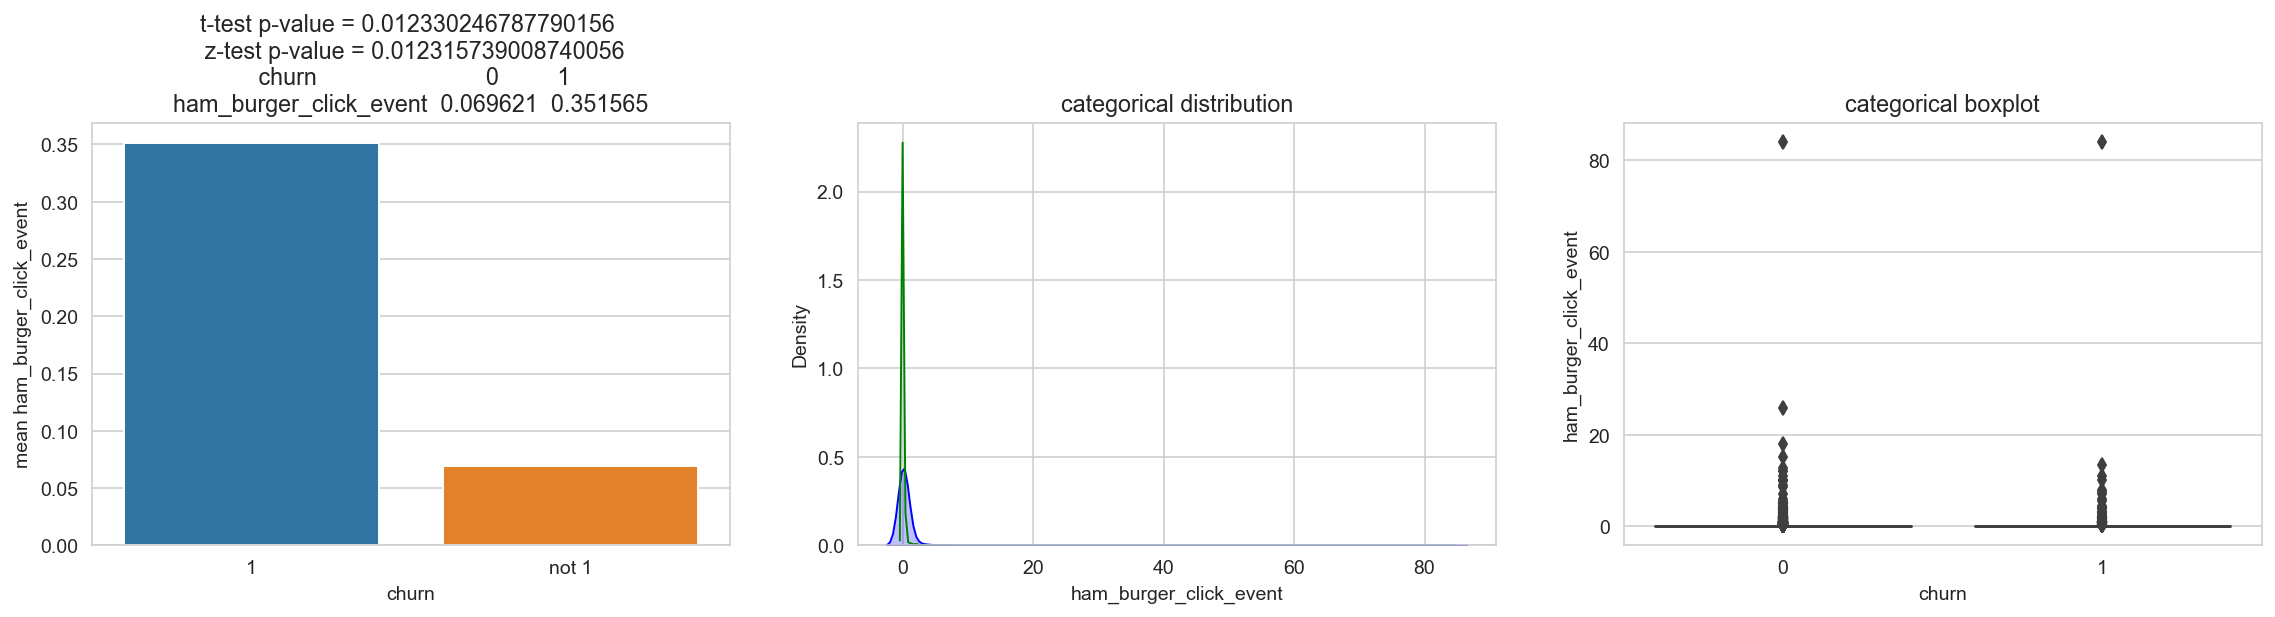

In [ ]:
Bivariate_cont_cat(df, 'ham_burger_click_event', 'churn', 1)

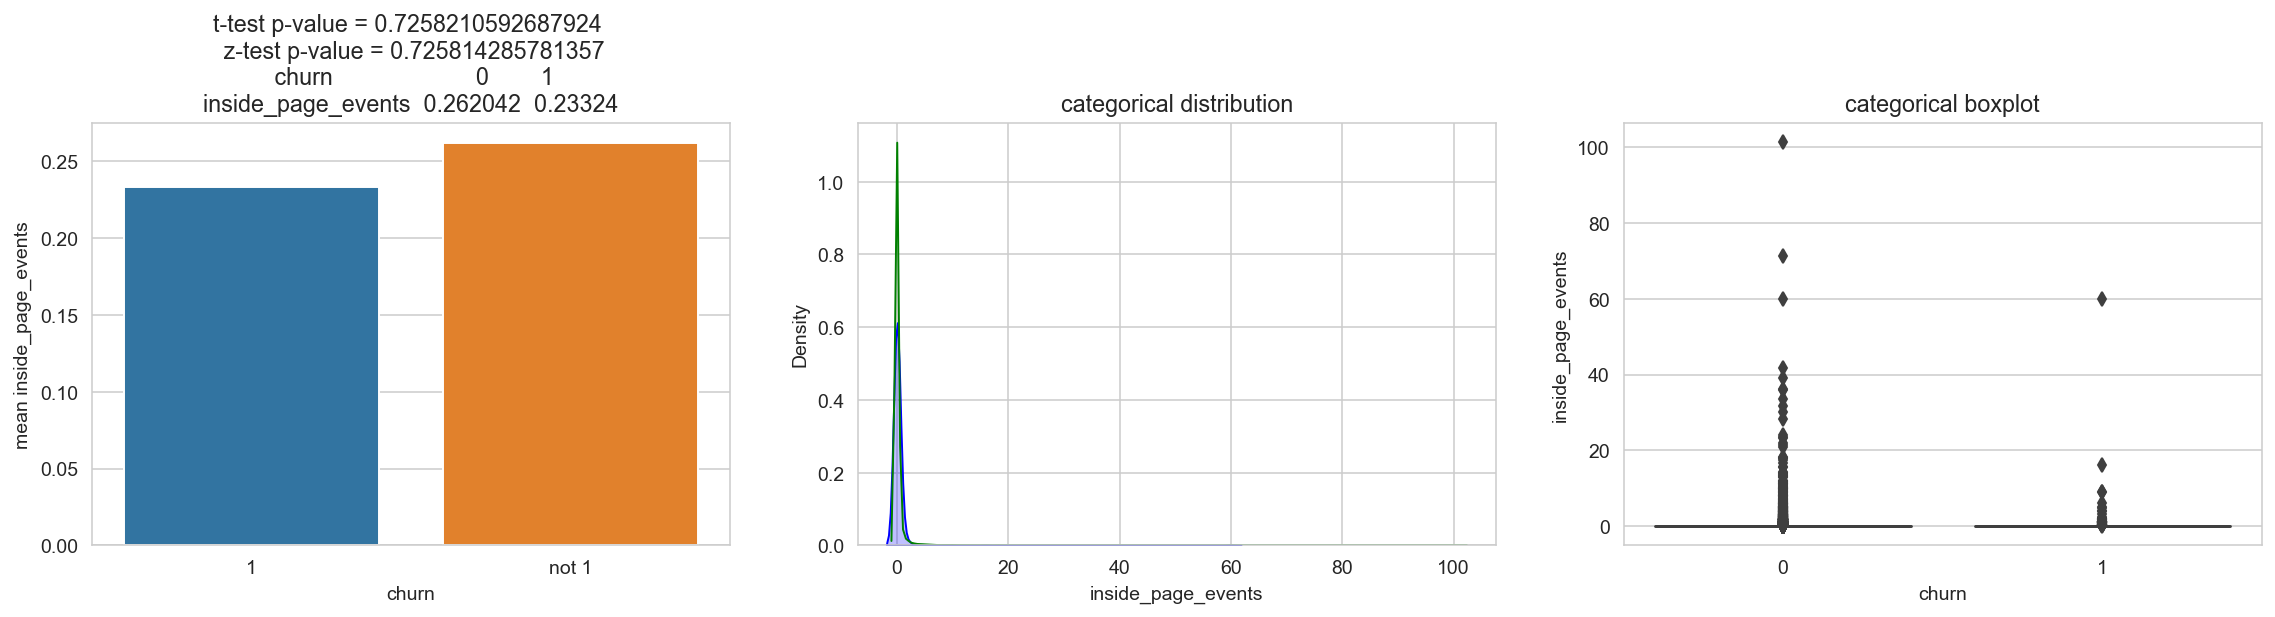

In [ ]:
Bivariate_cont_cat(df, 'inside_page_events', 'churn', 1)

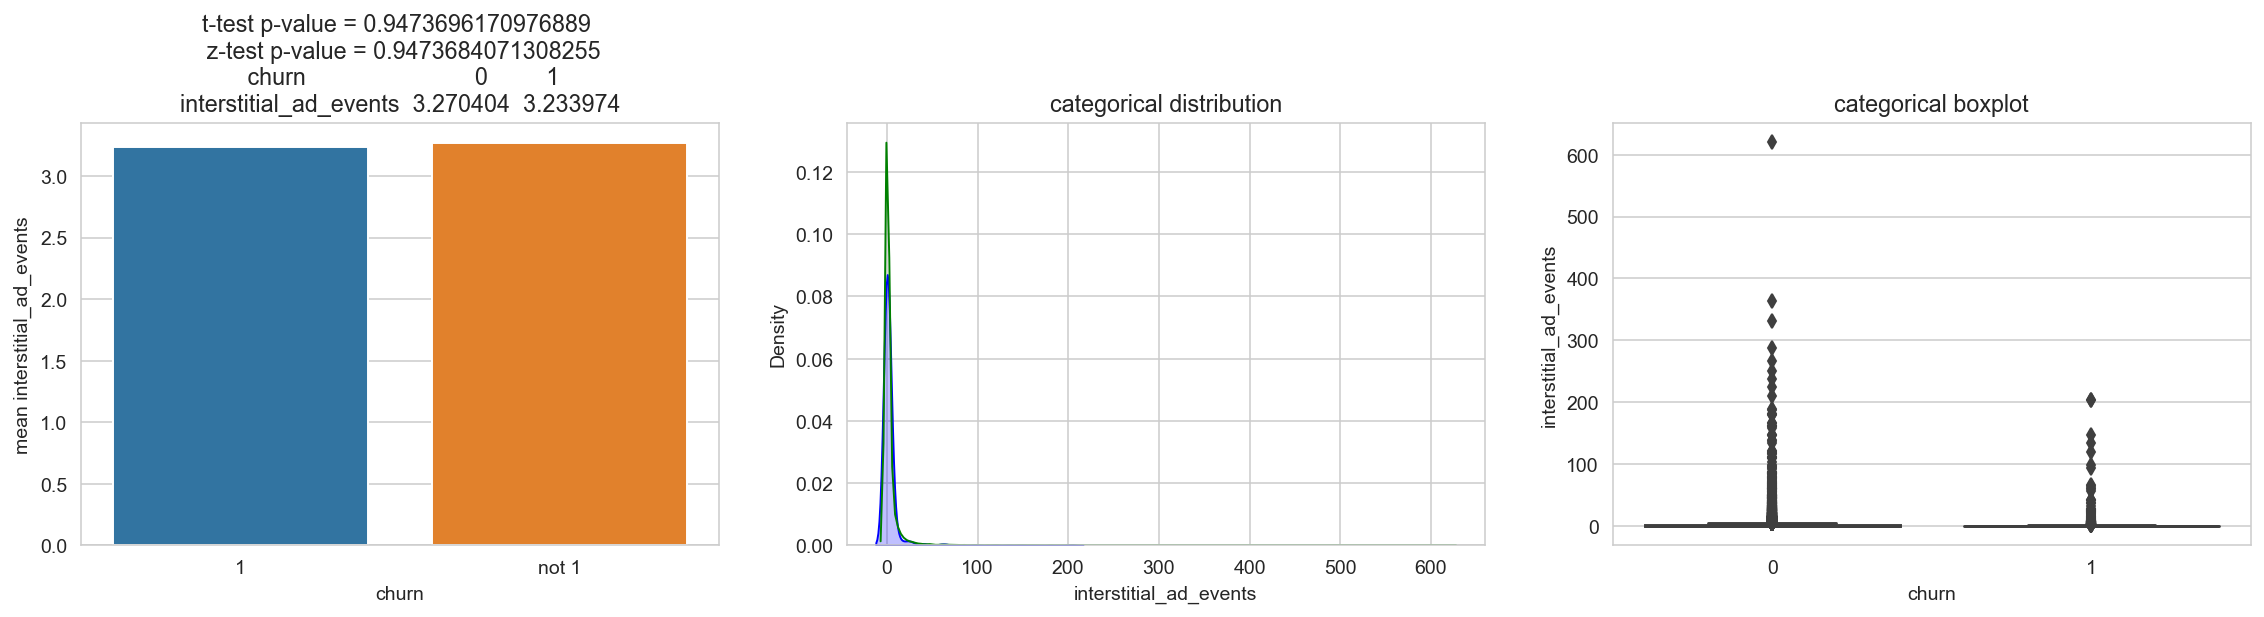

In [ ]:
Bivariate_cont_cat(df, 'interstitial_ad_events', 'churn', 1)

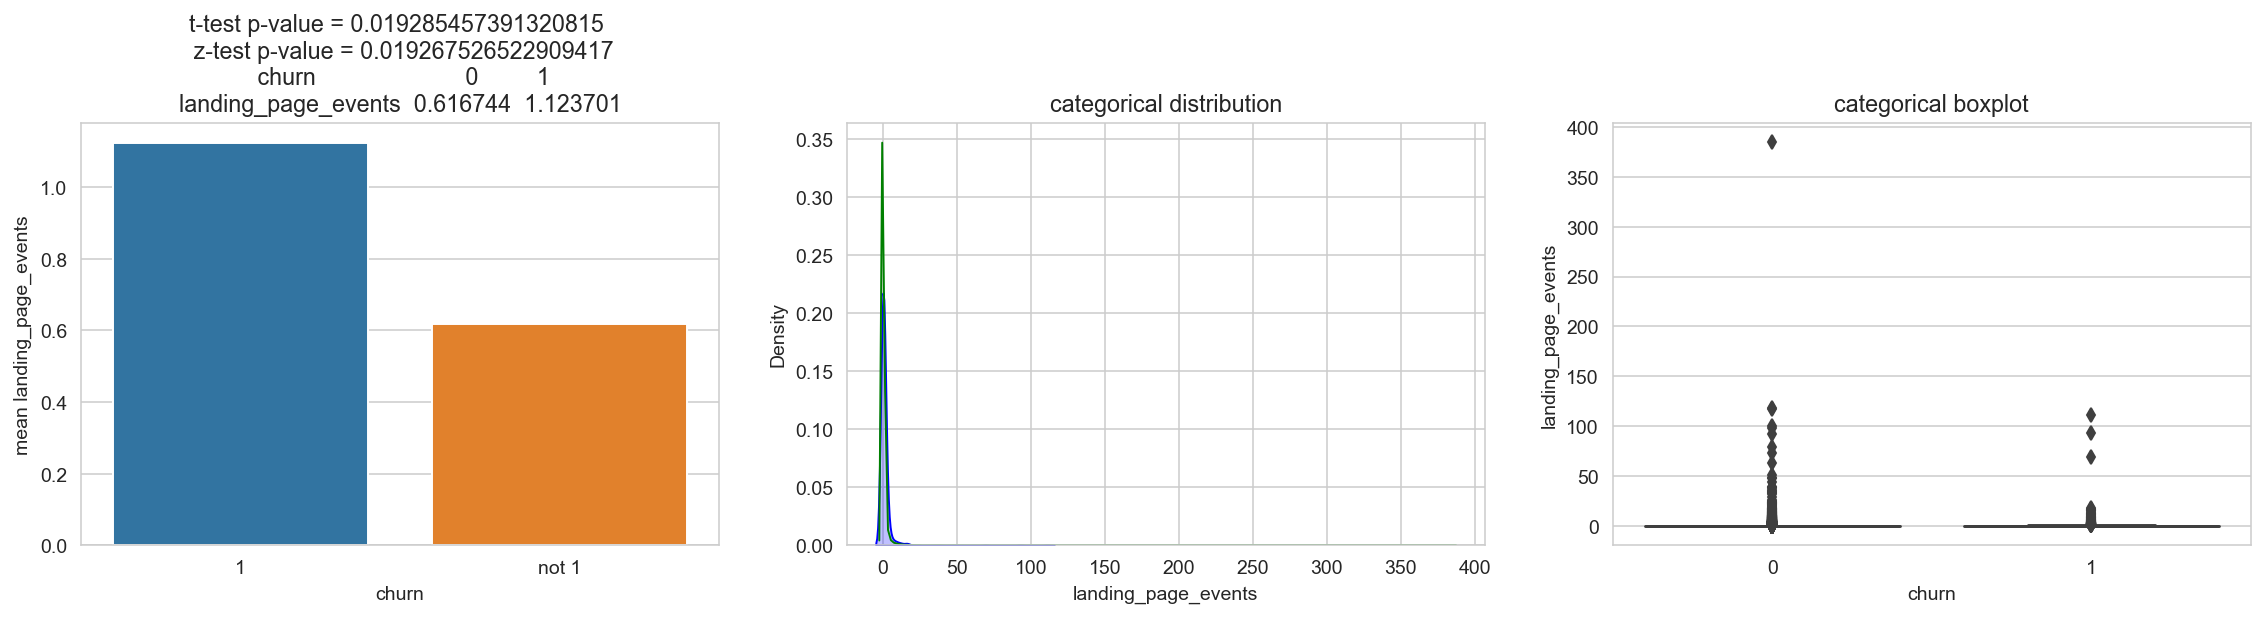

In [ ]:
Bivariate_cont_cat(df, 'landing_page_events', 'churn', 1)

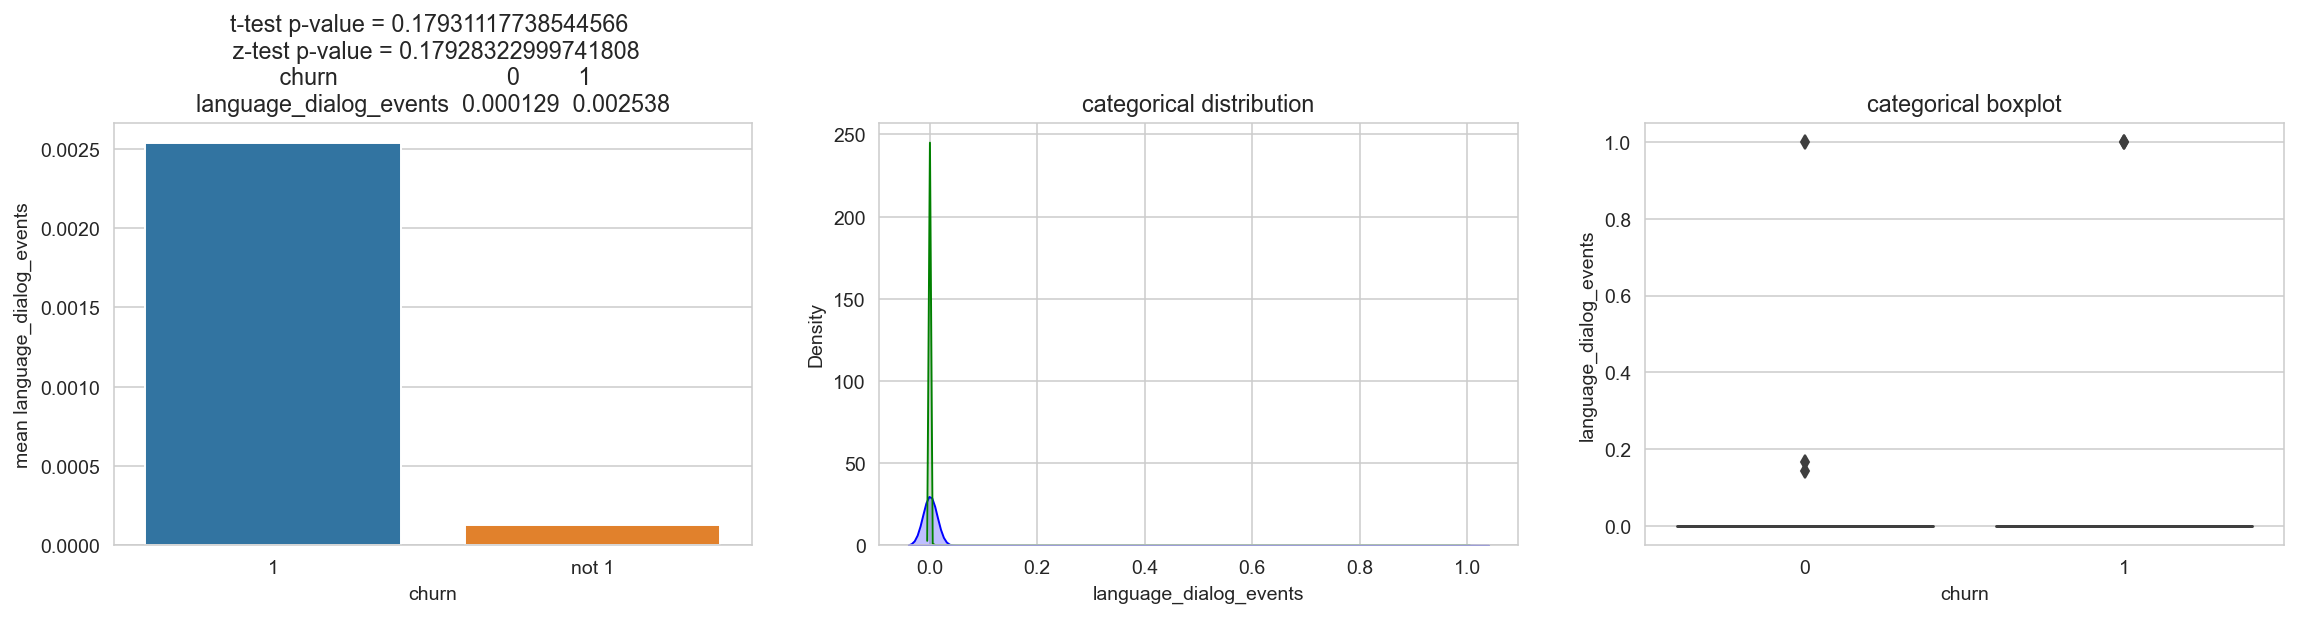

In [ ]:
Bivariate_cont_cat(df, 'language_dialog_events', 'churn', 1)

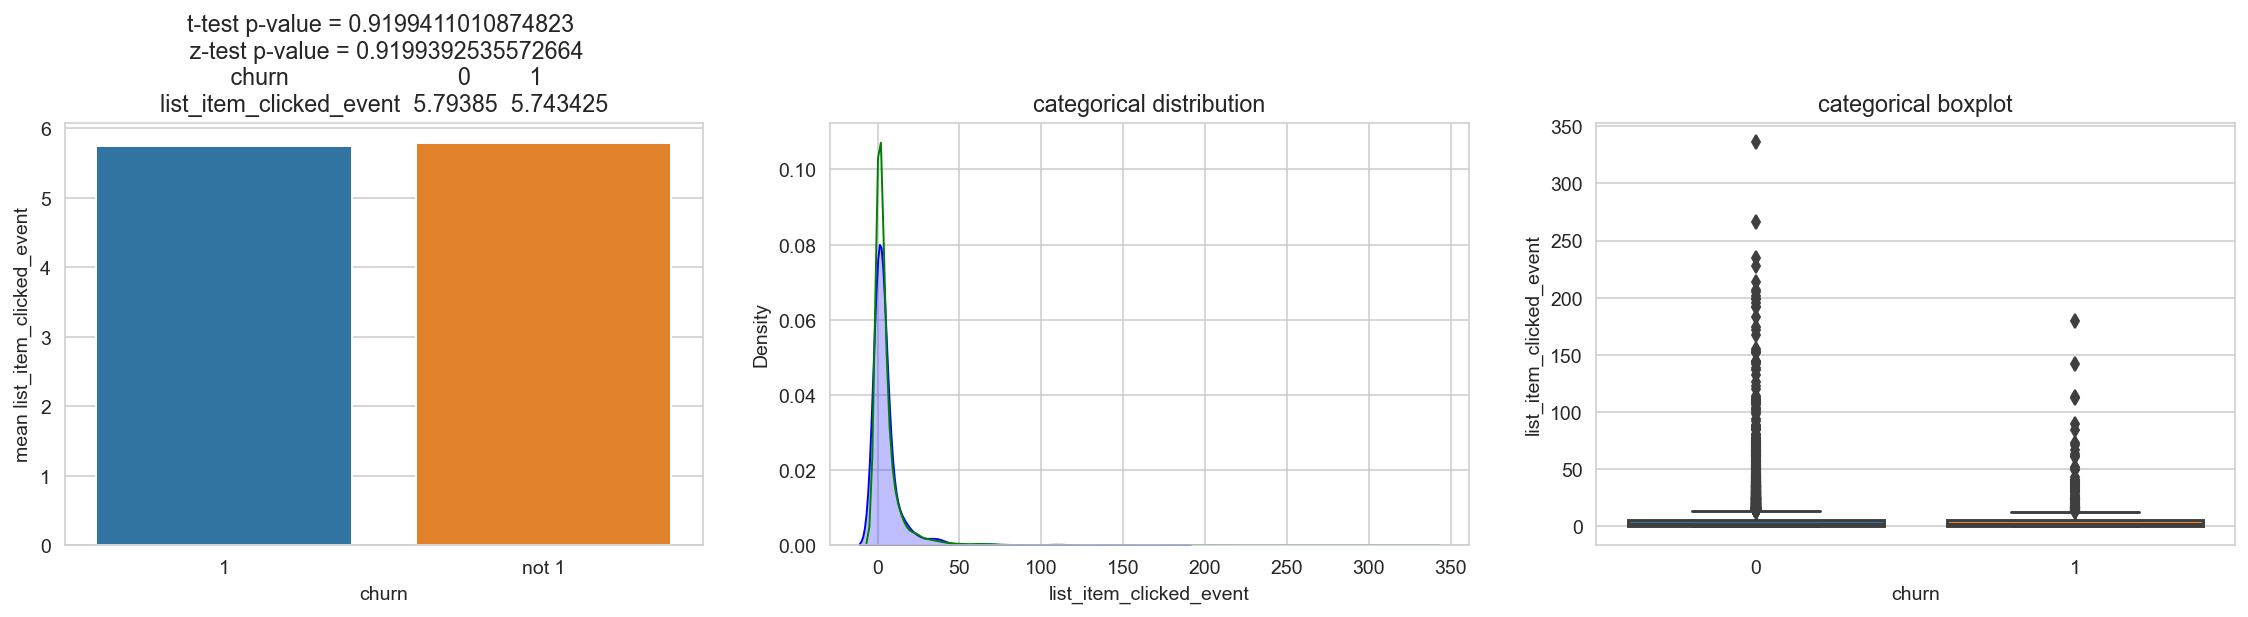

In [ ]:
Bivariate_cont_cat(df, 'list_item_clicked_event', 'churn', 1)

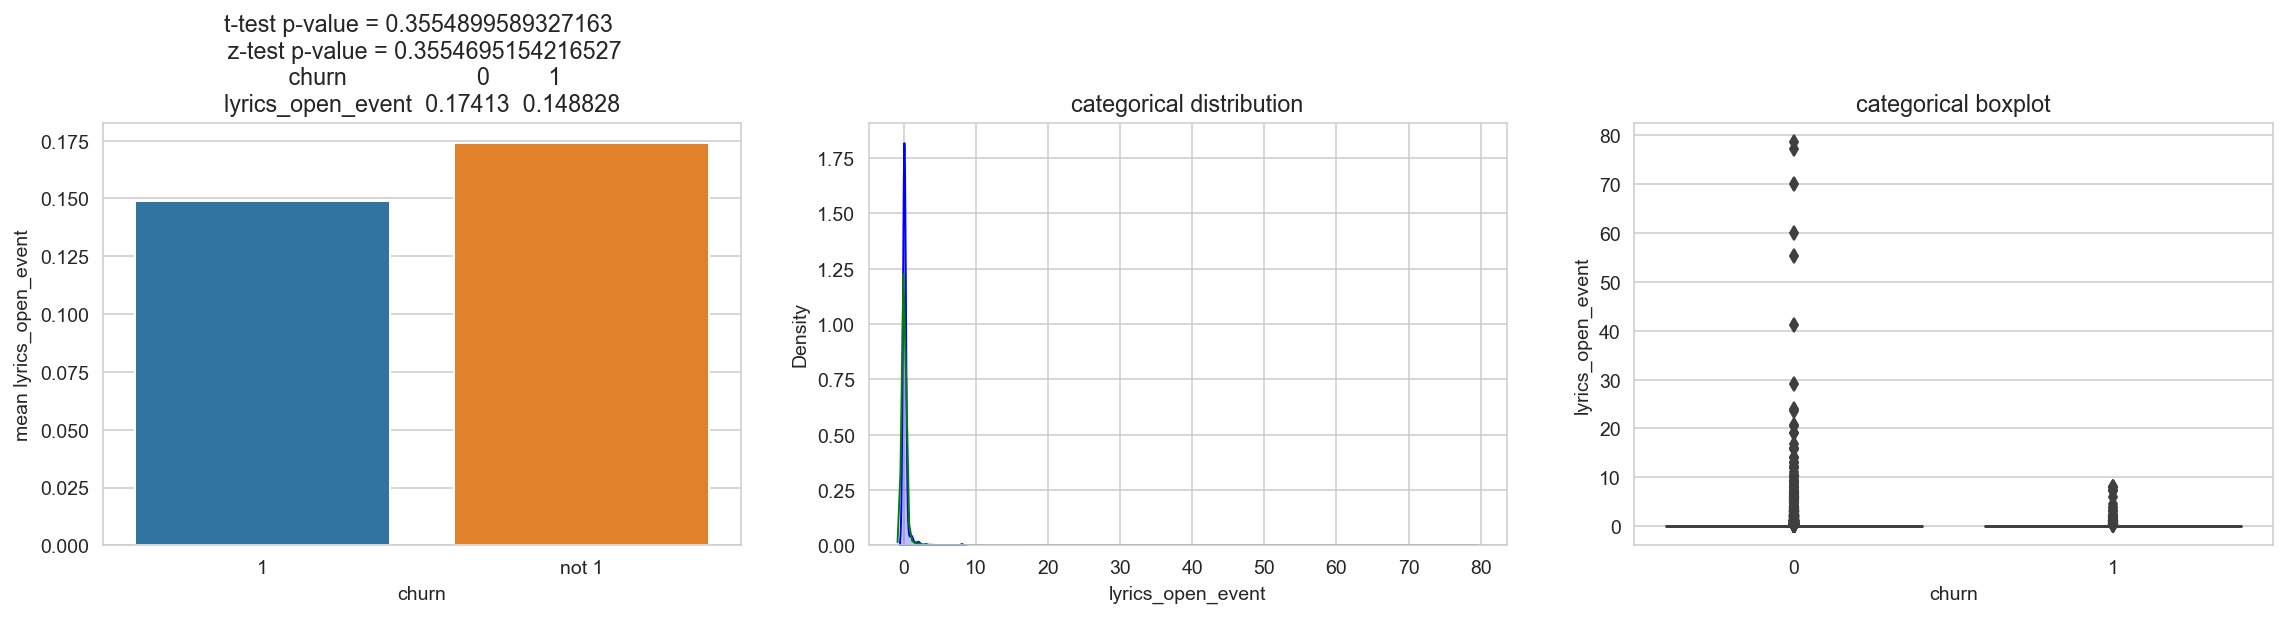

In [ ]:
Bivariate_cont_cat(df, 'lyrics_open_event', 'churn', 1)

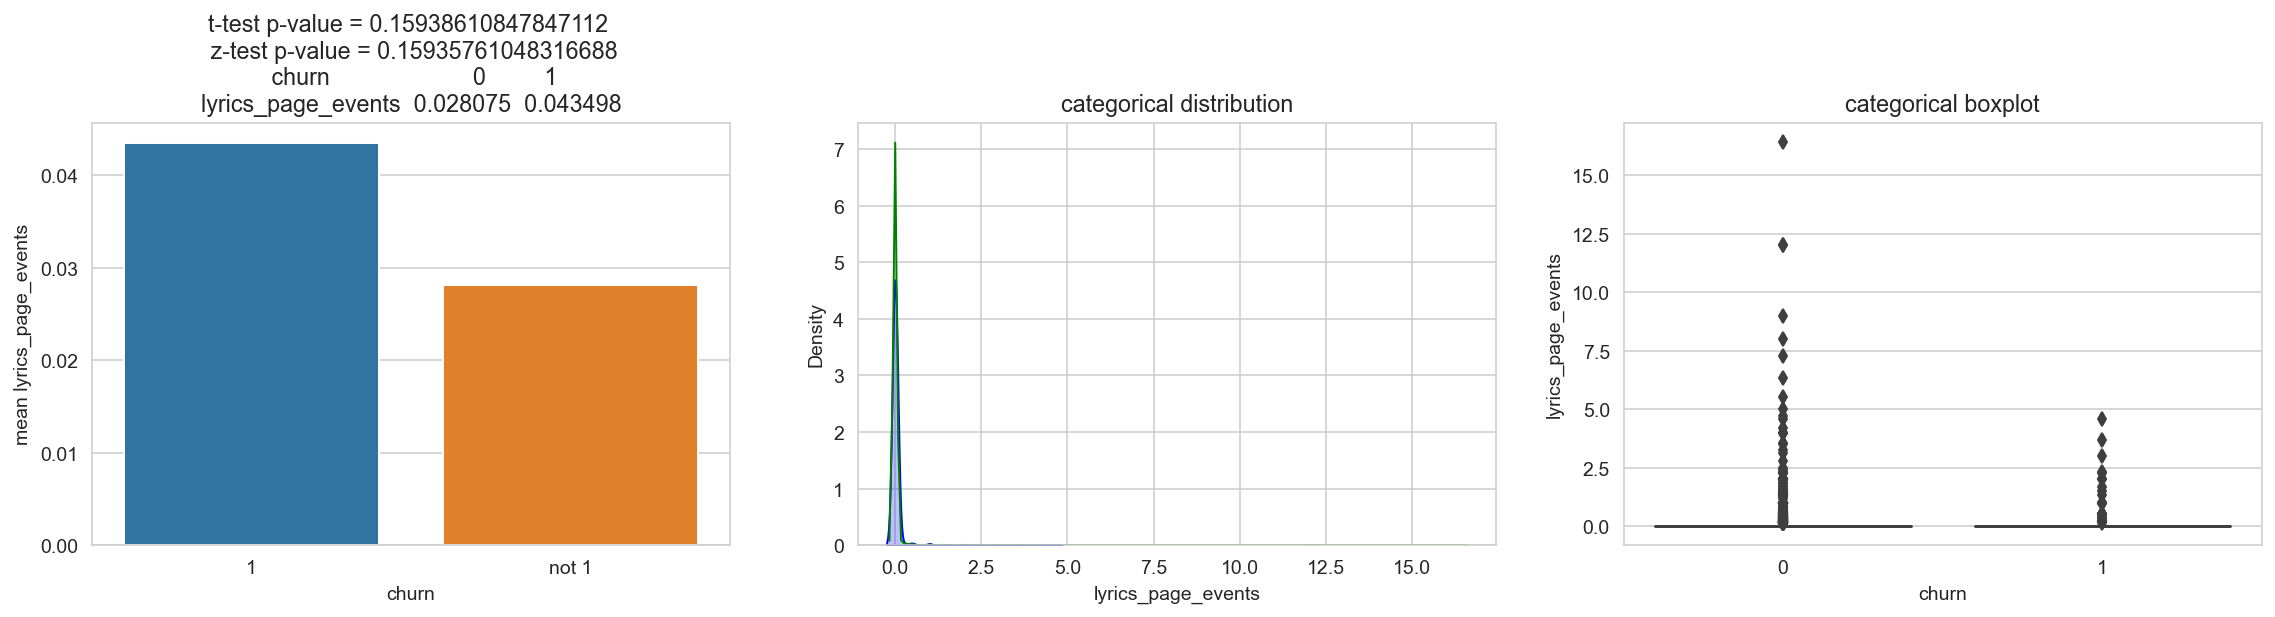

In [ ]:
Bivariate_cont_cat(df, 'lyrics_page_events', 'churn', 1)

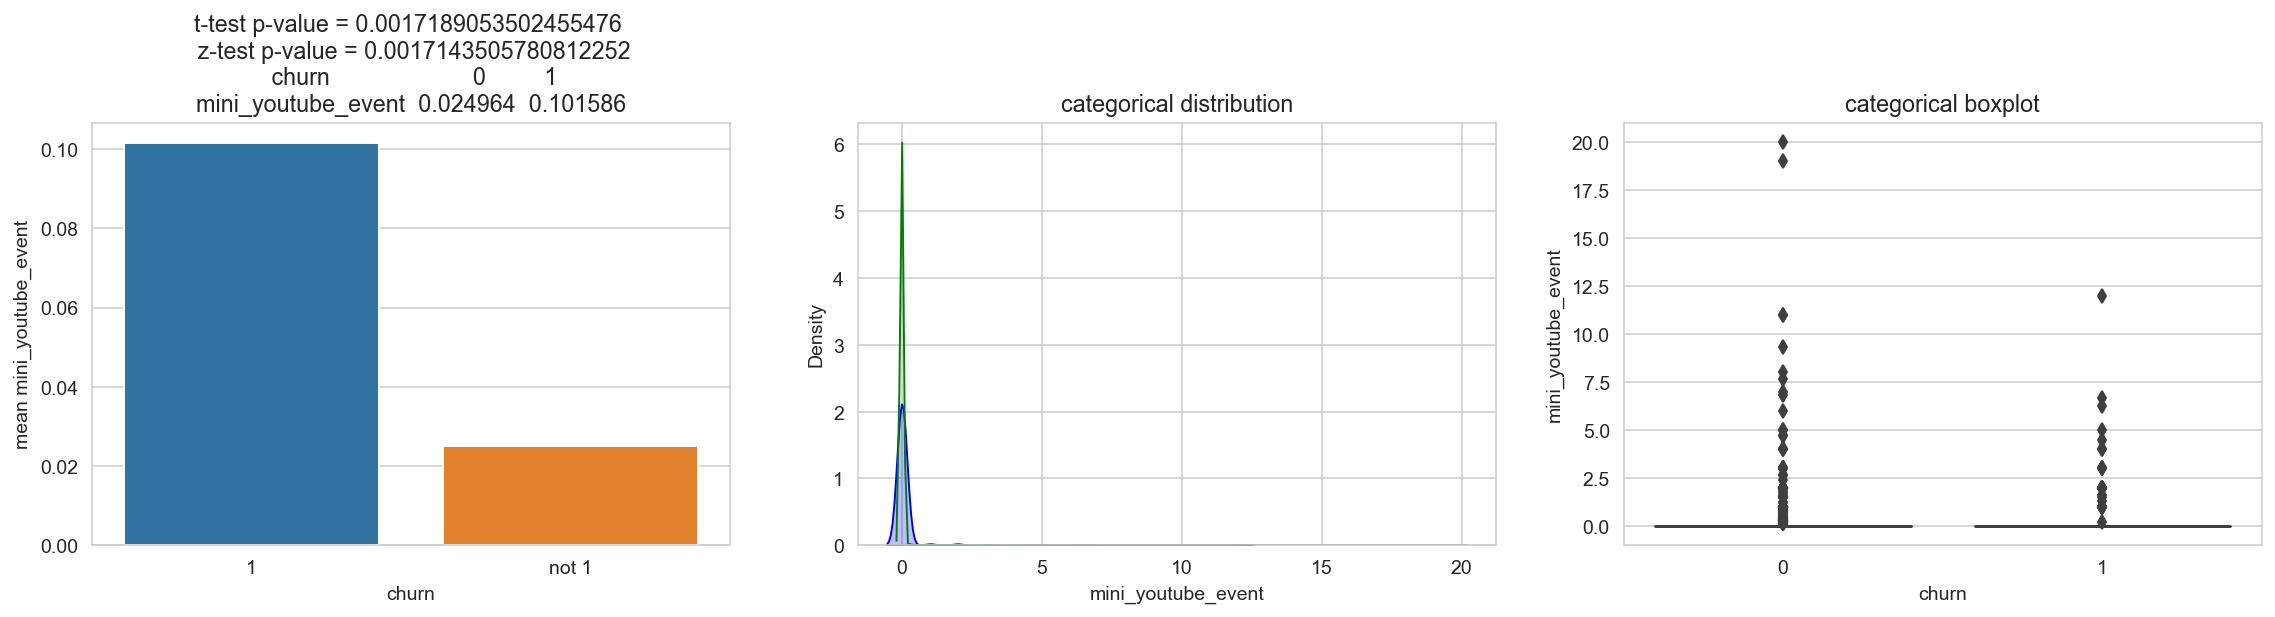

In [ ]:
Bivariate_cont_cat(df, 'mini_youtube_event', 'churn', 1)

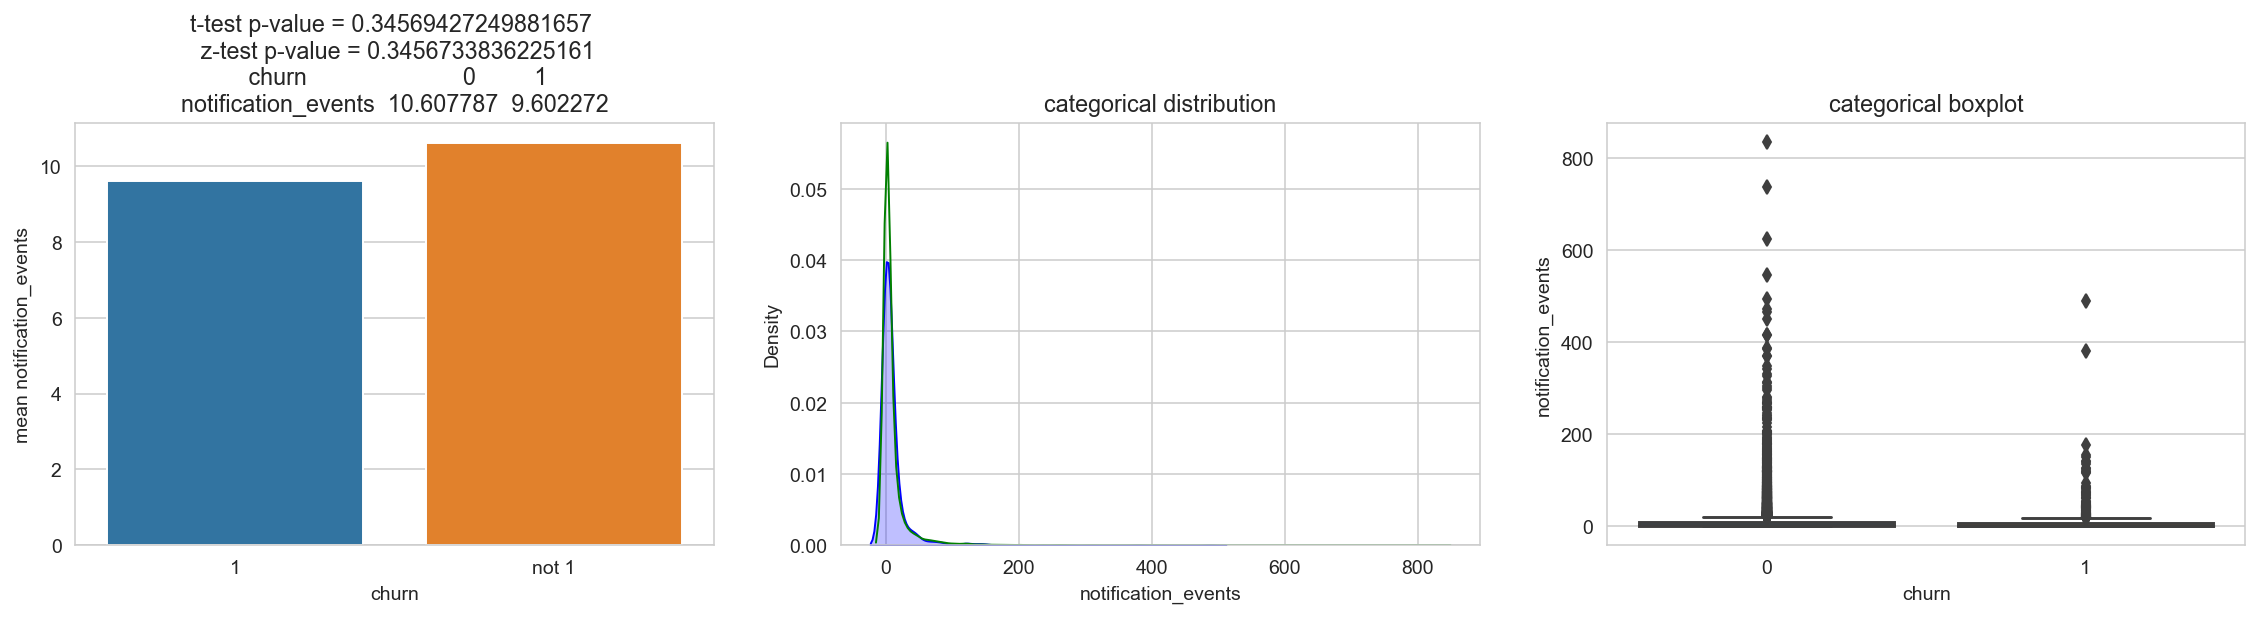

In [ ]:
Bivariate_cont_cat(df, 'notification_events', 'churn', 1)

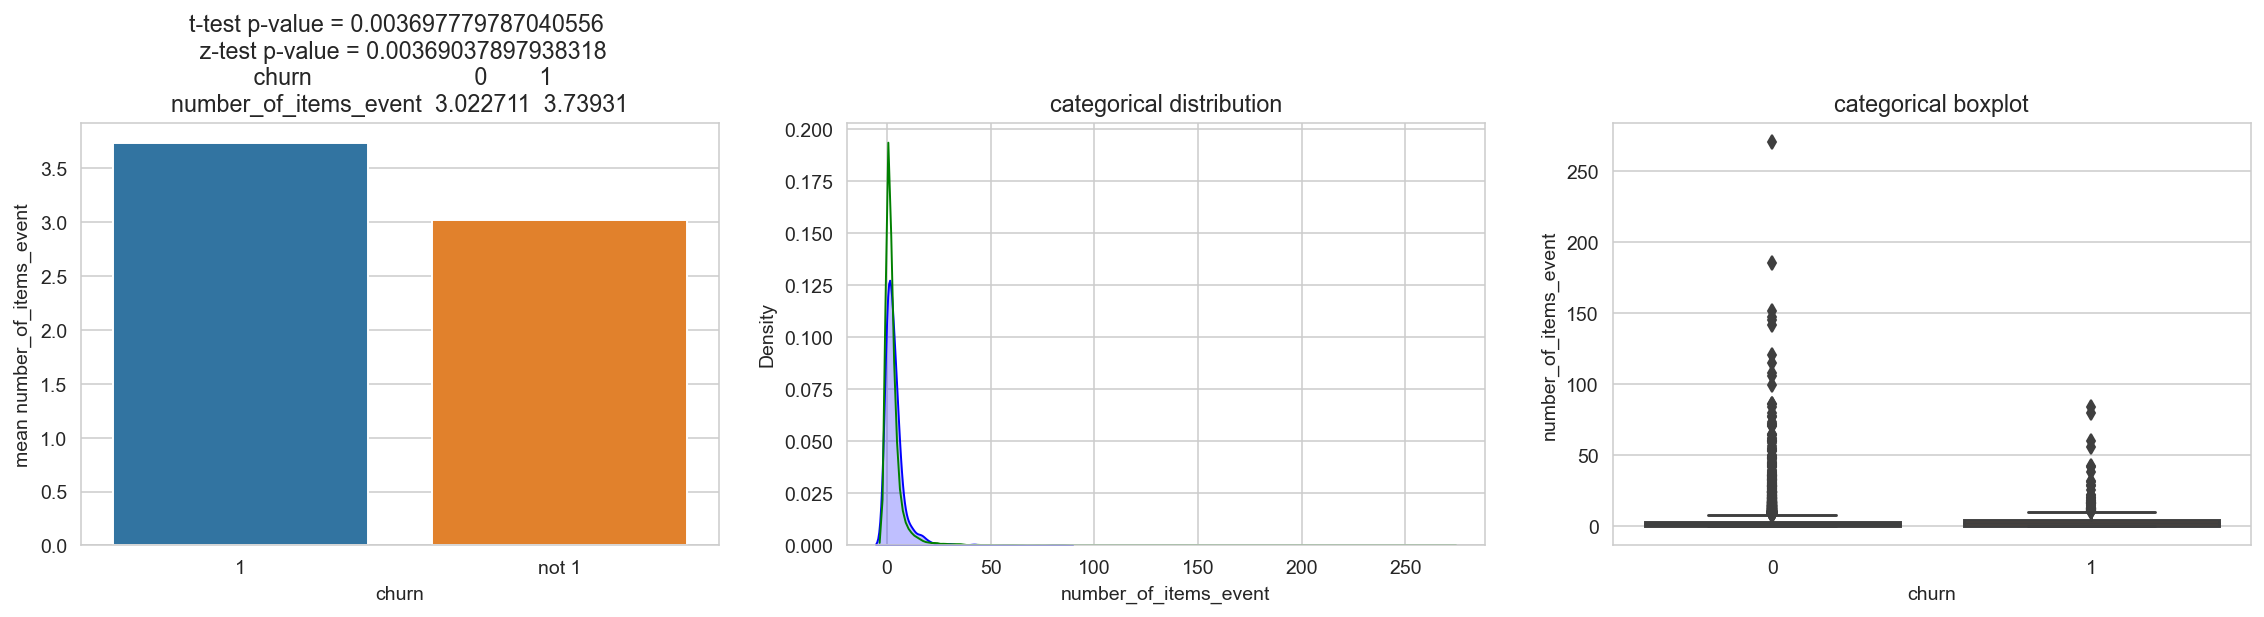

In [ ]:
Bivariate_cont_cat(df, 'number_of_items_event', 'churn', 1)

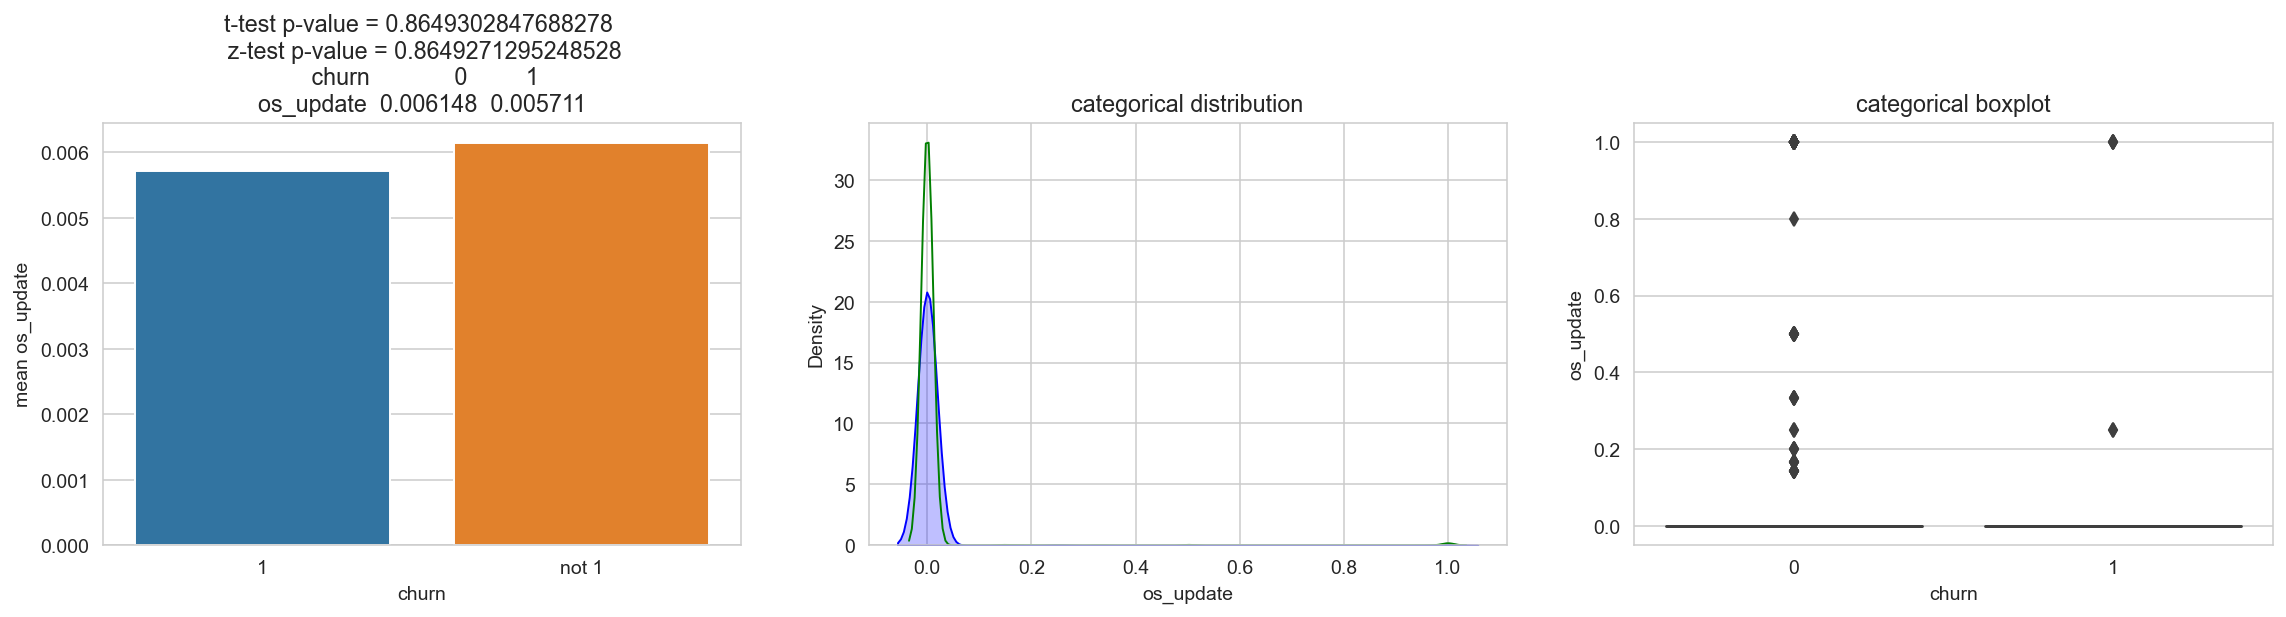

In [ ]:
Bivariate_cont_cat(df, 'os_update', 'churn', 1)

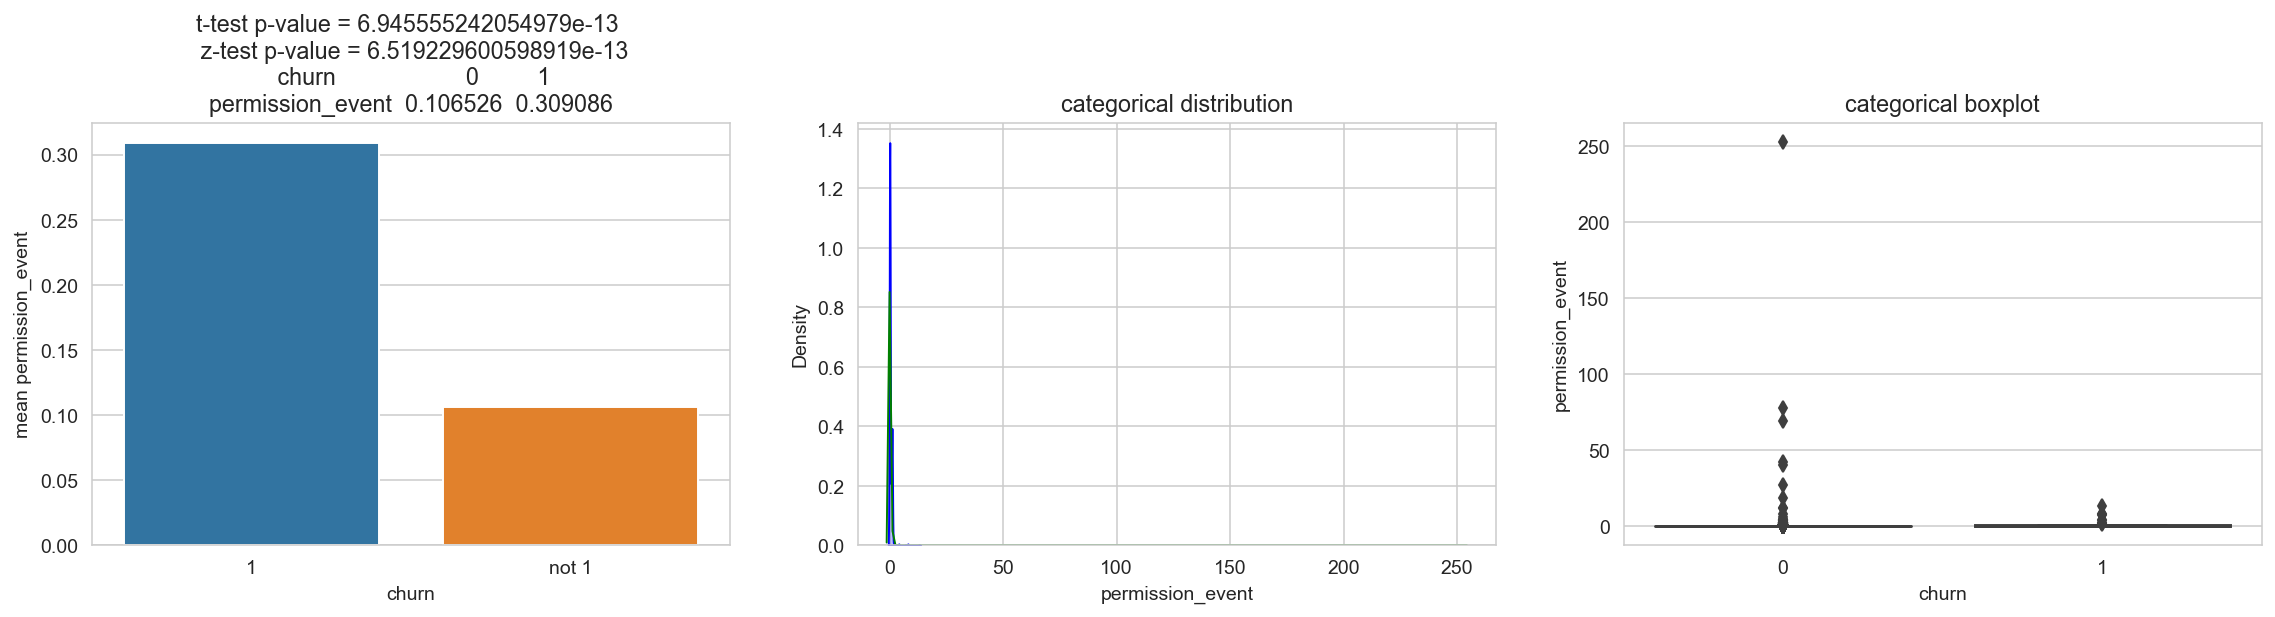

In [ ]:
Bivariate_cont_cat(df, 'permission_event', 'churn', 1)

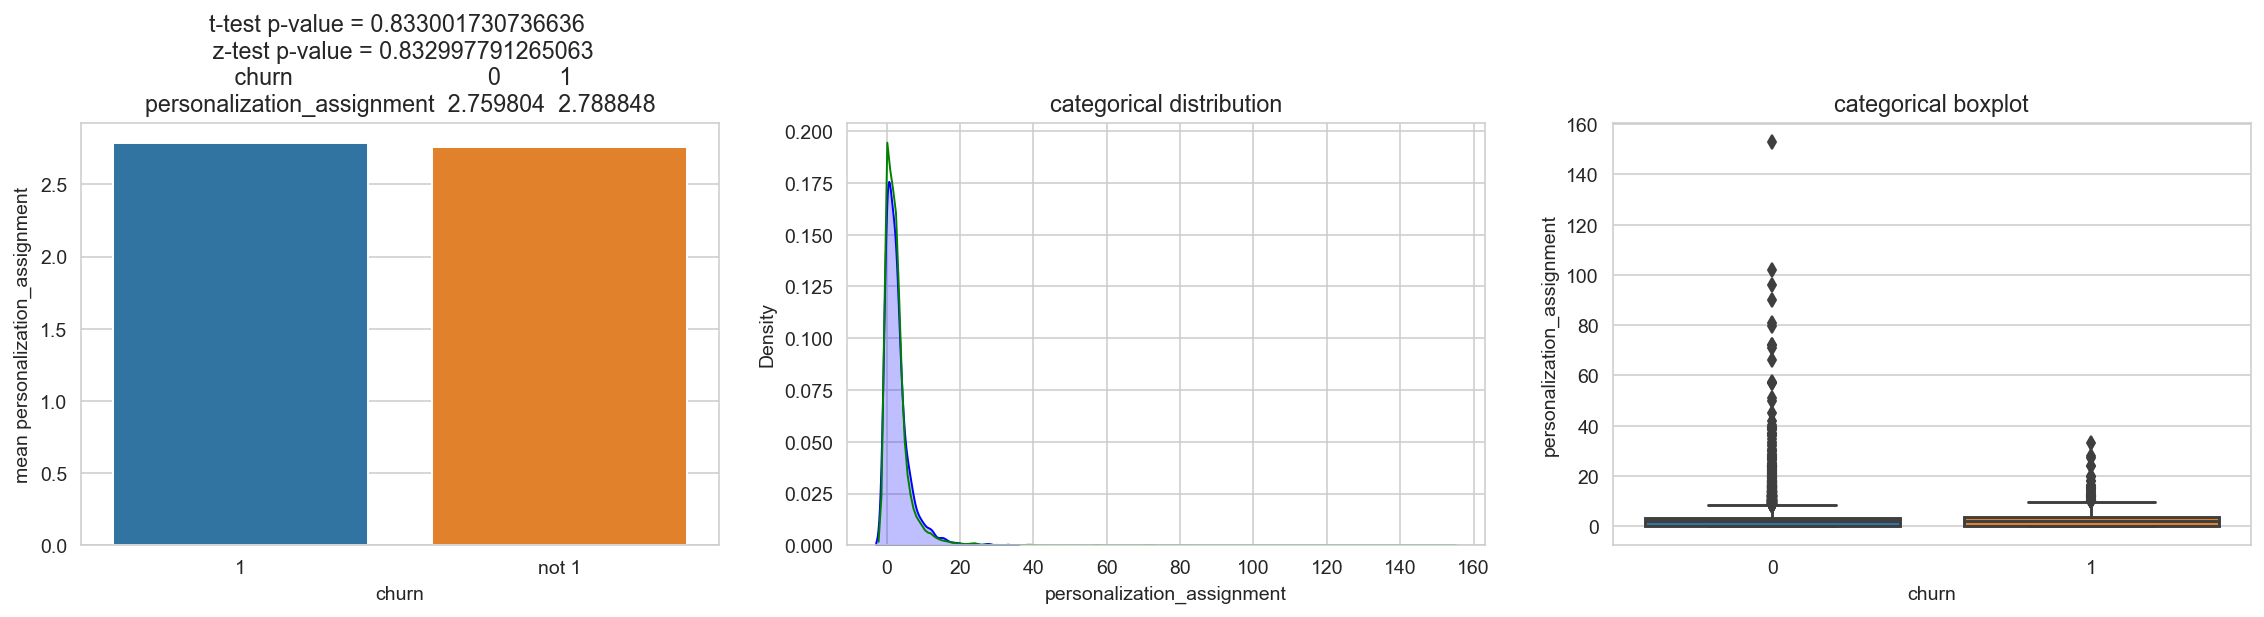

In [ ]:
Bivariate_cont_cat(df, 'personalization_assignment', 'churn', 1)

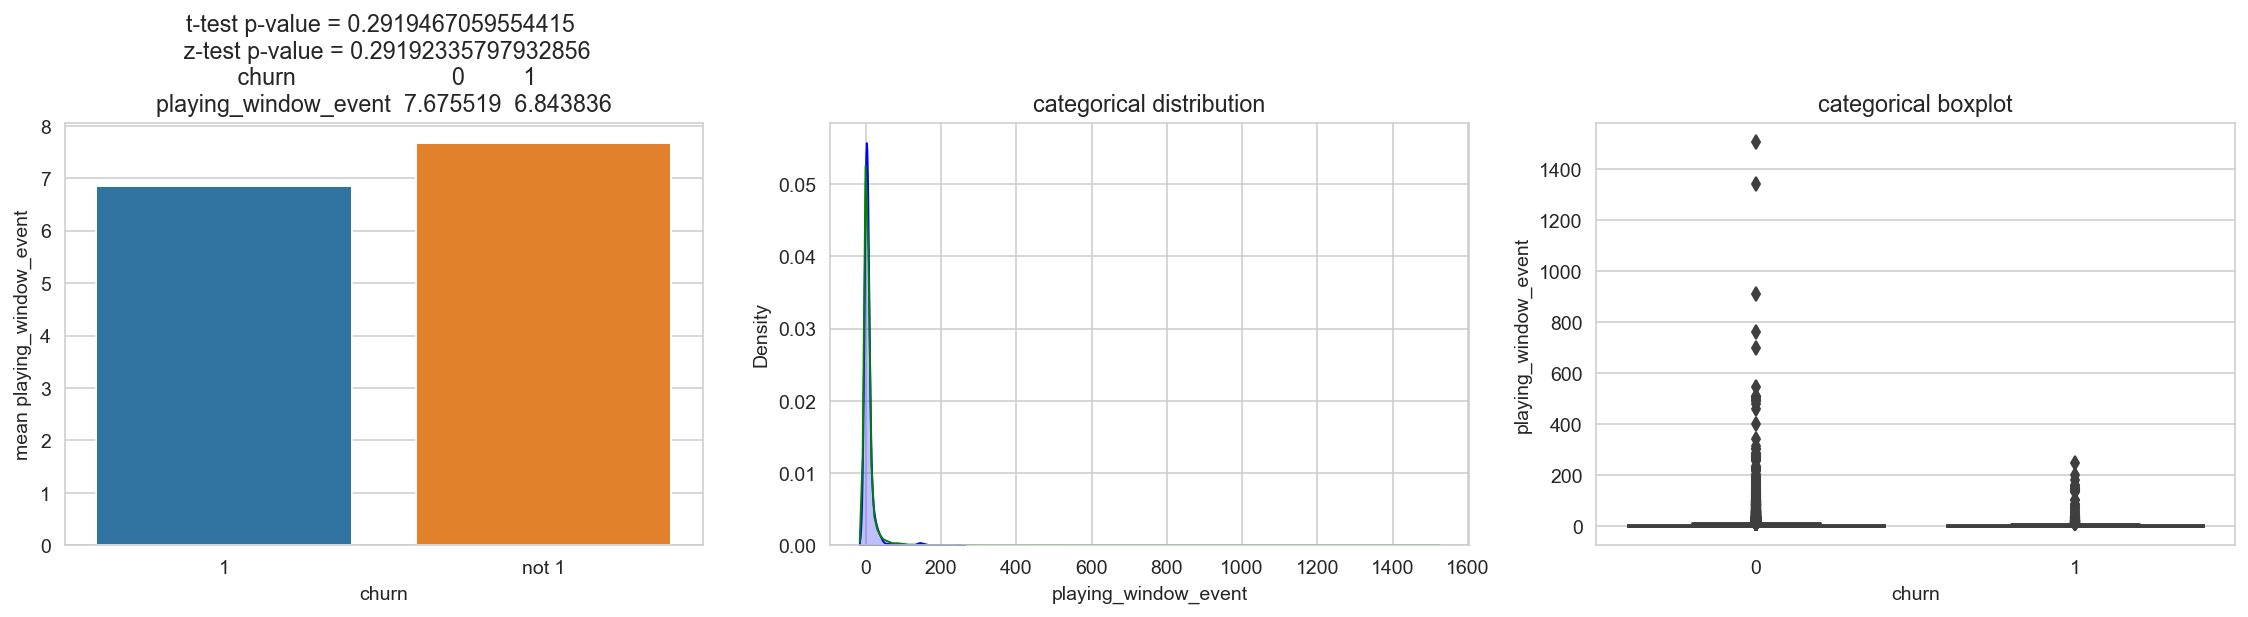

In [ ]:
Bivariate_cont_cat(df, 'playing_window_event', 'churn', 1)

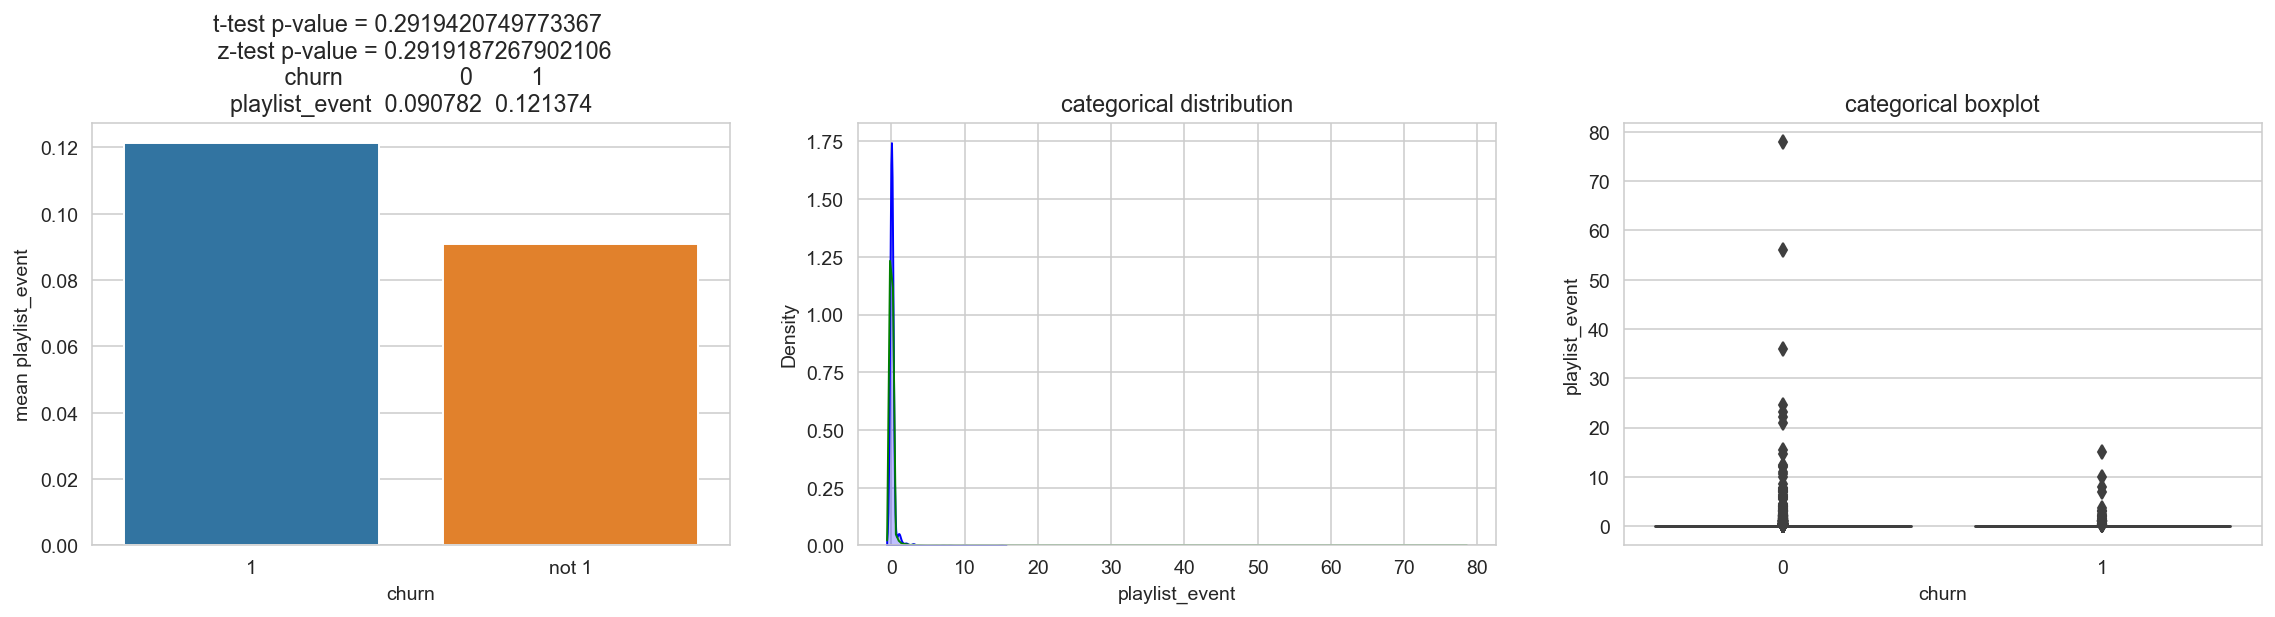

In [ ]:
Bivariate_cont_cat(df, 'playlist_event', 'churn', 1)

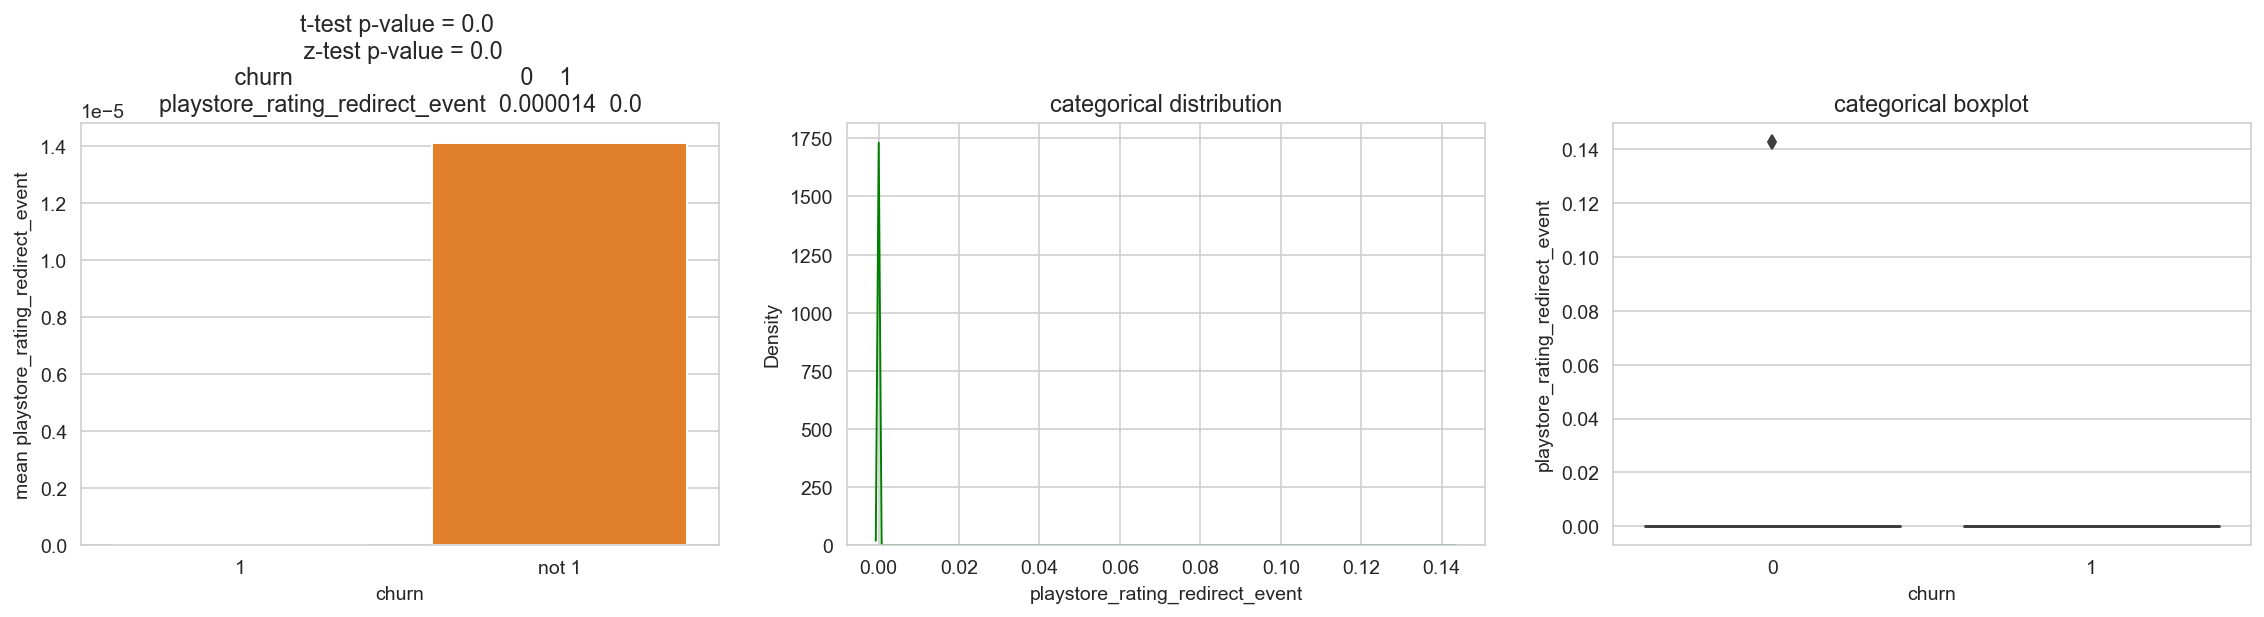

In [ ]:
Bivariate_cont_cat(df, 'playstore_rating_redirect_event', 'churn', 1)

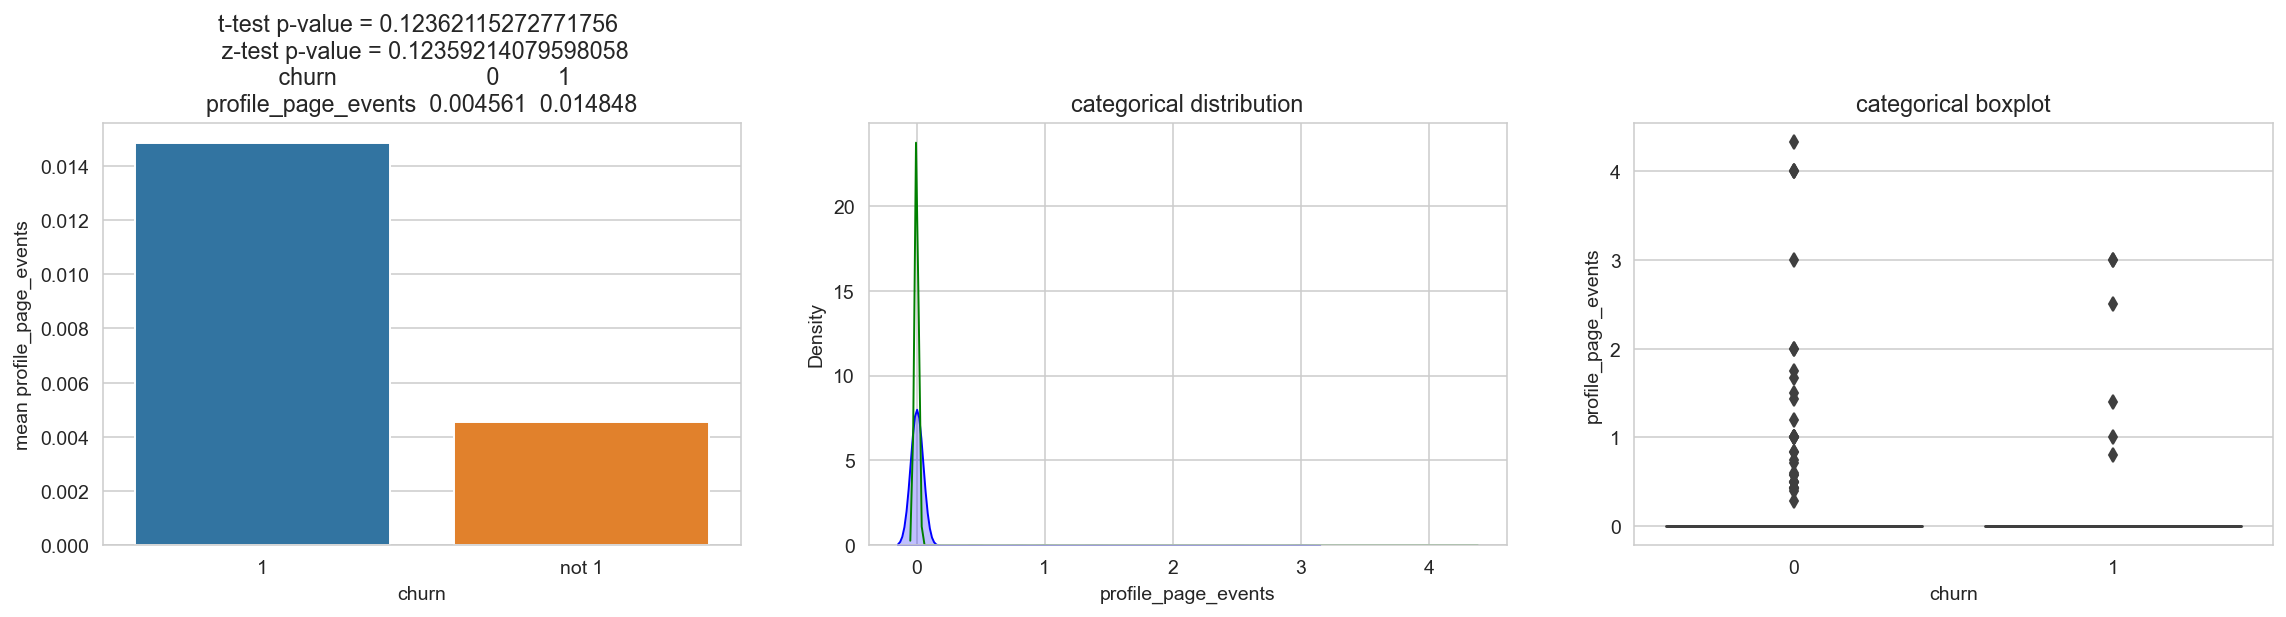

In [ ]:
Bivariate_cont_cat(df, 'profile_page_events', 'churn', 1)

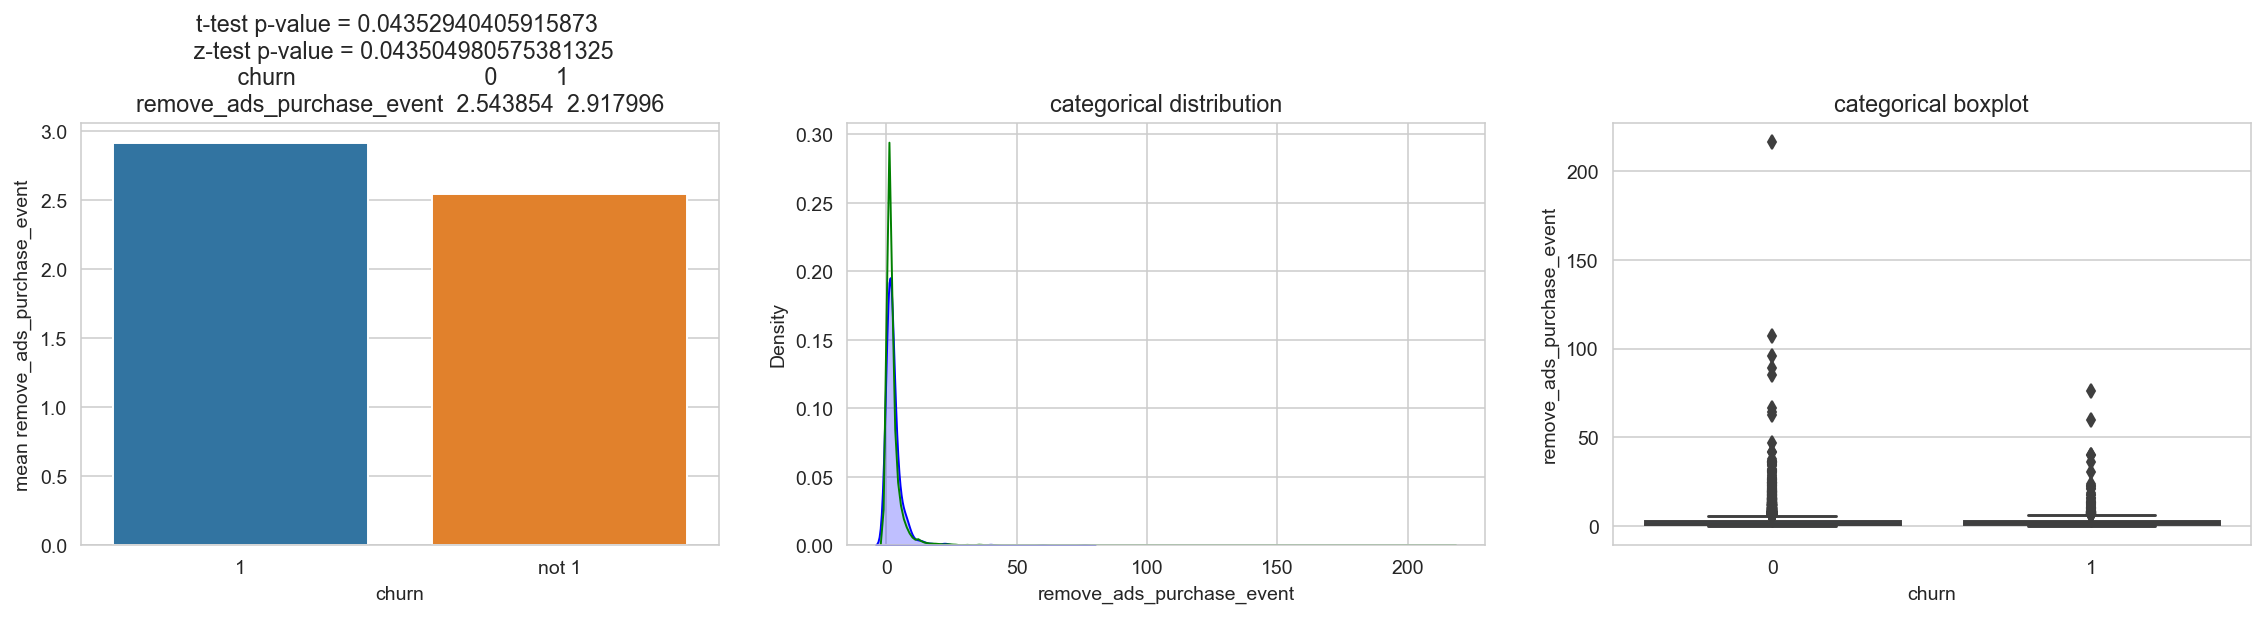

In [ ]:
Bivariate_cont_cat(df, 'remove_ads_purchase_event', 'churn', 1)

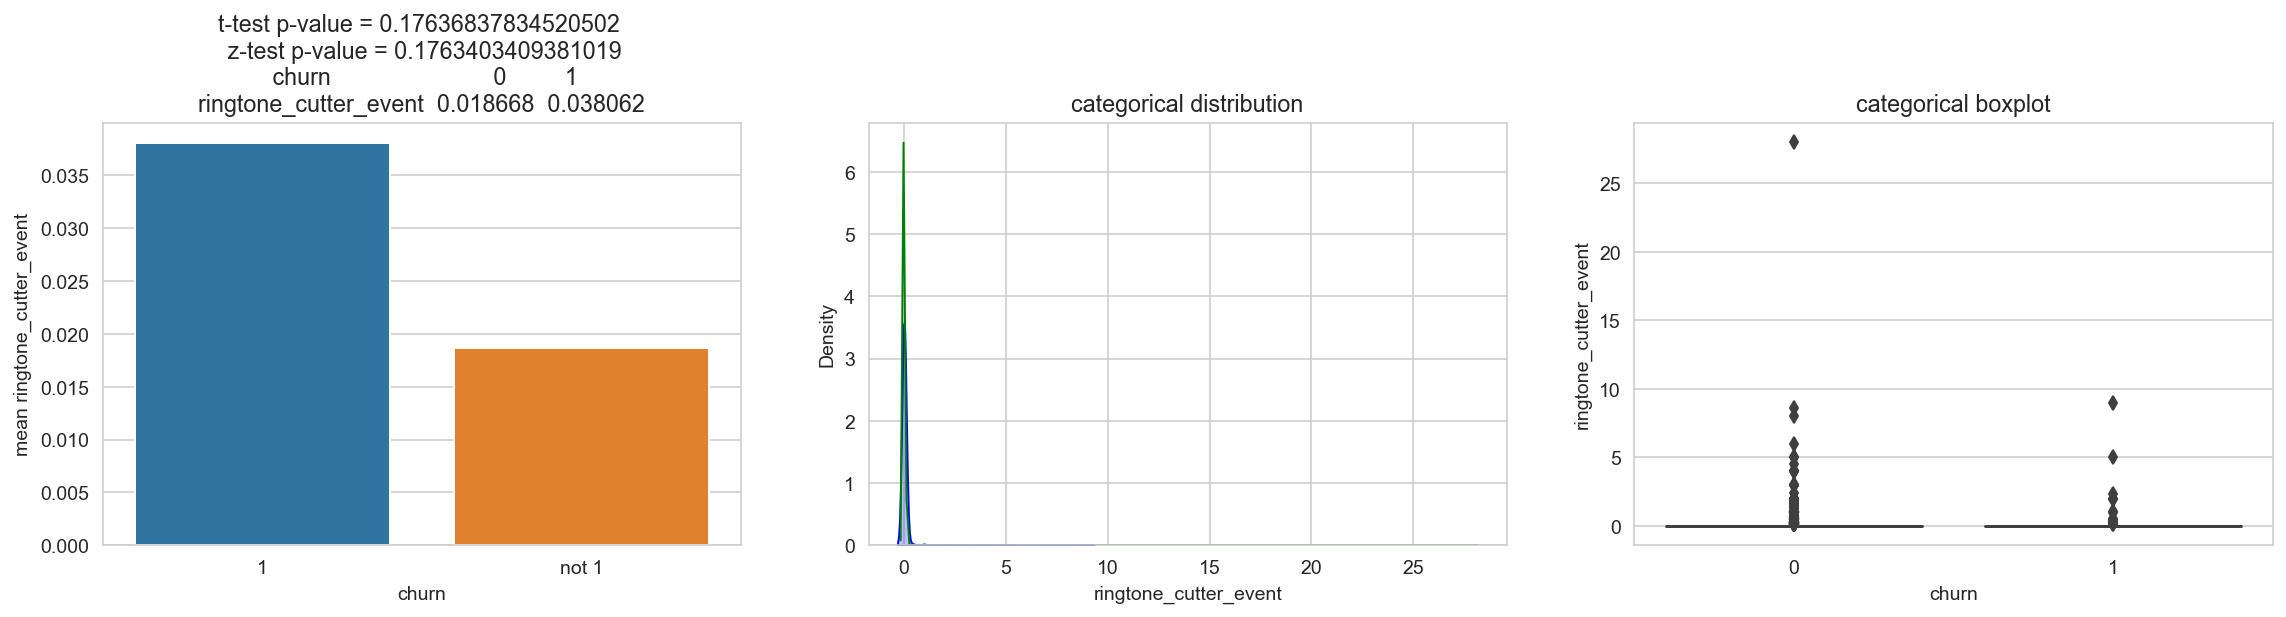

In [ ]:
Bivariate_cont_cat(df, 'ringtone_cutter_event', 'churn', 1)

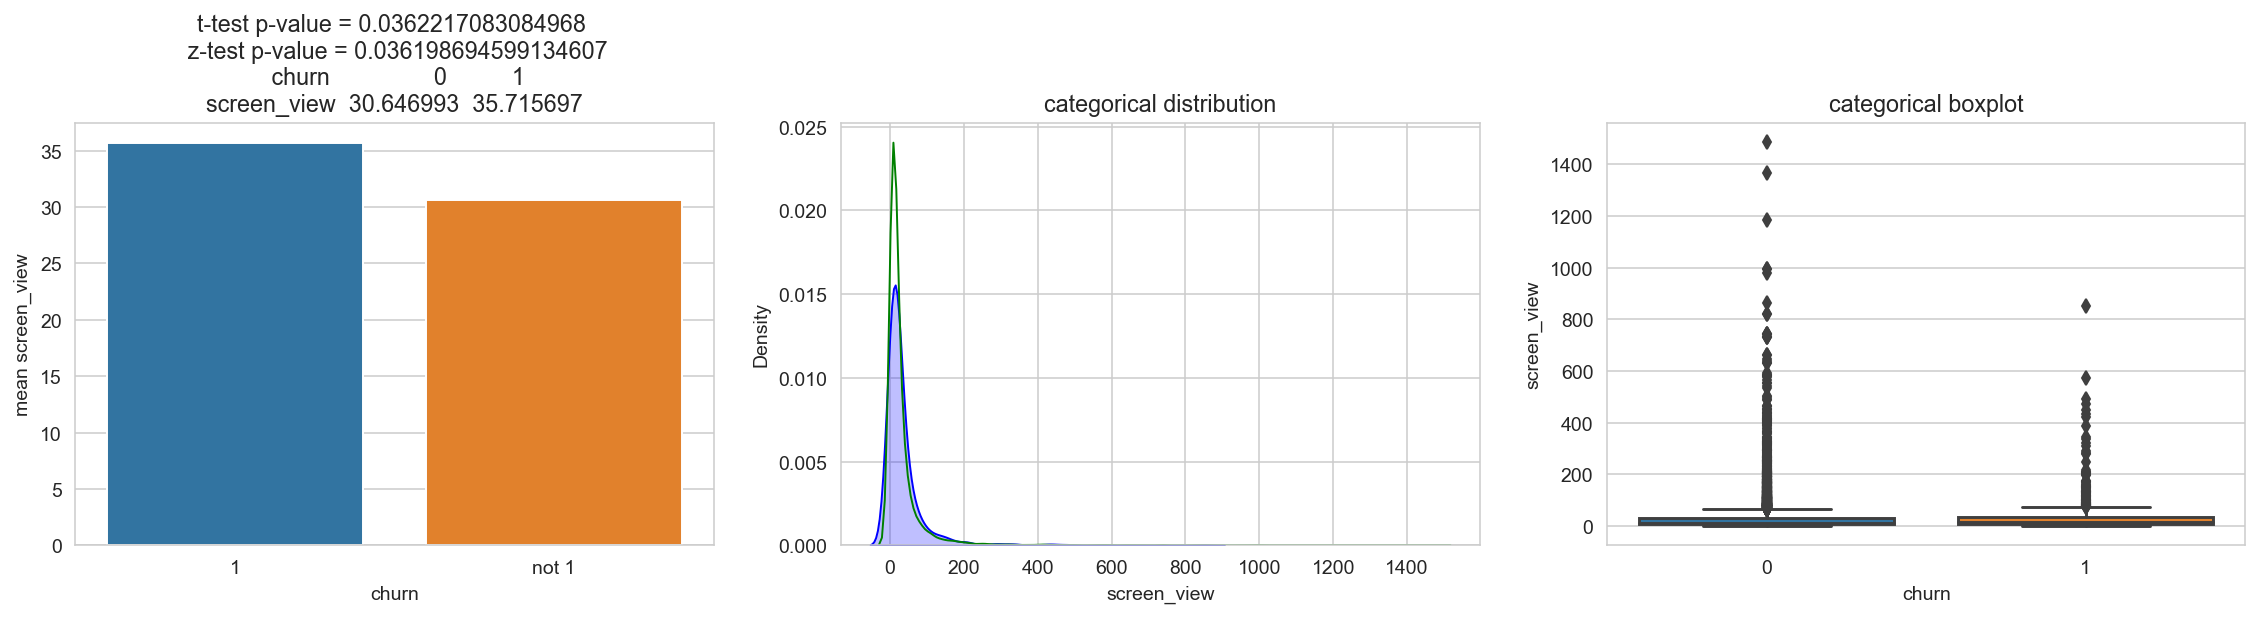

In [ ]:
Bivariate_cont_cat(df, 'screen_view', 'churn', 1)

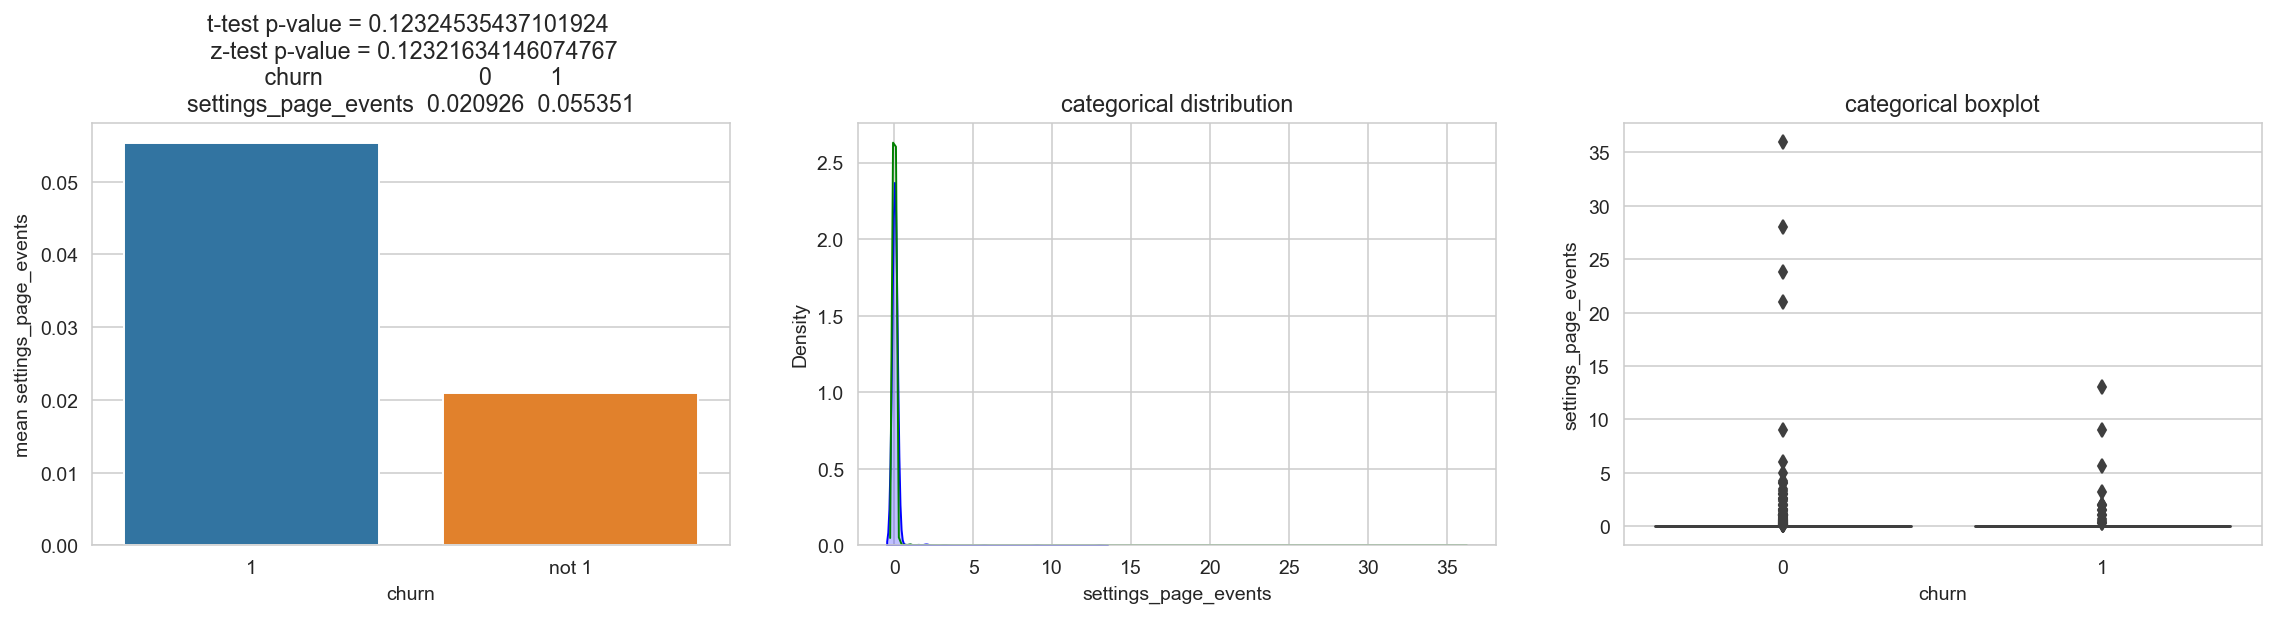

In [ ]:
Bivariate_cont_cat(df, 'settings_page_events', 'churn', 1)

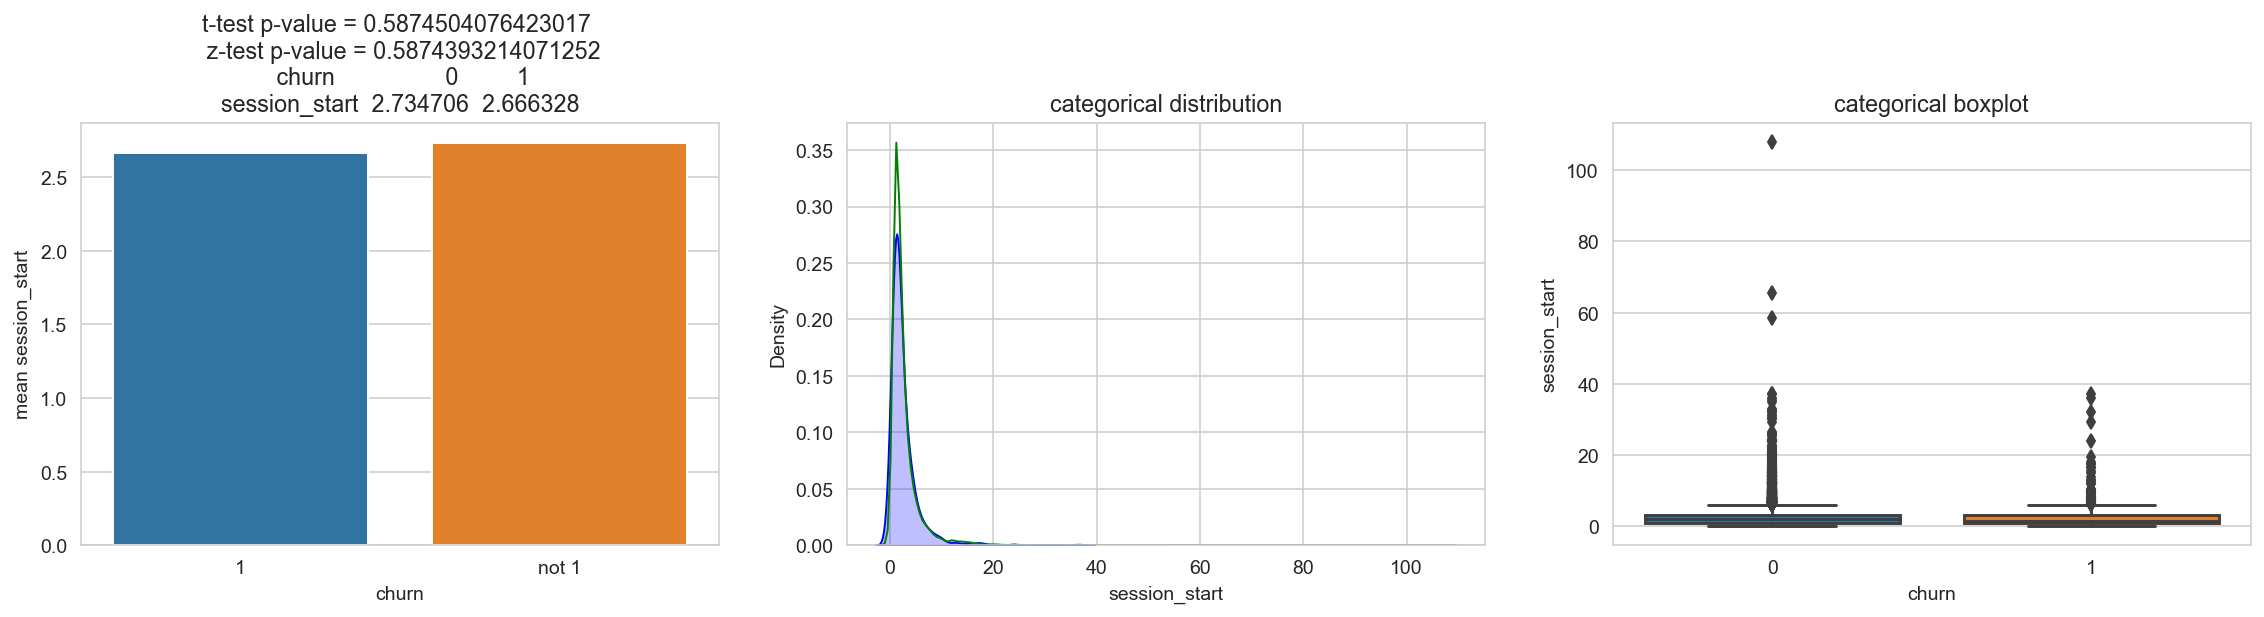

In [ ]:
Bivariate_cont_cat(df, 'session_start', 'churn', 1)

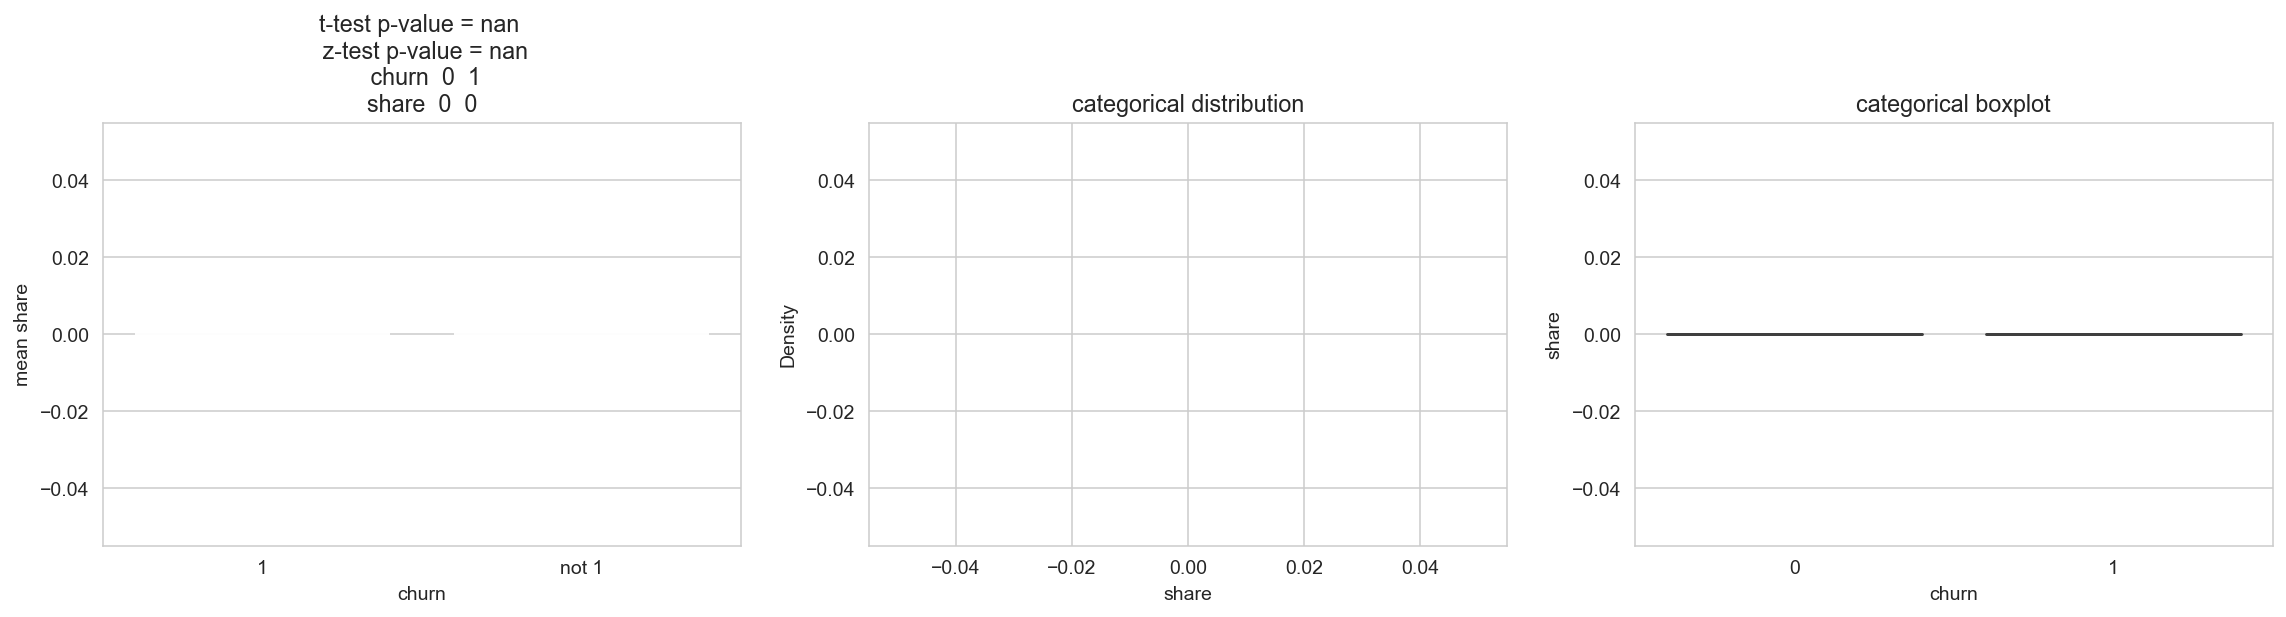

In [ ]:
Bivariate_cont_cat(df, 'share', 'churn', 1)

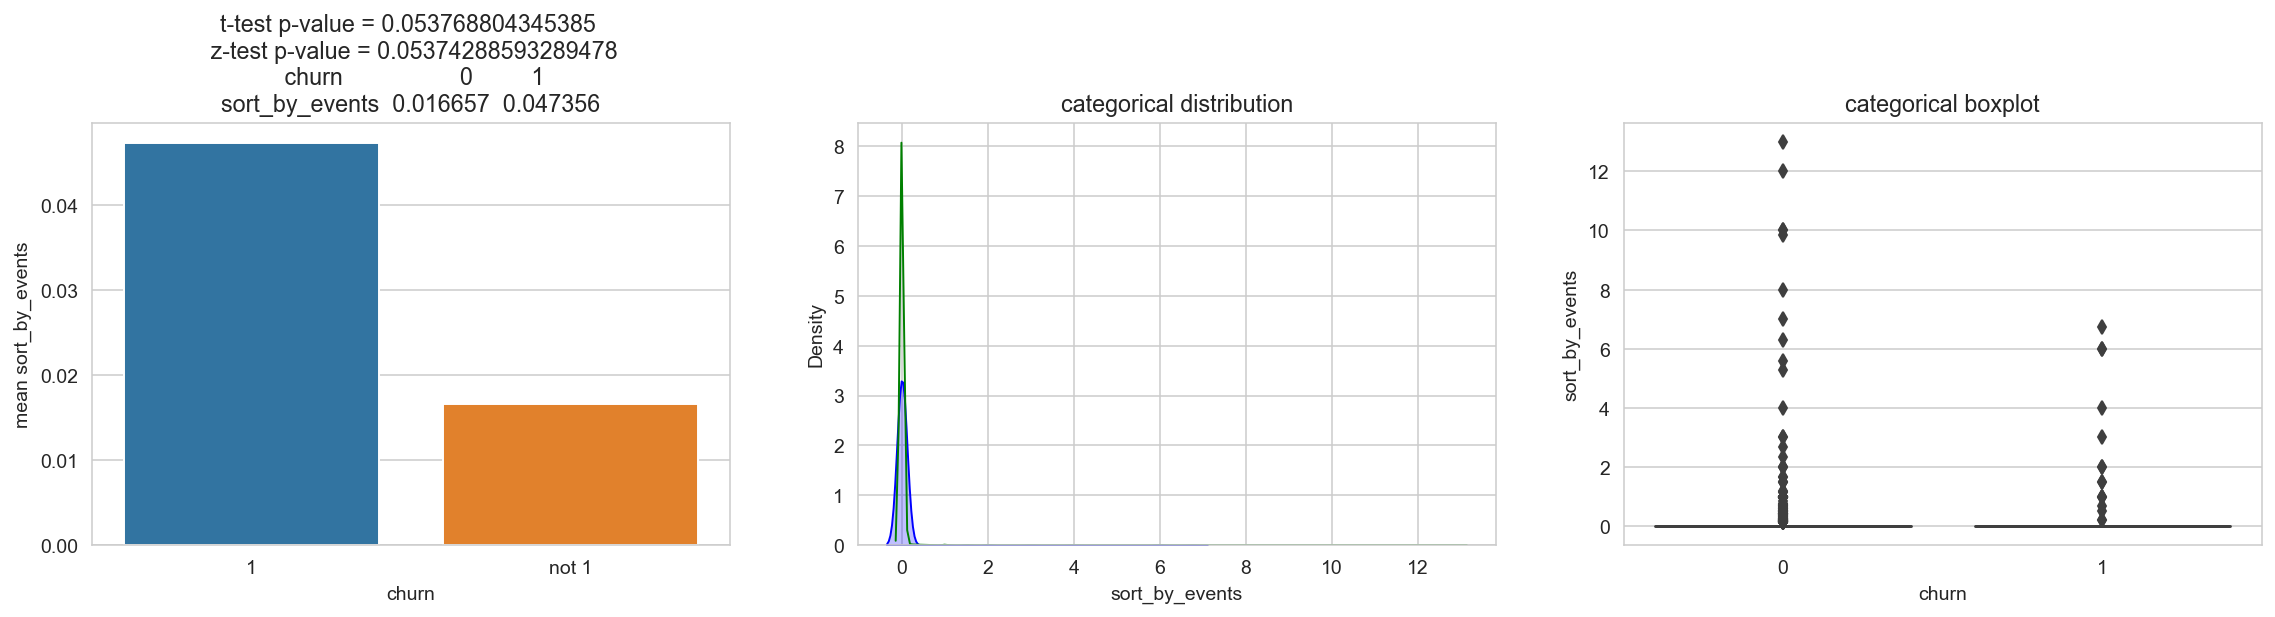

In [ ]:
Bivariate_cont_cat(df, 'sort_by_events', 'churn', 1)

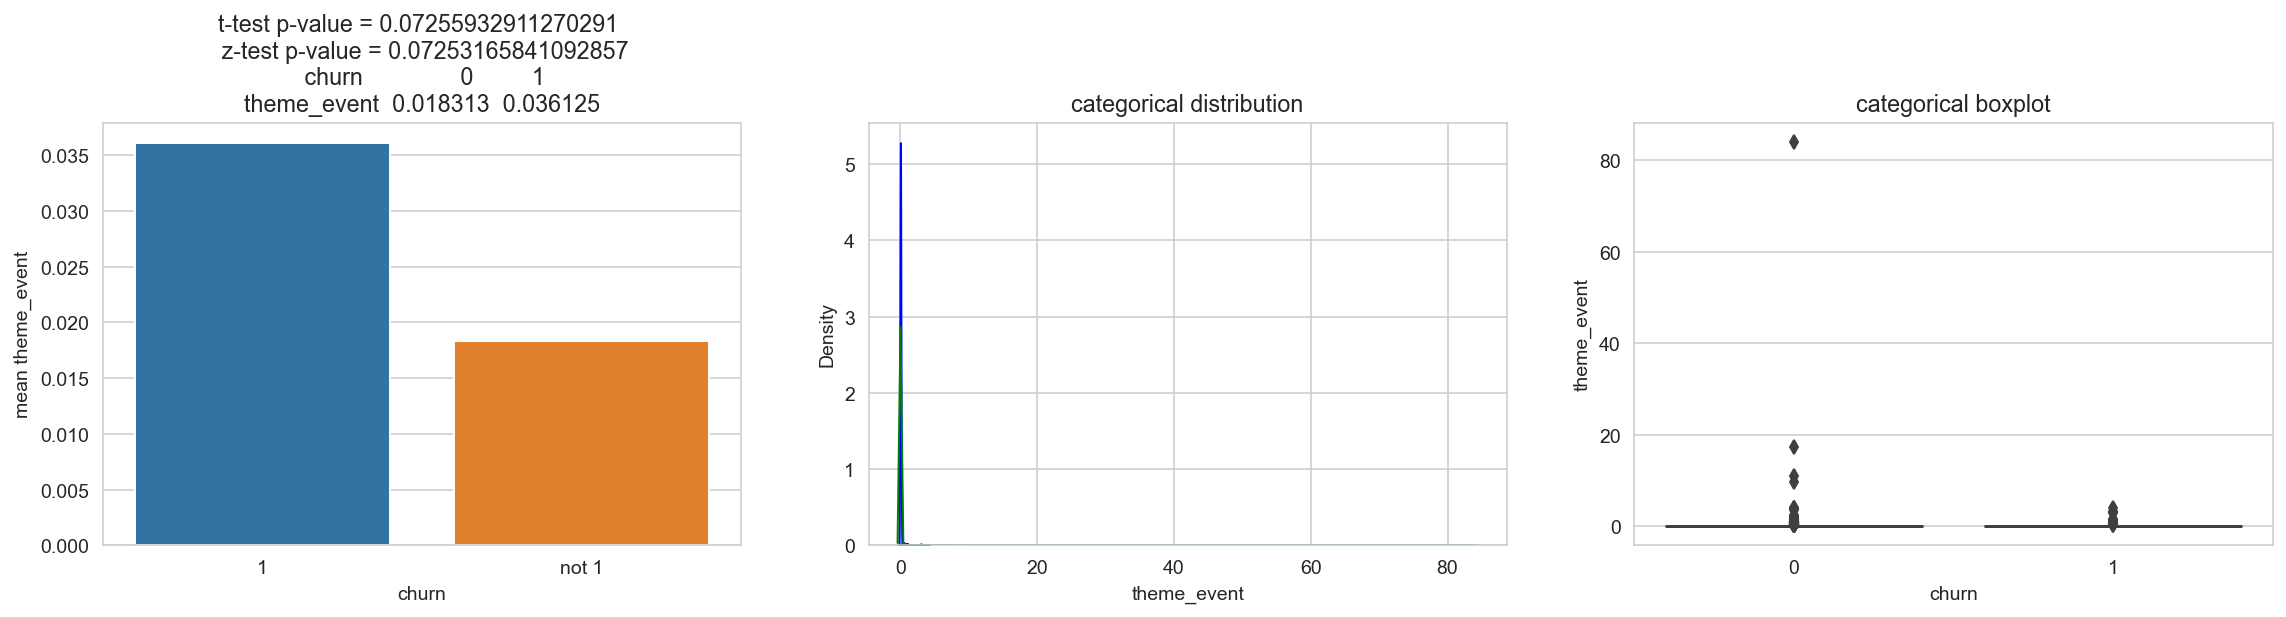

In [ ]:
Bivariate_cont_cat(df, 'theme_event', 'churn', 1)

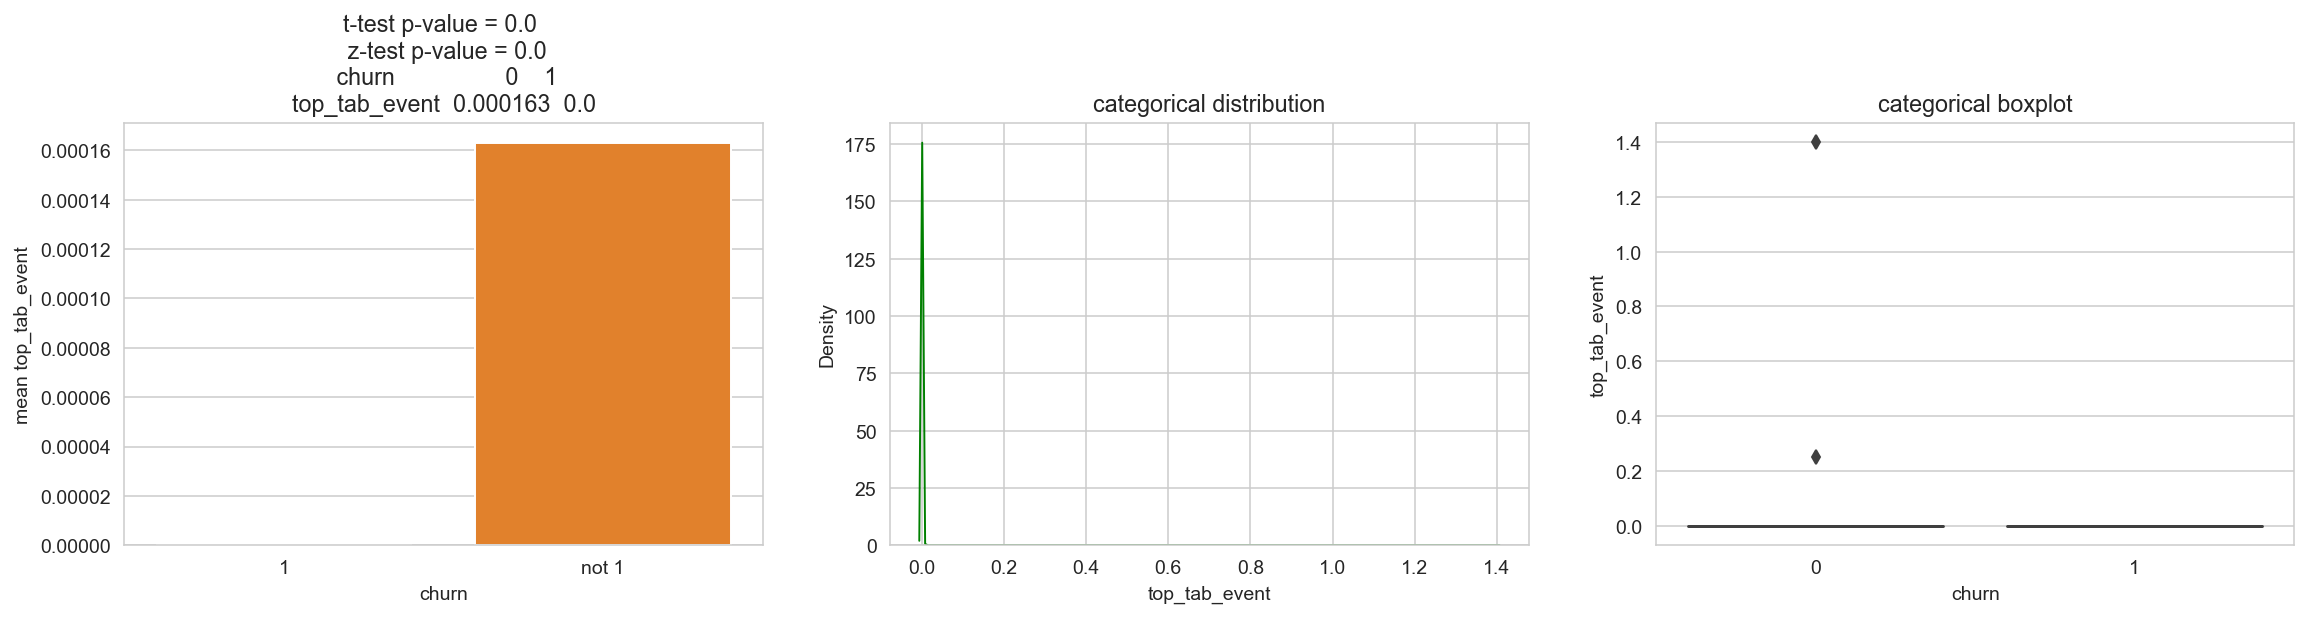

In [ ]:
Bivariate_cont_cat(df, 'top_tab_event', 'churn', 1)

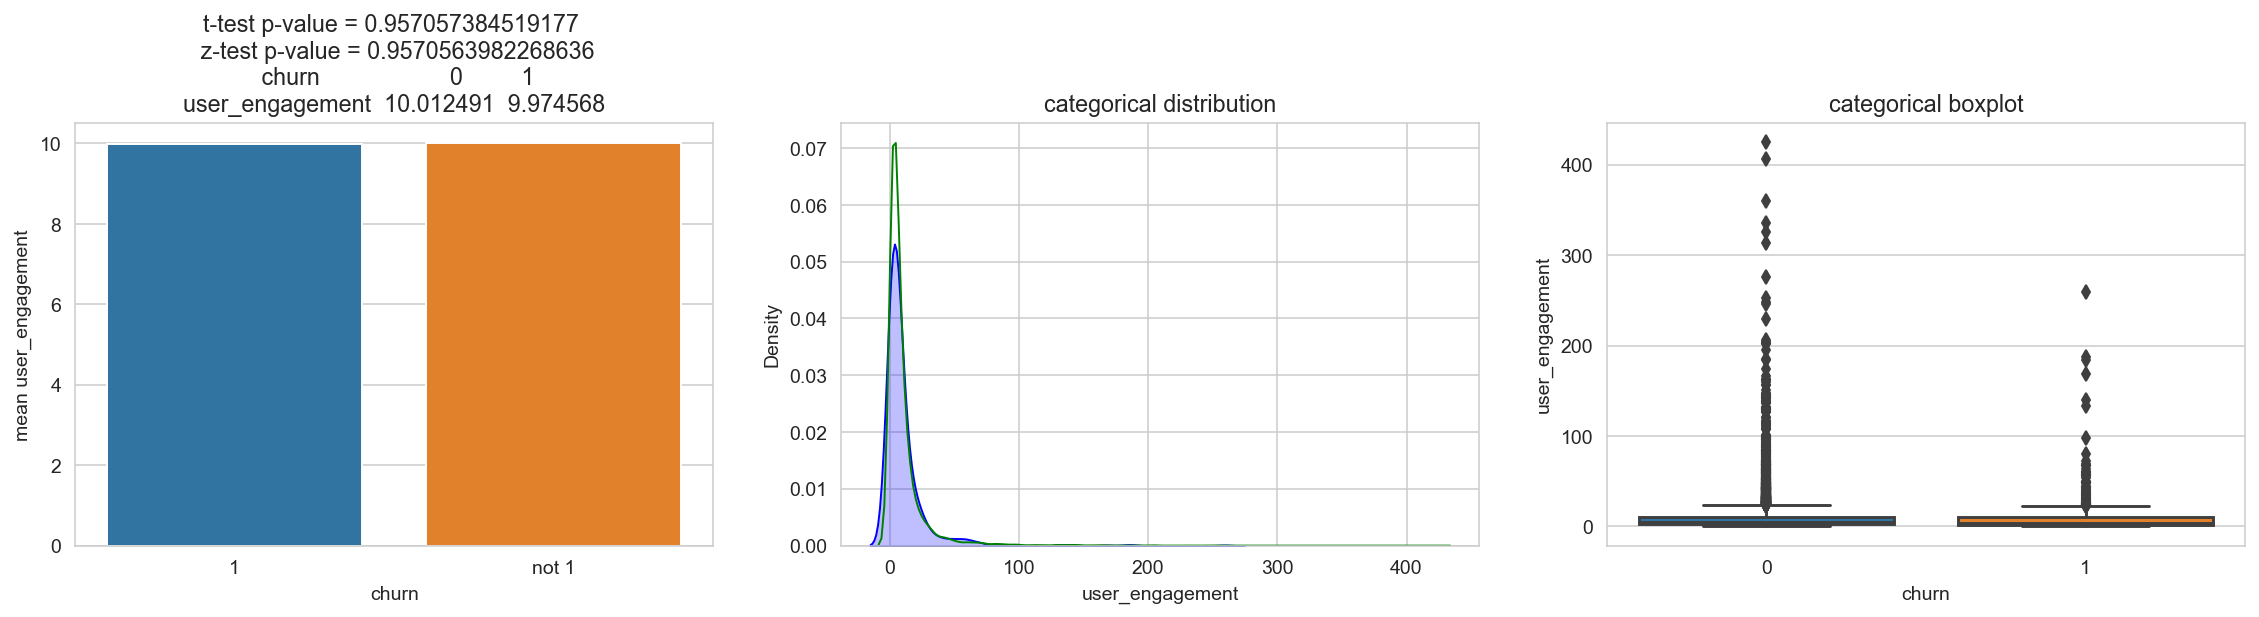

In [ ]:
Bivariate_cont_cat(df, 'user_engagement', 'churn', 1)

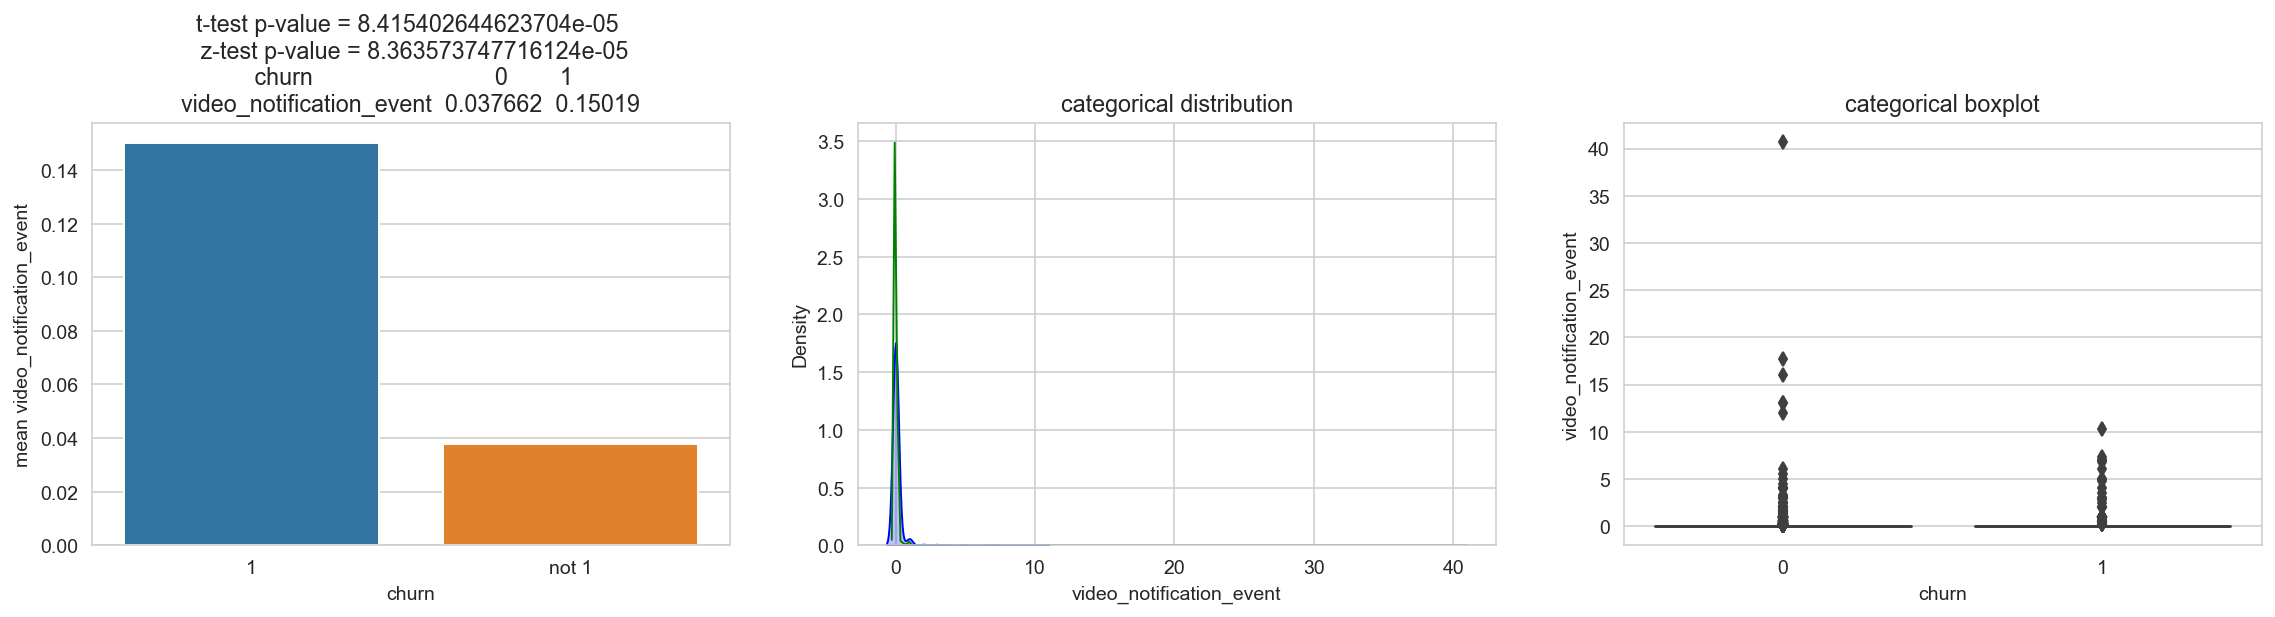

In [ ]:
Bivariate_cont_cat(df, 'video_notification_event', 'churn', 1)

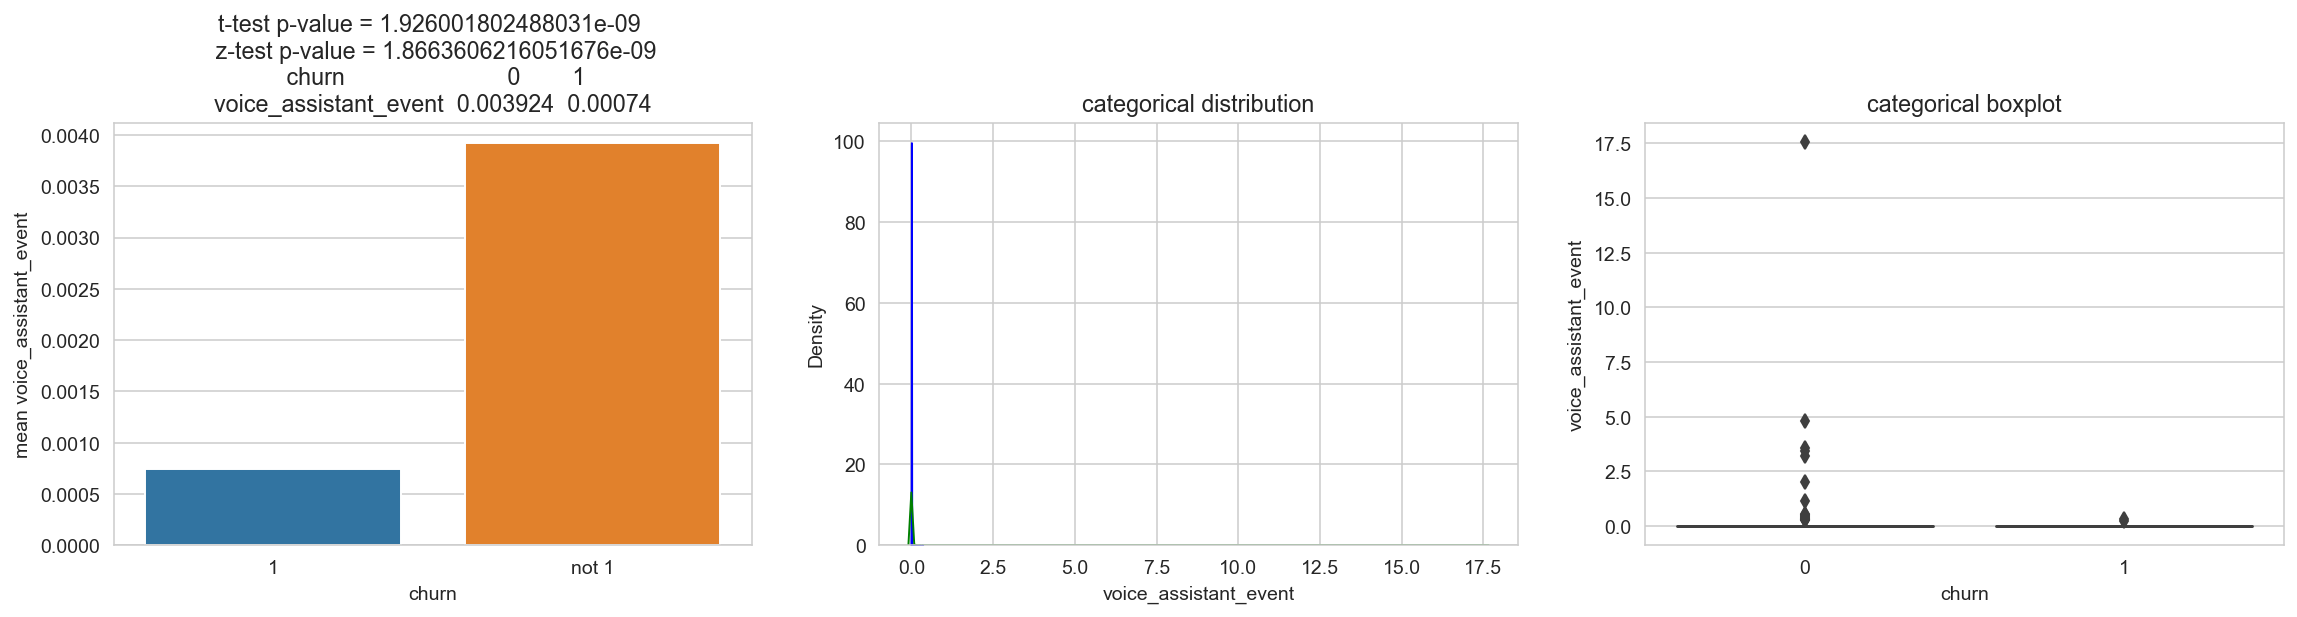

In [ ]:
Bivariate_cont_cat(df, 'voice_assistant_event', 'churn', 1)

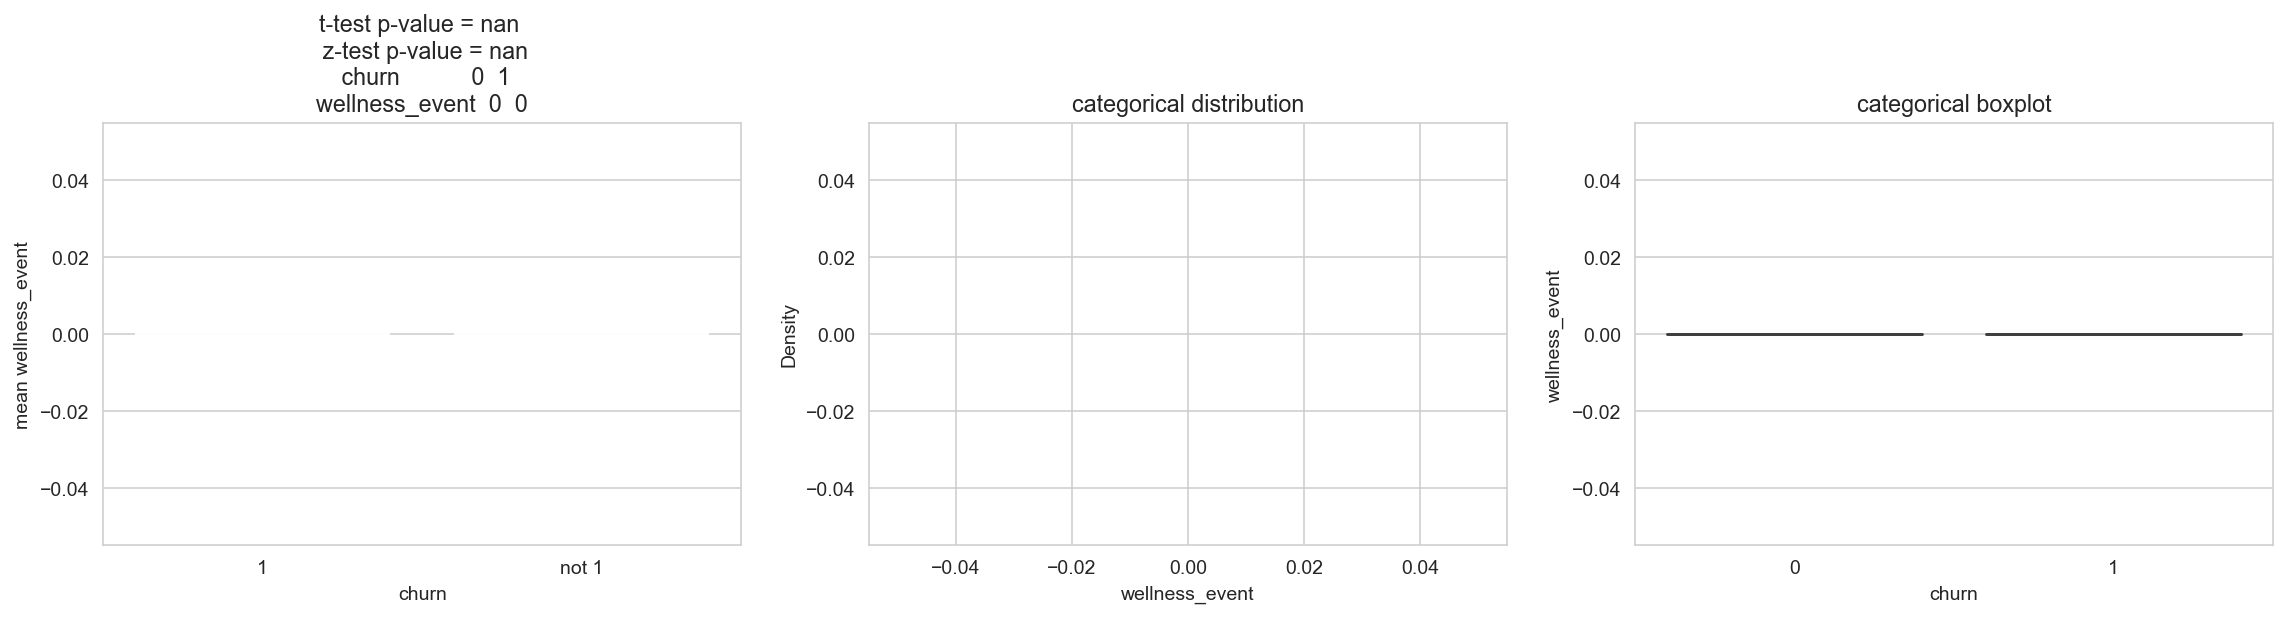

In [ ]:
Bivariate_cont_cat(df, 'wellness_event', 'churn', 1)

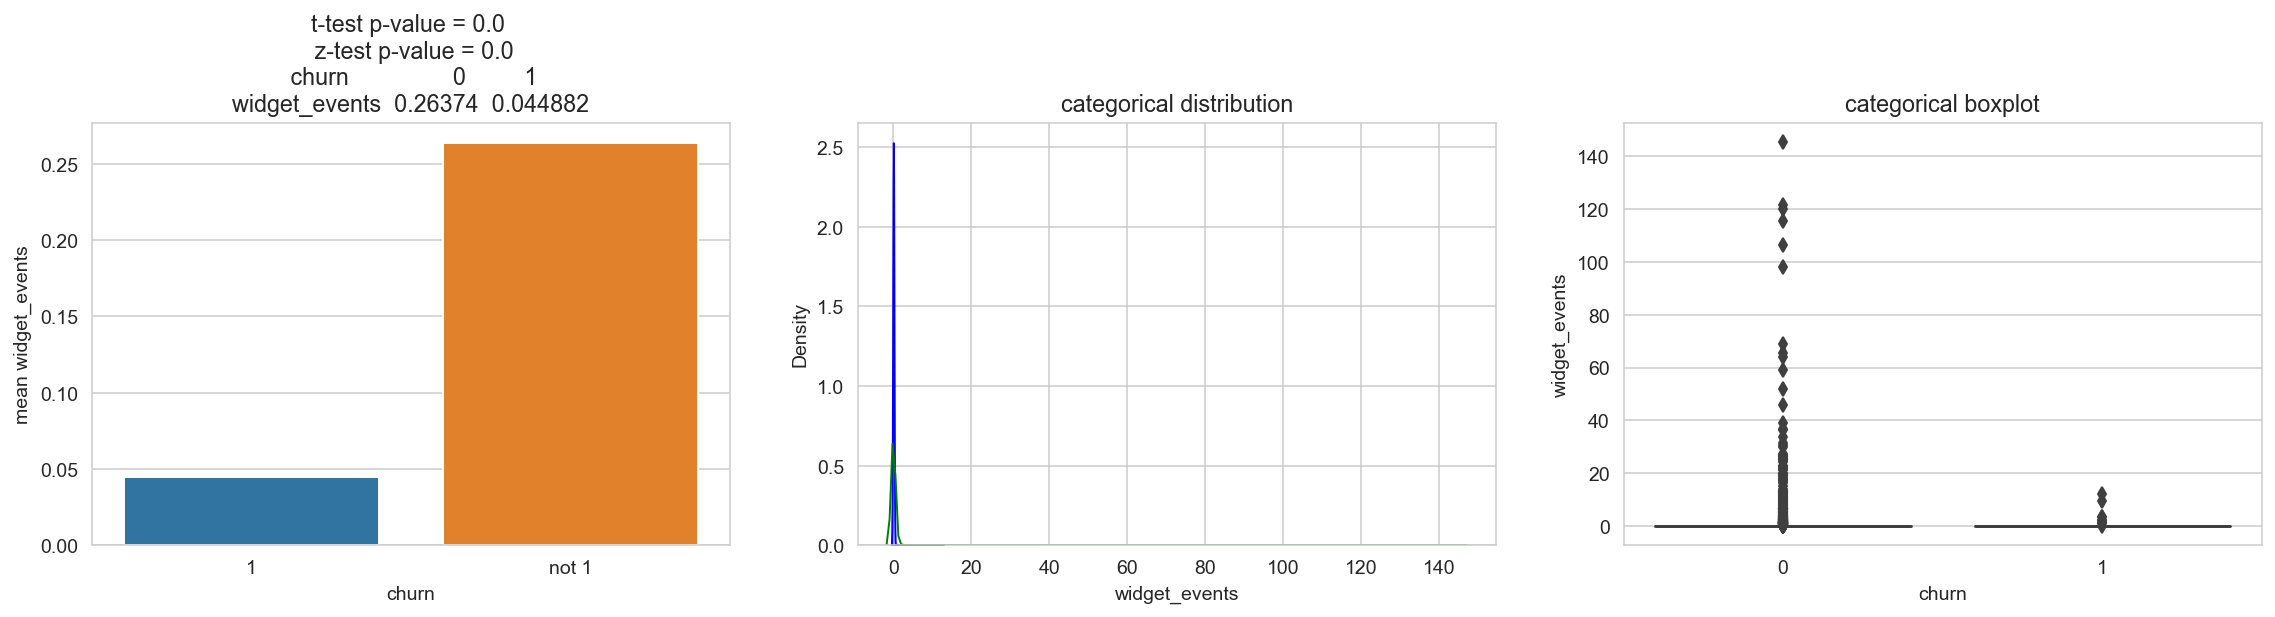

In [ ]:
Bivariate_cont_cat(df, 'widget_events', 'churn', 1)

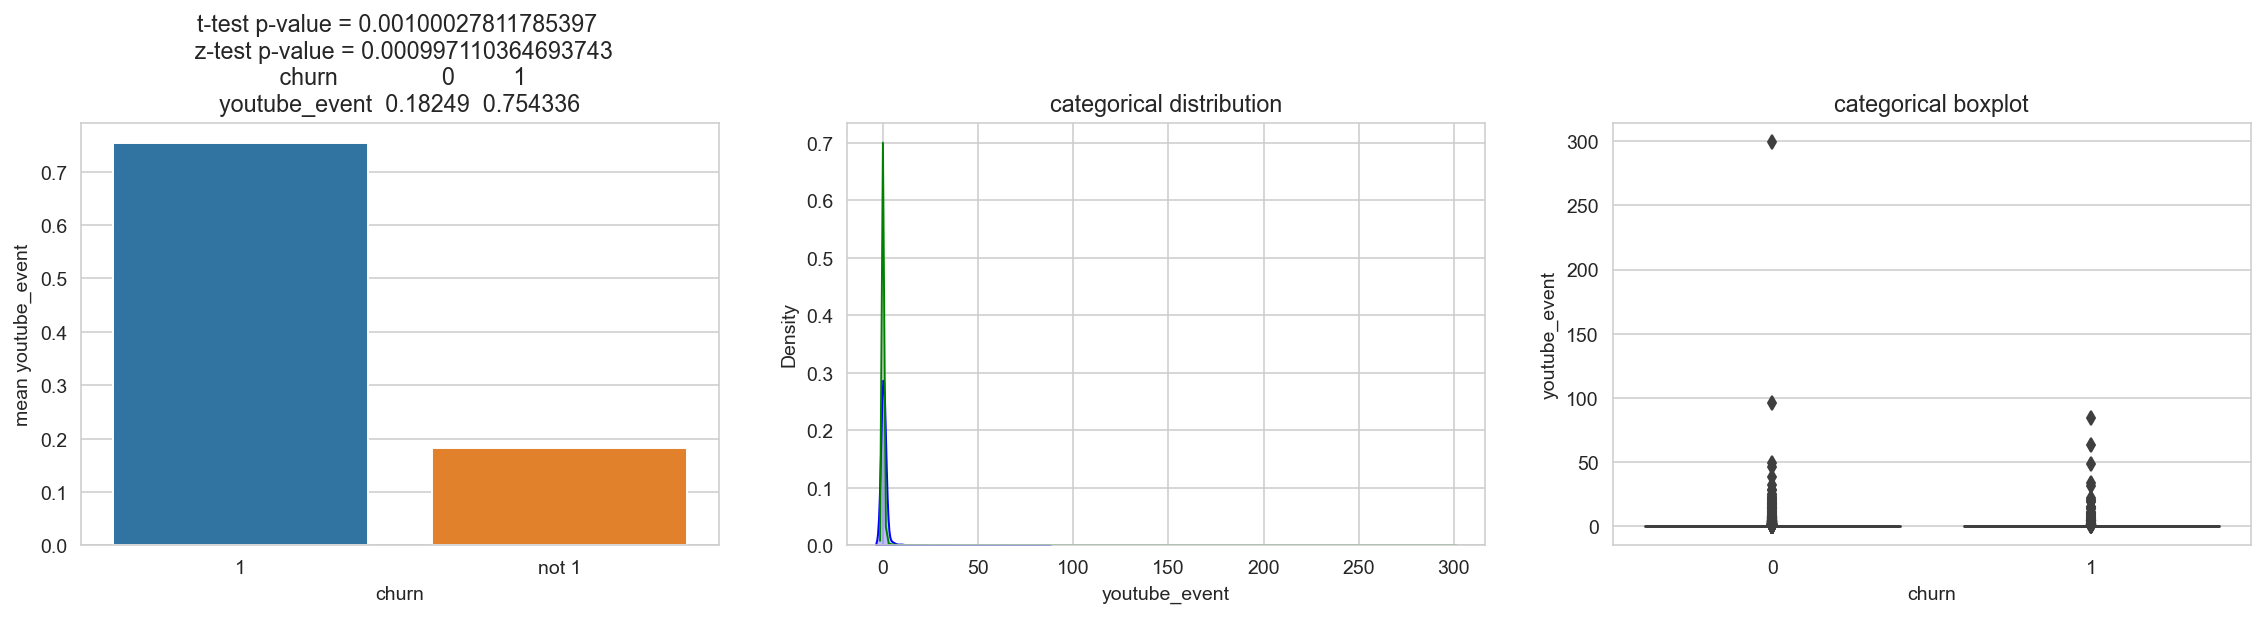

In [ ]:
Bivariate_cont_cat(df, 'youtube_event', 'churn', 1)

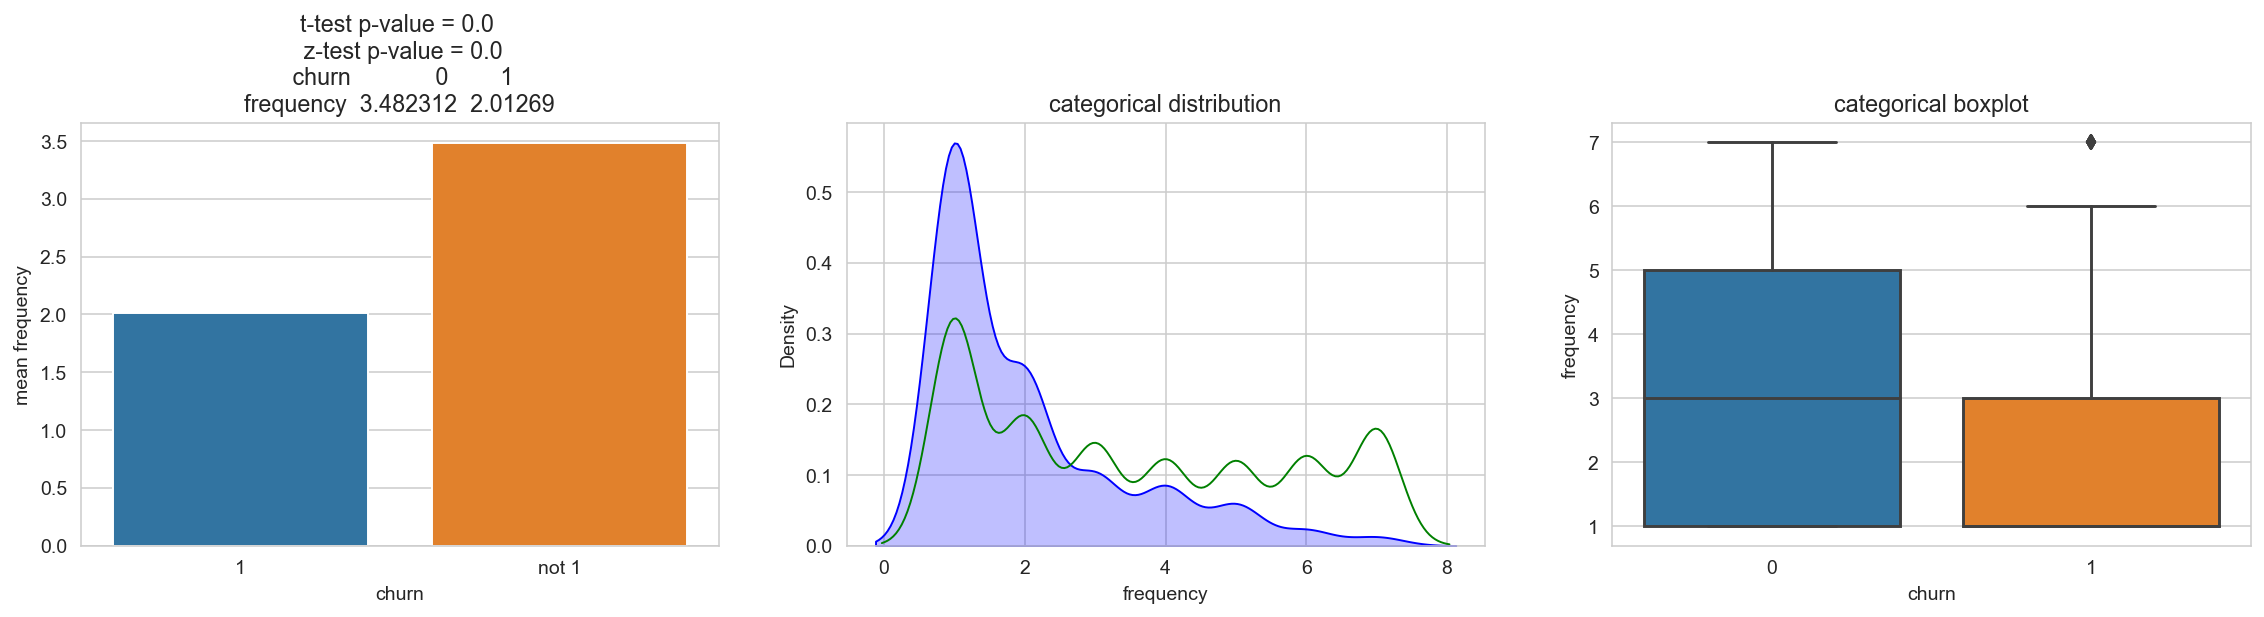

In [ ]:
Bivariate_cont_cat(df, 'frequency', 'churn', 1)

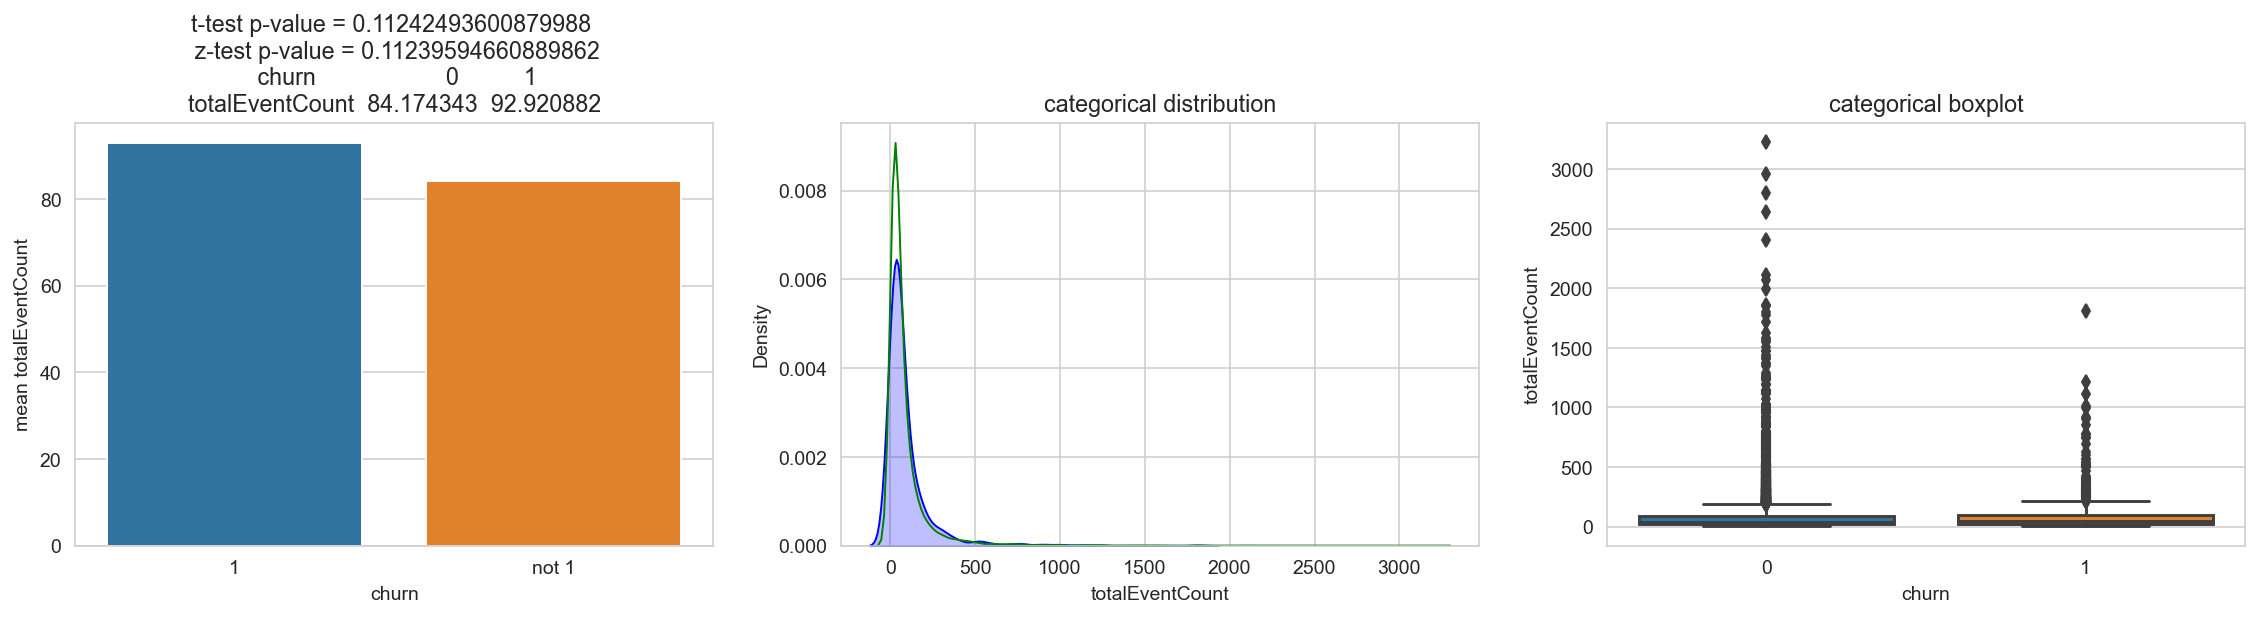

In [ ]:
Bivariate_cont_cat(df, 'totalEventCount', 'churn', 1)

In [ ]:
df.columns

Index(['totalEventCount', 'engTime_sec', 'app_exception', 'app_clear_data',
       'ad_close_event', 'album_art_change_event',
       'bottom_mini_playing_bar_event', 'bottom_option_click_event',
       'current_search_tab_event', 'edit_tags_page_events', 'equalizer_event',
       'feature_popup_events', 'firebase_campaign', 'first_open',
       'first_open_custom_date_event', 'floating_player_event',
       'font_change_event', 'genres_page_event', 'ham_burger_click_event',
       'inside_page_events', 'interstitial_ad_events', 'landing_page_events',
       'language_dialog_events', 'list_item_clicked_event',
       'lyrics_open_event', 'lyrics_page_events', 'mini_youtube_event',
       'notification_events', 'number_of_items_event', 'os_update',
       'permission_event', 'personalization_assignment',
       'playing_window_event', 'playlist_event',
       'playstore_rating_redirect_event', 'profile_page_events',
       'remove_ads_purchase_event', 'ringtone_cutter_event', 'screen_vi

Result

p-value is >0.05, which means that the two samples are more or less similar to each other.

Thefore, we can safely reject the hypothesis by concluding that this particular feature is less to churn

Result

p-value < 0.05, the the two samples are significantly different.

Customers who churned have significantly higher balance during immediate preceeding quarter, which is contrary to what we were were testing but the result is significant.

In [ ]:
numerical_imp=df[['current_search_tab_event','firebase_campaign','first_open','ham_burger_click_event','landing_page_events',
              'mini_youtube_event','number_of_items_event','playstore_rating_redirect_event','remove_ads_purchase_event',
              'screen_view','top_tab_event','widget_events','youtube_event','frequency','churn']]

In [ ]:
correlation_imp = numerical_imp.corr(method='spearman')
correlation_imp

current_search_tab_event  firebase_campaign  \
current_search_tab_event                         1.000000           0.092826   
firebase_campaign                                0.092826           1.000000   
first_open                                       0.082030           0.939556   
ham_burger_click_event                           0.142620           0.258496   
landing_page_events                              0.626470           0.136959   
mini_youtube_event                               0.188792           0.108335   
number_of_items_event                            0.230390           0.251462   
playstore_rating_redirect_event                  0.020912          -0.002740   
remove_ads_purchase_event                        0.247279           0.045606   
screen_view                                      0.340547           0.085543   
top_tab_event                                   -0.005994          -0.003875   
widget_events                                    0.017751          -0.020957   
youtube_event                                    0.254730           0.171603   
frequency                                        0.225258          -0.201961   
churn                                            0.019094           0.249185   

                                 first_open  ham_burger_click_event  \
current_search_tab_event           0.082030                0.142620   
firebase_campaign                  0.939556                0.258496   
first_open                         1.000000                0.252686   
ham_burger_click_event             0.252686                1.000000   
landing_page_events                0.122317                0.201811   
mini_youtube_event                 0.101400                0.061952   
number_of_items_event              0.234137                0.177595   
playstore_rating_redirect_event   -0.002858                0.042654   
remove_ads_purchase_event          0.022750                0.160267   
screen_view                        0.084717                0.196141   
top_tab_event                     -0.004042                0.060808   
widget_events                     -0.019809                0.047399   
youtube_event                      0.164282                0.113260   
frequency                         -0.213587                0.023812   
churn                              0.248327                0.094145   

                                 landing_page_events  mini_youtube_event  \
current_search_tab_event                    0.626470            0.188792   
firebase_campaign                           0.136959            0.108335   
first_open                                  0.122317            0.101400   
ham_burger_click_event                      0.201811            0.061952   
landing_page_events                         1.000000            0.129149   
mini_youtube_event                          0.129149            1.000000   
number_of_items_event                       0.299224            0.068090   
playstore_rating_redirect_event             0.020253           -0.001187   
remove_ads_purchase_event                   0.347212            0.065369   
screen_view                                 0.431264            0.106667   
top_tab_event                               0.020152           -0.001678   
widget_events                               0.033316           -0.006657   
youtube_event                               0.210097            0.498341   
frequency                                   0.265539           -0.014530   
churn                                       0.029029            0.052924   

                                 number_of_items_event  \
current_search_tab_event                      0.230390   
firebase_campaign                             0.251462   
first_open                                    0.234137   
ham_burger_click_event                        0.177595   
landing_page_events                           0.299224   
mini_youtube_event                            0.06

<Figure size 4200x4200 with 0 Axes>

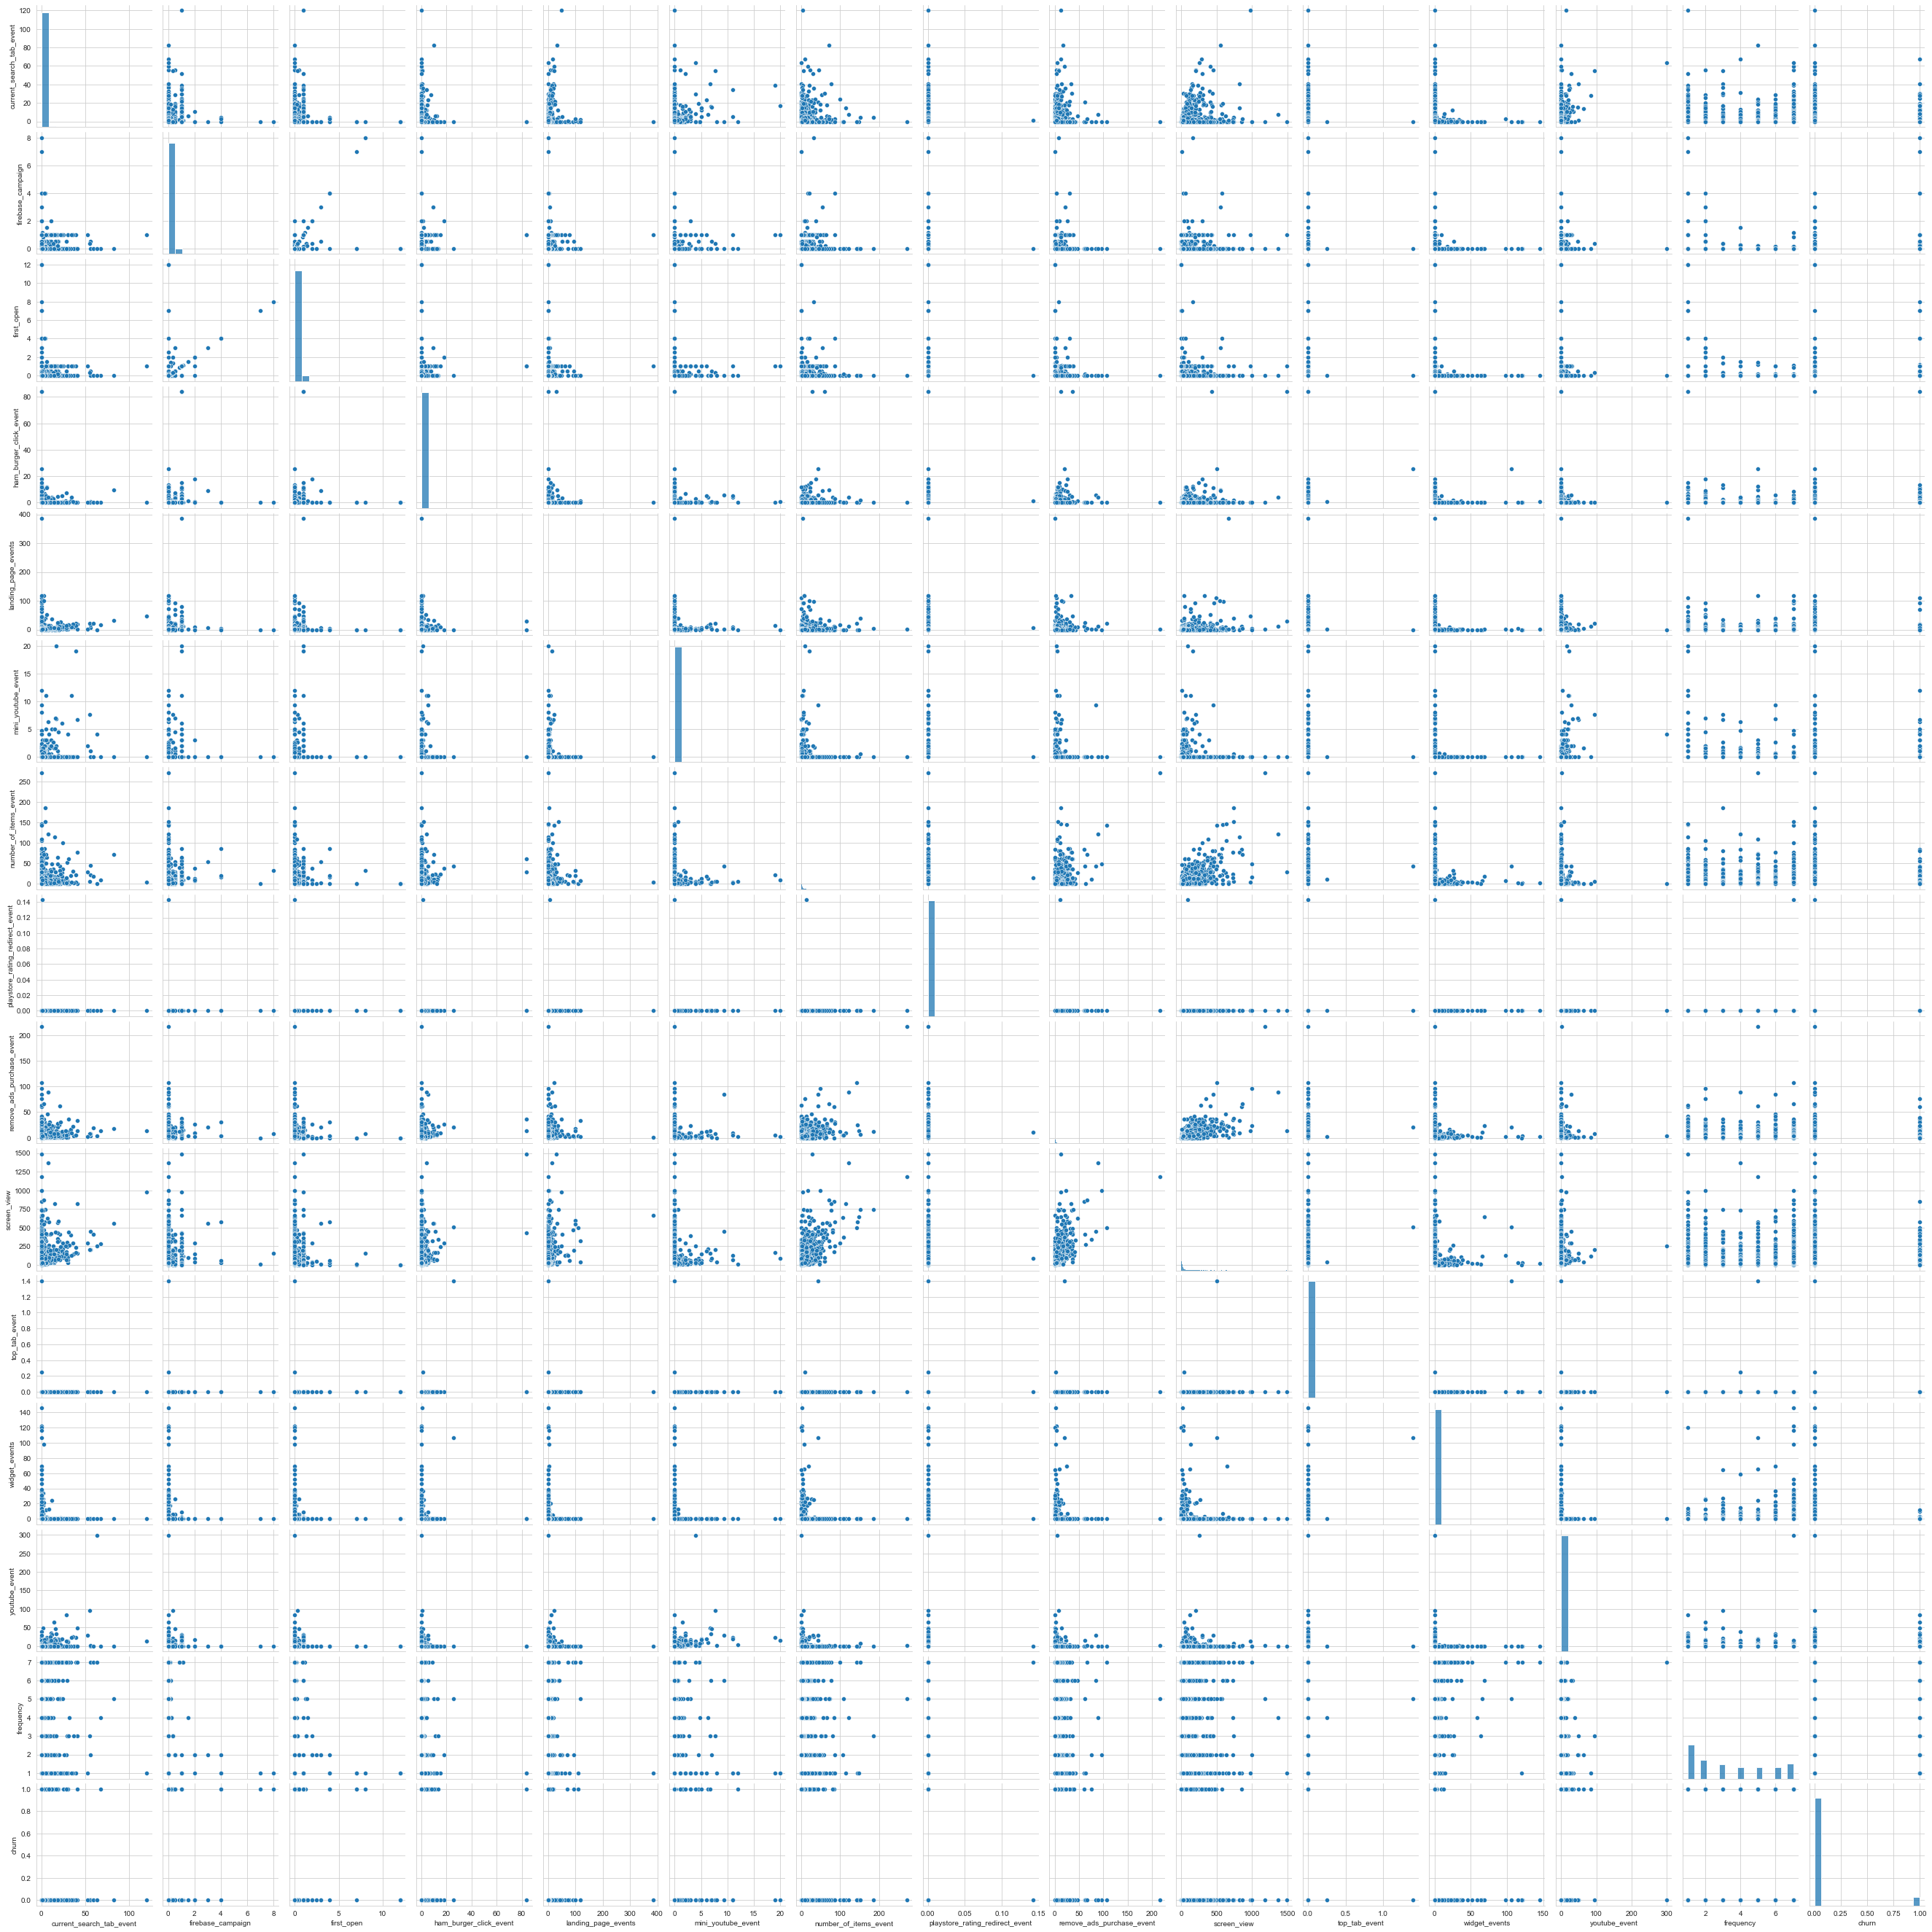

In [ ]:
plt.figure(dpi=140, figsize = (30,30))
sns.pairplot(numerical_imp)
plt.show()

In [ ]:
correlation_imp['churn'].describe

<bound method NDFrame.describe of current_search_tab_event           0.019094
firebase_campaign                  0.249185
first_open                         0.248327
ham_burger_click_event             0.094145
landing_page_events                0.029029
mini_youtube_event                 0.052924
number_of_items_event              0.049334
playstore_rating_redirect_event   -0.002672
remove_ads_purchase_event          0.019427
screen_view                        0.018549
top_tab_event                     -0.003779
widget_events                     -0.026809
youtube_event                      0.053340
frequency                         -0.178518
churn                              1.000000
Name: churn, dtype: float64>